### Load dependencies

Import required dependencies and model functions from sample_size_experiment.py

In [1]:
from sample_size_experiment import *

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from IPython.display import display

from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical

### Randomly sample subset of points

Function takes in X and y data. Randomly select a desired number of indices and outputs the data in those positions.

In [3]:
from random import sample

def random_sample(X, y, samples):
    
    ordered_indices = [num for num in range(samples)]
    random_indices = sample(ordered_indices, samples)

    X = X[random_indices]
    y = y[random_indices]

    return X, y

### Testing suite

Testing function. Creates a DNN and a RF model based on the function attributes. Fits the models to the inputted data. Reruns model over a range of sample sizes for X, y data stored in the attribute sample_sizes. Reruns the entire testing suite for an inputted number of iterations to average out classification error.

In [4]:
from sklearn.model_selection import train_test_split

def test_suite(X,
               y, 
               iterations,
               output_nodes,
               sample_sizes = [500, 1000, 2000, 3000, 5000, 7000, 10000, 15000, 20000, 30000],
               num_trees = 100, max_depth = None, rf_verbose = 1,
               epochs = 10, batch_size = 50, learning_rate = 0.001,
               validation_split = 0.3, dnn_verbose = 1
              ):
    
    X = np.array(X, dtype=np.float32)
    y = np.array(y, dtype=np.float32)

    rf_evolution = np.zeros((len(sample_sizes), iterations))
    dnn_evolution = np.zeros((len(sample_sizes), iterations))

    for iteration in range(iterations):
        print('iteration: ', iteration)

        for sample_size_index, max_sample_size in enumerate(sample_sizes):
            print('Max sample size: ', max_sample_size)

            X_scaled, y_scaled = random_sample(X, y, max_sample_size)
            X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=101)

            rf_model = random_forest_classifier_model(X_train = X_train,
                                                      y_train = y_train, 
                                                      num_trees = num_trees, 
                                                      max_depth = max_depth, 
                                                      verbose = rf_verbose
                                                     )
            
            rf_predictions = rf_model.predict(X_test)
            rf_error = 1 - accuracy_score(y_test, rf_predictions)

            rf_evolution[sample_size_index][iteration] = rf_error

            if output_nodes == 1:
                dnn_model = binary_deep_neural_network(X_train = X_train,
                                                           y_train = y_train, 
                                                           epochs = epochs,
                                                           batch_size = batch_size, 
                                                           learning_rate = learning_rate,
                                                           validation_split = validation_split,
                                                           verbose = dnn_verbose
                                                          )
            else:
                y_train = to_categorical(y_train,num_classes = output_nodes)
                y_test = to_categorical(y_test,num_classes = output_nodes)
            
                dnn_model = multiclass_deep_neural_network(X_train = X_train,
                                                           y_train = y_train, 
                                                           epochs = epochs,
                                                           batch_size = batch_size, 
                                                           learning_rate = learning_rate,
                                                           validation_split = validation_split,
                                                           output_nodes = output_nodes,
                                                           verbose = dnn_verbose
                                                          )

            score = dnn_model.evaluate(X_test, y_test, batch_size=None, verbose=0, sample_weight=None, steps=None,
                            callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False,
                            return_dict=False)

            dnn_error = 1 - score[1]
            dnn_evolution[sample_size_index][iteration] = dnn_error

    return rf_evolution, dnn_evolution

## Iris Dataset

Uses the Iris dataset from sklearn.datasets to test the functionality of the multiclass model on a small dataset.

In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

data = load_iris()

X = np.array(data['data'], dtype=np.float32)
y = np.array(data['target'], dtype=np.float32)

In [31]:
sample_sizes = list(range(30,X.shape[0],20))

rf_evolution_iris, dnn_evolution_iris = test_suite(X, 
                                                  y, 
                                                  iterations = 5, 
                                                  output_nodes = 1,
                                                  sample_sizes = sample_sizes, 
                                                  num_trees = 20, 
                                                  rf_verbose = 2, 
                                                  batch_size = 1)

iteration:  0
Max sample size:  30
building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20
Epoch 1/10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


14/14 [==============================] - 0s 6ms/step - loss: 1.1924 - accuracy: 0.0000e+00 - val_loss: 1.1065 - val_accuracy: 0.0000e+00
Epoch 2/10
14/14 [==============================] - 0s 2ms/step - loss: 0.9821 - accuracy: 0.0000e+00 - val_loss: 0.8932 - val_accuracy: 0.0000e+00
Epoch 3/10
14/14 [==============================] - 0s 2ms/step - loss: 0.7998 - accuracy: 0.0000e+00 - val_loss: 0.7122 - val_accuracy: 0.0000e+00
Epoch 4/10
14/14 [==============================] - 0s 2ms/step - loss: 0.6442 - accuracy: 0.8571 - val_loss: 0.5594 - val_accuracy: 1.0000
Epoch 5/10
14/14 [==============================] - 0s 3ms/step - loss: 0.5118 - accuracy: 1.0000 - val_loss: 0.4353 - val_accuracy: 1.0000
Epoch 6/10
14/14 [==============================] - 0s 2ms/step - loss: 0.4040 - accuracy: 1.0000 - val_loss: 0.3360 - val_accuracy: 1.0000
Epoch 7/10
14/14 [==============================] - 0s 3ms/step - loss: 0.3168 - accuracy: 1.0000 - val_loss: 0.2591 - val_accuracy: 1.0000
Epoch 8

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


24/24 [==============================] - 0s 4ms/step - loss: 2.9630 - accuracy: 0.0000e+00 - val_loss: 2.5065 - val_accuracy: 0.0000e+00
Epoch 2/10
24/24 [==============================] - 0s 2ms/step - loss: 2.0346 - accuracy: 0.0000e+00 - val_loss: 1.6553 - val_accuracy: 0.0000e+00
Epoch 3/10
24/24 [==============================] - 0s 2ms/step - loss: 1.3102 - accuracy: 0.0000e+00 - val_loss: 1.0326 - val_accuracy: 0.0000e+00
Epoch 4/10
24/24 [==============================] - 0s 2ms/step - loss: 0.8242 - accuracy: 0.0833 - val_loss: 0.6882 - val_accuracy: 0.5455
Epoch 5/10
24/24 [==============================] - 0s 2ms/step - loss: 0.6030 - accuracy: 0.9583 - val_loss: 0.5240 - val_accuracy: 1.0000
Epoch 6/10
24/24 [==============================] - 0s 2ms/step - loss: 0.4585 - accuracy: 1.0000 - val_loss: 0.3932 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 0s 2ms/step - loss: 0.3487 - accuracy: 1.0000 - val_loss: 0.2995 - val_accuracy: 1.0000
Epoch 8

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


34/34 [==============================] - 0s 3ms/step - loss: 0.7380 - accuracy: 0.2353 - val_loss: 0.6569 - val_accuracy: 0.4000
Epoch 2/10
34/34 [==============================] - 0s 1ms/step - loss: 0.6542 - accuracy: 0.6765 - val_loss: 0.6320 - val_accuracy: 0.9333
Epoch 3/10
34/34 [==============================] - 0s 1ms/step - loss: 0.6397 - accuracy: 1.0000 - val_loss: 0.6143 - val_accuracy: 1.0000
Epoch 4/10
34/34 [==============================] - 0s 1ms/step - loss: 0.6268 - accuracy: 0.9412 - val_loss: 0.5985 - val_accuracy: 1.0000
Epoch 5/10
34/34 [==============================] - 0s 1ms/step - loss: 0.6132 - accuracy: 1.0000 - val_loss: 0.5850 - val_accuracy: 1.0000
Epoch 6/10
34/34 [==============================] - 0s 1ms/step - loss: 0.5959 - accuracy: 1.0000 - val_loss: 0.5601 - val_accuracy: 1.0000
Epoch 7/10
34/34 [==============================] - 0s 1ms/step - loss: 0.5525 - accuracy: 1.0000 - val_loss: 0.5145 - val_accuracy: 1.0000
Epoch 8/10
34/34 [=============

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


44/44 [==============================] - 0s 2ms/step - loss: 1.8178 - accuracy: 0.6136 - val_loss: 2.0103 - val_accuracy: 0.4737
Epoch 2/10
44/44 [==============================] - 0s 1ms/step - loss: 1.2884 - accuracy: 0.6136 - val_loss: 1.4542 - val_accuracy: 0.4737
Epoch 3/10
44/44 [==============================] - 0s 1ms/step - loss: 0.9656 - accuracy: 0.6136 - val_loss: 1.0645 - val_accuracy: 0.4737
Epoch 4/10
44/44 [==============================] - 0s 1ms/step - loss: 0.7527 - accuracy: 0.6136 - val_loss: 0.7825 - val_accuracy: 0.4737
Epoch 5/10
44/44 [==============================] - 0s 1ms/step - loss: 0.5834 - accuracy: 0.6136 - val_loss: 0.6024 - val_accuracy: 0.4737
Epoch 6/10
44/44 [==============================] - 0s 1ms/step - loss: 0.4305 - accuracy: 0.7727 - val_loss: 0.3862 - val_accuracy: 0.9474
Epoch 7/10
44/44 [==============================] - 0s 1ms/step - loss: 0.3250 - accuracy: 0.9091 - val_loss: 0.2788 - val_accuracy: 1.0000
Epoch 8/10
44/44 [=============

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


53/53 [==============================] - 0s 6ms/step - loss: 3.2952 - accuracy: 0.3962 - val_loss: 2.3703 - val_accuracy: 0.4583
Epoch 2/10
53/53 [==============================] - 0s 1ms/step - loss: 1.9216 - accuracy: 0.3962 - val_loss: 1.2047 - val_accuracy: 0.4583
Epoch 3/10
53/53 [==============================] - 0s 1ms/step - loss: 0.7650 - accuracy: 0.4528 - val_loss: 0.3320 - val_accuracy: 0.9167
Epoch 4/10
53/53 [==============================] - 0s 1ms/step - loss: 0.1289 - accuracy: 0.8868 - val_loss: 0.0468 - val_accuracy: 0.9167
Epoch 5/10
53/53 [==============================] - 0s 1ms/step - loss: -0.1115 - accuracy: 0.8868 - val_loss: -0.0995 - val_accuracy: 0.9167
Epoch 6/10
53/53 [==============================] - 0s 1ms/step - loss: -0.2470 - accuracy: 0.8868 - val_loss: -0.1777 - val_accuracy: 0.9167
Epoch 7/10
53/53 [==============================] - 0s 1ms/step - loss: -0.3413 - accuracy: 0.8679 - val_loss: -0.2618 - val_accuracy: 0.9167
Epoch 8/10
53/53 [=======

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


63/63 [==============================] - 0s 2ms/step - loss: 1.4634 - accuracy: 0.4127 - val_loss: 1.0300 - val_accuracy: 0.3929
Epoch 2/10
63/63 [==============================] - 0s 1ms/step - loss: 0.8316 - accuracy: 0.4127 - val_loss: 0.6232 - val_accuracy: 0.3929
Epoch 3/10
63/63 [==============================] - 0s 1ms/step - loss: 0.4498 - accuracy: 0.6984 - val_loss: 0.3308 - val_accuracy: 0.8214
Epoch 4/10
63/63 [==============================] - 0s 1ms/step - loss: 0.1606 - accuracy: 0.7619 - val_loss: 0.1060 - val_accuracy: 0.8214
Epoch 5/10
63/63 [==============================] - 0s 1ms/step - loss: -0.0633 - accuracy: 0.7619 - val_loss: -0.0809 - val_accuracy: 0.8214
Epoch 6/10
63/63 [==============================] - 0s 1ms/step - loss: -0.2734 - accuracy: 0.7619 - val_loss: -0.2616 - val_accuracy: 0.8214
Epoch 7/10
63/63 [==============================] - 0s 1ms/step - loss: -0.4901 - accuracy: 0.7619 - val_loss: -0.4371 - val_accuracy: 0.8214
Epoch 8/10
63/63 [=======

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


14/14 [==============================] - 0s 7ms/step - loss: 3.1925 - accuracy: 0.0000e+00 - val_loss: 2.7361 - val_accuracy: 0.0000e+00
Epoch 2/10
14/14 [==============================] - 0s 2ms/step - loss: 2.3221 - accuracy: 0.0000e+00 - val_loss: 1.9163 - val_accuracy: 0.0000e+00
Epoch 3/10
14/14 [==============================] - 0s 2ms/step - loss: 1.5883 - accuracy: 0.0000e+00 - val_loss: 1.2668 - val_accuracy: 0.0000e+00
Epoch 4/10
14/14 [==============================] - 0s 3ms/step - loss: 1.0614 - accuracy: 0.0000e+00 - val_loss: 0.8717 - val_accuracy: 0.0000e+00
Epoch 5/10
14/14 [==============================] - 0s 3ms/step - loss: 0.7273 - accuracy: 0.5000 - val_loss: 0.5951 - val_accuracy: 1.0000
Epoch 6/10
14/14 [==============================] - 0s 2ms/step - loss: 0.5033 - accuracy: 0.9286 - val_loss: 0.4116 - val_accuracy: 1.0000
Epoch 7/10
14/14 [==============================] - 0s 2ms/step - loss: 0.3541 - accuracy: 1.0000 - val_loss: 0.2966 - val_accuracy: 1.0000

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


24/24 [==============================] - 0s 4ms/step - loss: 1.0590 - accuracy: 0.0000e+00 - val_loss: 0.7561 - val_accuracy: 0.0000e+00
Epoch 2/10
24/24 [==============================] - 0s 2ms/step - loss: 0.5670 - accuracy: 0.7917 - val_loss: 0.4104 - val_accuracy: 1.0000
Epoch 3/10
24/24 [==============================] - 0s 2ms/step - loss: 0.3268 - accuracy: 1.0000 - val_loss: 0.2683 - val_accuracy: 1.0000
Epoch 4/10
24/24 [==============================] - 0s 2ms/step - loss: 0.2326 - accuracy: 1.0000 - val_loss: 0.2014 - val_accuracy: 1.0000
Epoch 5/10
24/24 [==============================] - 0s 2ms/step - loss: 0.1755 - accuracy: 1.0000 - val_loss: 0.1545 - val_accuracy: 1.0000
Epoch 6/10
24/24 [==============================] - 0s 2ms/step - loss: 0.1350 - accuracy: 1.0000 - val_loss: 0.1199 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 0s 2ms/step - loss: 0.1053 - accuracy: 1.0000 - val_loss: 0.0943 - val_accuracy: 1.0000
Epoch 8/10
24/24 [=====

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


34/34 [==============================] - 0s 3ms/step - loss: 0.4992 - accuracy: 1.0000 - val_loss: 0.3998 - val_accuracy: 1.0000
Epoch 2/10
34/34 [==============================] - 0s 1ms/step - loss: 0.3207 - accuracy: 1.0000 - val_loss: 0.2773 - val_accuracy: 1.0000
Epoch 3/10
34/34 [==============================] - 0s 1ms/step - loss: 0.2325 - accuracy: 1.0000 - val_loss: 0.2295 - val_accuracy: 1.0000
Epoch 4/10
34/34 [==============================] - 0s 1ms/step - loss: 0.1960 - accuracy: 1.0000 - val_loss: 0.1943 - val_accuracy: 1.0000
Epoch 5/10
34/34 [==============================] - 0s 1ms/step - loss: 0.1572 - accuracy: 1.0000 - val_loss: 0.1677 - val_accuracy: 1.0000
Epoch 6/10
34/34 [==============================] - 0s 1ms/step - loss: 0.1321 - accuracy: 1.0000 - val_loss: 0.1431 - val_accuracy: 1.0000
Epoch 7/10
34/34 [==============================] - 0s 1ms/step - loss: 0.1134 - accuracy: 1.0000 - val_loss: 0.1239 - val_accuracy: 1.0000
Epoch 8/10
34/34 [=============

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


44/44 [==============================] - 0s 2ms/step - loss: 1.8271 - accuracy: 0.4318 - val_loss: 0.6453 - val_accuracy: 0.7368
Epoch 2/10
44/44 [==============================] - 0s 1ms/step - loss: 1.0961 - accuracy: 0.4318 - val_loss: 0.4463 - val_accuracy: 0.7368
Epoch 3/10
44/44 [==============================] - 0s 1ms/step - loss: 0.6883 - accuracy: 0.4318 - val_loss: 0.3709 - val_accuracy: 0.7368
Epoch 4/10
44/44 [==============================] - 0s 1ms/step - loss: 0.4863 - accuracy: 0.7500 - val_loss: 0.3353 - val_accuracy: 1.0000
Epoch 5/10
44/44 [==============================] - 0s 1ms/step - loss: 0.3798 - accuracy: 1.0000 - val_loss: 0.2996 - val_accuracy: 1.0000
Epoch 6/10
44/44 [==============================] - 0s 1ms/step - loss: 0.3115 - accuracy: 1.0000 - val_loss: 0.2486 - val_accuracy: 1.0000
Epoch 7/10
44/44 [==============================] - 0s 1ms/step - loss: 0.2574 - accuracy: 1.0000 - val_loss: 0.2169 - val_accuracy: 1.0000
Epoch 8/10
44/44 [=============

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


53/53 [==============================] - 0s 2ms/step - loss: 0.8306 - accuracy: 0.4151 - val_loss: 0.6799 - val_accuracy: 0.3750
Epoch 2/10
53/53 [==============================] - 0s 1ms/step - loss: 0.6337 - accuracy: 0.5283 - val_loss: 0.5618 - val_accuracy: 0.2917
Epoch 3/10
53/53 [==============================] - 0s 1ms/step - loss: 0.6024 - accuracy: 0.5094 - val_loss: 0.5286 - val_accuracy: 0.2917
Epoch 4/10
53/53 [==============================] - 0s 1ms/step - loss: 0.5800 - accuracy: 0.5094 - val_loss: 0.4937 - val_accuracy: 0.2917
Epoch 5/10
53/53 [==============================] - 0s 1ms/step - loss: 0.5497 - accuracy: 0.5094 - val_loss: 0.4617 - val_accuracy: 0.2917
Epoch 6/10
53/53 [==============================] - 0s 1ms/step - loss: 0.5241 - accuracy: 0.5094 - val_loss: 0.4283 - val_accuracy: 0.2917
Epoch 7/10
53/53 [==============================] - 0s 1ms/step - loss: 0.4886 - accuracy: 0.5094 - val_loss: 0.3790 - val_accuracy: 0.2917
Epoch 8/10
53/53 [=============

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


63/63 [==============================] - 0s 2ms/step - loss: 0.3996 - accuracy: 0.6032 - val_loss: 0.2982 - val_accuracy: 0.7500
Epoch 2/10
63/63 [==============================] - 0s 1ms/step - loss: 0.1373 - accuracy: 0.7460 - val_loss: 0.0691 - val_accuracy: 0.7500
Epoch 3/10
63/63 [==============================] - 0s 1ms/step - loss: -0.0777 - accuracy: 0.7460 - val_loss: -0.1722 - val_accuracy: 0.7500
Epoch 4/10
63/63 [==============================] - 0s 1ms/step - loss: -0.3216 - accuracy: 0.7460 - val_loss: -0.4304 - val_accuracy: 0.7500
Epoch 5/10
63/63 [==============================] - 0s 1ms/step - loss: -0.5799 - accuracy: 0.7460 - val_loss: -0.7239 - val_accuracy: 0.7500
Epoch 6/10
63/63 [==============================] - 0s 1ms/step - loss: -0.8871 - accuracy: 0.7460 - val_loss: -1.0458 - val_accuracy: 0.7500
Epoch 7/10
63/63 [==============================] - 0s 1ms/step - loss: -1.2440 - accuracy: 0.7460 - val_loss: -1.4552 - val_accuracy: 0.7500
Epoch 8/10
63/63 [===

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


14/14 [==============================] - 0s 6ms/step - loss: 0.2136 - accuracy: 1.0000 - val_loss: 0.1722 - val_accuracy: 1.0000
Epoch 2/10
14/14 [==============================] - 0s 2ms/step - loss: 0.1405 - accuracy: 1.0000 - val_loss: 0.1161 - val_accuracy: 1.0000
Epoch 3/10
14/14 [==============================] - 0s 2ms/step - loss: 0.0971 - accuracy: 1.0000 - val_loss: 0.0826 - val_accuracy: 1.0000
Epoch 4/10
14/14 [==============================] - 0s 2ms/step - loss: 0.0699 - accuracy: 1.0000 - val_loss: 0.0605 - val_accuracy: 1.0000
Epoch 5/10
14/14 [==============================] - 0s 2ms/step - loss: 0.0516 - accuracy: 1.0000 - val_loss: 0.0456 - val_accuracy: 1.0000
Epoch 6/10
14/14 [==============================] - 0s 2ms/step - loss: 0.0393 - accuracy: 1.0000 - val_loss: 0.0355 - val_accuracy: 1.0000
Epoch 7/10
14/14 [==============================] - 0s 2ms/step - loss: 0.0309 - accuracy: 1.0000 - val_loss: 0.0281 - val_accuracy: 1.0000
Epoch 8/10
14/14 [=============

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


24/24 [==============================] - 0s 4ms/step - loss: 0.5614 - accuracy: 1.0000 - val_loss: 0.4986 - val_accuracy: 1.0000
Epoch 2/10
24/24 [==============================] - 0s 2ms/step - loss: 0.4508 - accuracy: 1.0000 - val_loss: 0.3884 - val_accuracy: 1.0000
Epoch 3/10
24/24 [==============================] - 0s 2ms/step - loss: 0.3463 - accuracy: 1.0000 - val_loss: 0.2914 - val_accuracy: 1.0000
Epoch 4/10
24/24 [==============================] - 0s 2ms/step - loss: 0.2564 - accuracy: 1.0000 - val_loss: 0.2105 - val_accuracy: 1.0000
Epoch 5/10
24/24 [==============================] - 0s 2ms/step - loss: 0.1854 - accuracy: 1.0000 - val_loss: 0.1506 - val_accuracy: 1.0000
Epoch 6/10
24/24 [==============================] - 0s 2ms/step - loss: 0.1334 - accuracy: 1.0000 - val_loss: 0.1083 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0968 - accuracy: 1.0000 - val_loss: 0.0791 - val_accuracy: 1.0000
Epoch 8/10
24/24 [=============

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


34/34 [==============================] - 0s 3ms/step - loss: 1.4209 - accuracy: 0.2353 - val_loss: 0.8937 - val_accuracy: 0.5333
Epoch 2/10
34/34 [==============================] - 0s 1ms/step - loss: 0.9639 - accuracy: 0.0294 - val_loss: 0.8448 - val_accuracy: 0.0000e+00
Epoch 3/10
34/34 [==============================] - 0s 1ms/step - loss: 0.7379 - accuracy: 0.5294 - val_loss: 0.8271 - val_accuracy: 0.4667
Epoch 4/10
34/34 [==============================] - 0s 1ms/step - loss: 0.6322 - accuracy: 0.7647 - val_loss: 0.7982 - val_accuracy: 0.4667
Epoch 5/10
34/34 [==============================] - 0s 1ms/step - loss: 0.5898 - accuracy: 0.7647 - val_loss: 0.8194 - val_accuracy: 0.4667
Epoch 6/10
34/34 [==============================] - 0s 1ms/step - loss: 0.5652 - accuracy: 0.7647 - val_loss: 0.8010 - val_accuracy: 0.4667
Epoch 7/10
34/34 [==============================] - 0s 1ms/step - loss: 0.5468 - accuracy: 0.7647 - val_loss: 0.7891 - val_accuracy: 0.4667
Epoch 8/10
34/34 [=========

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


44/44 [==============================] - 0s 3ms/step - loss: 0.8757 - accuracy: 0.5682 - val_loss: 0.7141 - val_accuracy: 0.5789
Epoch 2/10
44/44 [==============================] - 0s 1ms/step - loss: 0.6510 - accuracy: 0.5682 - val_loss: 0.5693 - val_accuracy: 0.5789
Epoch 3/10
44/44 [==============================] - 0s 1ms/step - loss: 0.5387 - accuracy: 0.5682 - val_loss: 0.4901 - val_accuracy: 0.5789
Epoch 4/10
44/44 [==============================] - 0s 1ms/step - loss: 0.4761 - accuracy: 0.5682 - val_loss: 0.4488 - val_accuracy: 0.6316
Epoch 5/10
44/44 [==============================] - 0s 1ms/step - loss: 0.4323 - accuracy: 0.8409 - val_loss: 0.4072 - val_accuracy: 0.8947
Epoch 6/10
44/44 [==============================] - 0s 1ms/step - loss: 0.3909 - accuracy: 1.0000 - val_loss: 0.3673 - val_accuracy: 0.9474
Epoch 7/10
44/44 [==============================] - 0s 1ms/step - loss: 0.3483 - accuracy: 1.0000 - val_loss: 0.3246 - val_accuracy: 1.0000
Epoch 8/10
44/44 [=============

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


53/53 [==============================] - 0s 2ms/step - loss: 0.3232 - accuracy: 0.6981 - val_loss: 0.3515 - val_accuracy: 0.9583
Epoch 2/10
53/53 [==============================] - 0s 1ms/step - loss: 0.2169 - accuracy: 0.8868 - val_loss: 0.2856 - val_accuracy: 0.9583
Epoch 3/10
53/53 [==============================] - 0s 1ms/step - loss: 0.1441 - accuracy: 0.8868 - val_loss: 0.2321 - val_accuracy: 0.9583
Epoch 4/10
53/53 [==============================] - 0s 1ms/step - loss: 0.0720 - accuracy: 0.8868 - val_loss: 0.1760 - val_accuracy: 0.9583
Epoch 5/10
53/53 [==============================] - 0s 1ms/step - loss: -0.0027 - accuracy: 0.8868 - val_loss: 0.1236 - val_accuracy: 0.9583
Epoch 6/10
53/53 [==============================] - 0s 1ms/step - loss: -0.0760 - accuracy: 0.8868 - val_loss: 0.0723 - val_accuracy: 0.9583
Epoch 7/10
53/53 [==============================] - 0s 1ms/step - loss: -0.1480 - accuracy: 0.8868 - val_loss: 0.0251 - val_accuracy: 0.9583
Epoch 8/10
53/53 [==========

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


63/63 [==============================] - 0s 2ms/step - loss: 0.9116 - accuracy: 0.5079 - val_loss: 0.8600 - val_accuracy: 0.2500
Epoch 2/10
63/63 [==============================] - 0s 1ms/step - loss: 0.6294 - accuracy: 0.6825 - val_loss: 0.3950 - val_accuracy: 0.5000
Epoch 3/10
63/63 [==============================] - 0s 1ms/step - loss: 0.4688 - accuracy: 0.3333 - val_loss: 0.0555 - val_accuracy: 0.3929
Epoch 4/10
63/63 [==============================] - 0s 1ms/step - loss: 0.3686 - accuracy: 0.3175 - val_loss: -0.2002 - val_accuracy: 0.3929
Epoch 5/10
63/63 [==============================] - 0s 1ms/step - loss: 0.2684 - accuracy: 0.3175 - val_loss: -0.3370 - val_accuracy: 0.3929
Epoch 6/10
63/63 [==============================] - 0s 1ms/step - loss: 0.1840 - accuracy: 0.3175 - val_loss: -0.5346 - val_accuracy: 0.3929
Epoch 7/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0821 - accuracy: 0.3175 - val_loss: -0.7093 - val_accuracy: 0.3929
Epoch 8/10
63/63 [=========

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


14/14 [==============================] - 0s 7ms/step - loss: 0.8358 - accuracy: 0.0000e+00 - val_loss: 0.8128 - val_accuracy: 0.0000e+00
Epoch 2/10
14/14 [==============================] - 0s 2ms/step - loss: 0.7352 - accuracy: 0.2857 - val_loss: 0.7154 - val_accuracy: 0.1429
Epoch 3/10
14/14 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.8571 - val_loss: 0.6795 - val_accuracy: 0.8571
Epoch 4/10
14/14 [==============================] - 0s 2ms/step - loss: 0.6698 - accuracy: 1.0000 - val_loss: 0.6687 - val_accuracy: 1.0000
Epoch 5/10
14/14 [==============================] - 0s 2ms/step - loss: 0.6634 - accuracy: 1.0000 - val_loss: 0.6616 - val_accuracy: 1.0000
Epoch 6/10
14/14 [==============================] - 0s 2ms/step - loss: 0.6569 - accuracy: 1.0000 - val_loss: 0.6550 - val_accuracy: 1.0000
Epoch 7/10
14/14 [==============================] - 0s 2ms/step - loss: 0.6505 - accuracy: 1.0000 - val_loss: 0.6486 - val_accuracy: 1.0000
Epoch 8/10
14/14 [=====

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


24/24 [==============================] - 0s 4ms/step - loss: 0.1182 - accuracy: 1.0000 - val_loss: 0.0756 - val_accuracy: 1.0000
Epoch 2/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0579 - accuracy: 1.0000 - val_loss: 0.0417 - val_accuracy: 1.0000
Epoch 3/10
24/24 [==============================] - 0s 10ms/step - loss: 0.0329 - accuracy: 1.0000 - val_loss: 0.0247 - val_accuracy: 1.0000
Epoch 4/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0201 - accuracy: 1.0000 - val_loss: 0.0161 - val_accuracy: 1.0000
Epoch 5/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0135 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 6/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 8/10
24/24 [============

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


34/34 [==============================] - 0s 3ms/step - loss: 0.7807 - accuracy: 0.2941 - val_loss: 0.7877 - val_accuracy: 0.2000
Epoch 2/10
34/34 [==============================] - 0s 1ms/step - loss: 0.7220 - accuracy: 0.2941 - val_loss: 0.7103 - val_accuracy: 0.2000
Epoch 3/10
34/34 [==============================] - 0s 1ms/step - loss: 0.6740 - accuracy: 0.2941 - val_loss: 0.6712 - val_accuracy: 0.2667
Epoch 4/10
34/34 [==============================] - 0s 1ms/step - loss: 0.6364 - accuracy: 0.8235 - val_loss: 0.6328 - val_accuracy: 1.0000
Epoch 5/10
34/34 [==============================] - 0s 1ms/step - loss: 0.6030 - accuracy: 1.0000 - val_loss: 0.6059 - val_accuracy: 1.0000
Epoch 6/10
34/34 [==============================] - 0s 1ms/step - loss: 0.5720 - accuracy: 1.0000 - val_loss: 0.5863 - val_accuracy: 1.0000
Epoch 7/10
34/34 [==============================] - 0s 1ms/step - loss: 0.5449 - accuracy: 1.0000 - val_loss: 0.5618 - val_accuracy: 1.0000
Epoch 8/10
34/34 [=============

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


44/44 [==============================] - 0s 3ms/step - loss: 0.6835 - accuracy: 0.5227 - val_loss: 0.6399 - val_accuracy: 0.5263
Epoch 2/10
44/44 [==============================] - 0s 1ms/step - loss: 0.5854 - accuracy: 0.5227 - val_loss: 0.5314 - val_accuracy: 0.5263
Epoch 3/10
44/44 [==============================] - 0s 1ms/step - loss: 0.5016 - accuracy: 0.5227 - val_loss: 0.4678 - val_accuracy: 0.5263
Epoch 4/10
44/44 [==============================] - 0s 1ms/step - loss: 0.4535 - accuracy: 0.5227 - val_loss: 0.4325 - val_accuracy: 0.5789
Epoch 5/10
44/44 [==============================] - 0s 1ms/step - loss: 0.4245 - accuracy: 0.6591 - val_loss: 0.4050 - val_accuracy: 0.8947
Epoch 6/10
44/44 [==============================] - 0s 1ms/step - loss: 0.3991 - accuracy: 0.9318 - val_loss: 0.3822 - val_accuracy: 0.9474
Epoch 7/10
44/44 [==============================] - 0s 1ms/step - loss: 0.3729 - accuracy: 0.9773 - val_loss: 0.3513 - val_accuracy: 0.9474
Epoch 8/10
44/44 [=============

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


53/53 [==============================] - 0s 2ms/step - loss: 0.6130 - accuracy: 0.4340 - val_loss: 0.5925 - val_accuracy: 0.5833
Epoch 2/10
53/53 [==============================] - 0s 1ms/step - loss: 0.4942 - accuracy: 0.4340 - val_loss: 0.4917 - val_accuracy: 0.5833
Epoch 3/10
53/53 [==============================] - 0s 1ms/step - loss: 0.3633 - accuracy: 0.4528 - val_loss: 0.3924 - val_accuracy: 0.5833
Epoch 4/10
53/53 [==============================] - 0s 1ms/step - loss: 0.2529 - accuracy: 0.6604 - val_loss: 0.3244 - val_accuracy: 0.7083
Epoch 5/10
53/53 [==============================] - 0s 1ms/step - loss: 0.1592 - accuracy: 0.8302 - val_loss: 0.2606 - val_accuracy: 0.8333
Epoch 6/10
53/53 [==============================] - 0s 1ms/step - loss: 0.0555 - accuracy: 0.8491 - val_loss: 0.1961 - val_accuracy: 0.9583
Epoch 7/10
53/53 [==============================] - 0s 1ms/step - loss: -0.0374 - accuracy: 0.8679 - val_loss: 0.1355 - val_accuracy: 0.9583
Epoch 8/10
53/53 [============

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


63/63 [==============================] - 0s 2ms/step - loss: 0.7885 - accuracy: 0.3333 - val_loss: 0.6668 - val_accuracy: 0.2500
Epoch 2/10
63/63 [==============================] - 0s 1ms/step - loss: 0.5822 - accuracy: 0.4444 - val_loss: 0.5167 - val_accuracy: 0.2500
Epoch 3/10
63/63 [==============================] - 0s 1ms/step - loss: 0.3964 - accuracy: 0.4444 - val_loss: 0.3496 - val_accuracy: 0.2500
Epoch 4/10
63/63 [==============================] - 0s 1ms/step - loss: 0.2148 - accuracy: 0.4444 - val_loss: 0.2006 - val_accuracy: 0.2500
Epoch 5/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0532 - accuracy: 0.4444 - val_loss: 0.0715 - val_accuracy: 0.2500
Epoch 6/10
63/63 [==============================] - 0s 1ms/step - loss: -0.1074 - accuracy: 0.4444 - val_loss: -0.1423 - val_accuracy: 0.2500
Epoch 7/10
63/63 [==============================] - 0s 1ms/step - loss: -0.3307 - accuracy: 0.4444 - val_loss: -0.4083 - val_accuracy: 0.2500
Epoch 8/10
63/63 [=========

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


14/14 [==============================] - 0s 7ms/step - loss: 1.7237 - accuracy: 0.0000e+00 - val_loss: 1.6099 - val_accuracy: 0.0000e+00
Epoch 2/10
14/14 [==============================] - 0s 2ms/step - loss: 1.4916 - accuracy: 0.0000e+00 - val_loss: 1.3918 - val_accuracy: 0.0000e+00
Epoch 3/10
14/14 [==============================] - 0s 2ms/step - loss: 1.2968 - accuracy: 0.0000e+00 - val_loss: 1.2179 - val_accuracy: 0.0000e+00
Epoch 4/10
14/14 [==============================] - 0s 2ms/step - loss: 1.1448 - accuracy: 0.0000e+00 - val_loss: 1.0788 - val_accuracy: 0.0000e+00
Epoch 5/10
14/14 [==============================] - 0s 2ms/step - loss: 1.0248 - accuracy: 0.0000e+00 - val_loss: 0.9728 - val_accuracy: 0.0000e+00
Epoch 6/10
14/14 [==============================] - 0s 2ms/step - loss: 0.9314 - accuracy: 0.0000e+00 - val_loss: 0.8917 - val_accuracy: 0.0000e+00
Epoch 7/10
14/14 [==============================] - 0s 2ms/step - loss: 0.8588 - accuracy: 0.0000e+00 - val_loss: 0.8234 - 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


24/24 [==============================] - 0s 4ms/step - loss: 0.3239 - accuracy: 1.0000 - val_loss: 0.2536 - val_accuracy: 1.0000
Epoch 2/10
24/24 [==============================] - 0s 2ms/step - loss: 0.2003 - accuracy: 1.0000 - val_loss: 0.1493 - val_accuracy: 1.0000
Epoch 3/10
24/24 [==============================] - 0s 2ms/step - loss: 0.1146 - accuracy: 1.0000 - val_loss: 0.0848 - val_accuracy: 1.0000
Epoch 4/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0658 - accuracy: 1.0000 - val_loss: 0.0499 - val_accuracy: 1.0000
Epoch 5/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0396 - accuracy: 1.0000 - val_loss: 0.0318 - val_accuracy: 1.0000
Epoch 6/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0258 - accuracy: 1.0000 - val_loss: 0.0216 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0178 - accuracy: 1.0000 - val_loss: 0.0154 - val_accuracy: 1.0000
Epoch 8/10
24/24 [=============

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


34/34 [==============================] - 0s 3ms/step - loss: 0.5522 - accuracy: 0.7941 - val_loss: 0.6151 - val_accuracy: 0.6667
Epoch 2/10
34/34 [==============================] - 0s 1ms/step - loss: 0.5051 - accuracy: 0.7941 - val_loss: 0.6193 - val_accuracy: 0.6667
Epoch 3/10
34/34 [==============================] - 0s 1ms/step - loss: 0.4809 - accuracy: 0.7941 - val_loss: 0.5935 - val_accuracy: 0.6667
Epoch 4/10
34/34 [==============================] - 0s 1ms/step - loss: 0.4605 - accuracy: 0.7941 - val_loss: 0.5972 - val_accuracy: 0.6667
Epoch 5/10
34/34 [==============================] - 0s 1ms/step - loss: 0.4385 - accuracy: 0.7941 - val_loss: 0.5653 - val_accuracy: 0.6667
Epoch 6/10
34/34 [==============================] - 0s 1ms/step - loss: 0.4218 - accuracy: 0.7941 - val_loss: 0.5370 - val_accuracy: 0.6667
Epoch 7/10
34/34 [==============================] - 0s 1ms/step - loss: 0.4016 - accuracy: 0.7941 - val_loss: 0.5229 - val_accuracy: 0.6667
Epoch 8/10
34/34 [=============

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


44/44 [==============================] - 0s 2ms/step - loss: 0.8496 - accuracy: 0.6591 - val_loss: 1.2089 - val_accuracy: 0.4211
Epoch 2/10
44/44 [==============================] - 0s 1ms/step - loss: 0.7050 - accuracy: 0.6591 - val_loss: 1.0185 - val_accuracy: 0.4211
Epoch 3/10
44/44 [==============================] - 0s 1ms/step - loss: 0.6173 - accuracy: 0.6591 - val_loss: 0.8828 - val_accuracy: 0.4211
Epoch 4/10
44/44 [==============================] - 0s 1ms/step - loss: 0.5521 - accuracy: 0.6591 - val_loss: 0.7840 - val_accuracy: 0.4211
Epoch 5/10
44/44 [==============================] - 0s 1ms/step - loss: 0.4955 - accuracy: 0.6591 - val_loss: 0.6934 - val_accuracy: 0.4211
Epoch 6/10
44/44 [==============================] - 0s 1ms/step - loss: 0.4402 - accuracy: 0.6591 - val_loss: 0.6228 - val_accuracy: 0.4211
Epoch 7/10
44/44 [==============================] - 0s 1ms/step - loss: 0.3926 - accuracy: 0.6591 - val_loss: 0.5722 - val_accuracy: 0.4211
Epoch 8/10
44/44 [=============

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


53/53 [==============================] - 0s 2ms/step - loss: 0.9456 - accuracy: 0.3774 - val_loss: 0.4966 - val_accuracy: 0.5417
Epoch 2/10
53/53 [==============================] - 0s 1ms/step - loss: 0.5035 - accuracy: 0.3774 - val_loss: 0.2367 - val_accuracy: 0.5417
Epoch 3/10
53/53 [==============================] - 0s 1ms/step - loss: 0.2092 - accuracy: 0.3774 - val_loss: 0.0852 - val_accuracy: 0.5417
Epoch 4/10
53/53 [==============================] - 0s 1ms/step - loss: 0.0258 - accuracy: 0.6981 - val_loss: -0.0349 - val_accuracy: 0.8333
Epoch 5/10
53/53 [==============================] - 0s 1ms/step - loss: -0.1165 - accuracy: 0.9057 - val_loss: -0.1377 - val_accuracy: 0.9167
Epoch 6/10
53/53 [==============================] - 0s 1ms/step - loss: -0.2500 - accuracy: 0.9057 - val_loss: -0.2420 - val_accuracy: 0.9167
Epoch 7/10
53/53 [==============================] - 0s 1ms/step - loss: -0.3722 - accuracy: 0.9057 - val_loss: -0.3500 - val_accuracy: 0.9167
Epoch 8/10
53/53 [======

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


63/63 [==============================] - 0s 2ms/step - loss: 0.3279 - accuracy: 0.3968 - val_loss: 0.0427 - val_accuracy: 0.3929
Epoch 2/10
63/63 [==============================] - 0s 1ms/step - loss: 0.2713 - accuracy: 0.3968 - val_loss: -0.0602 - val_accuracy: 0.3929
Epoch 3/10
63/63 [==============================] - 0s 1ms/step - loss: 0.2047 - accuracy: 0.3968 - val_loss: -0.1567 - val_accuracy: 0.3929
Epoch 4/10
63/63 [==============================] - 0s 1ms/step - loss: 0.1364 - accuracy: 0.3968 - val_loss: -0.2590 - val_accuracy: 0.3929
Epoch 5/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0310 - accuracy: 0.3968 - val_loss: -0.4449 - val_accuracy: 0.3929
Epoch 6/10
63/63 [==============================] - 0s 1ms/step - loss: -0.1625 - accuracy: 0.3968 - val_loss: -0.6675 - val_accuracy: 0.4286
Epoch 7/10
63/63 [==============================] - 0s 1ms/step - loss: -0.3392 - accuracy: 0.6825 - val_loss: -0.8853 - val_accuracy: 0.6786
Epoch 8/10
63/63 [=====

In [32]:
%store dnn_evolution_iris
%store rf_evolution_iris

Stored 'dnn_evolution_iris' (ndarray)
Stored 'rf_evolution_iris' (ndarray)


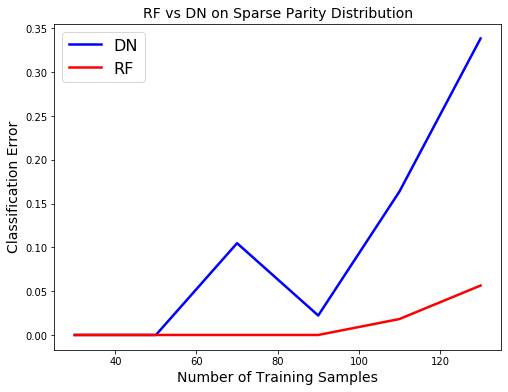

In [33]:
dnn_evolution_mean = np.mean(dnn_evolution_iris, axis = 1)
rf_evolution_mean = np.mean(rf_evolution_iris, axis = 1)

fig = plt.figure(figsize = (8,6))
ax = plt.subplot(111)
ax.plot(sample_sizes, dnn_evolution_mean, 'b', linewidth = 2.5)
ax.plot(sample_sizes, rf_evolution_mean, 'r', linewidth = 2.5)
plt.title('RF vs DN on Sparse Parity Distribution', fontsize = 14)
plt.xlabel('Number of Training Samples', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.legend(['DN', 'RF'], prop={'size': 16})

# fig.savefig('iris.png')

## Sparse Parity Dataset

Sparse parity is a binary classification dataset. It can be thought of as a multivariate generalization of the noisy XOR problem. Creating the dataset requires two parameters: p, the total number of dimensions of the data, and p_star, the number of dimensions within the data that contain useful information about the class label (p_star < p)

In [53]:
X_parity = np.random.uniform(-1,1,[20000,20])

In [54]:
def sparse_parity_labels(X, p_star):
    q = np.zeros(X.shape[0])
    y = np.where(X[:,:3] >= 0, 1, 0)
    return np.sum(y, axis = 1) % 2

In [55]:
y_parity = sparse_parity_labels(X_parity, 3)

In [56]:
np.array(X_parity, dtype=np.float32).shape

(20000, 20)

In [57]:
sample_sizes = [500, 1000, 2000, 3000, 5000, 7000, 10000, 15000, 20000]

rf_evolution_parity, dnn_evolution_parity = test_suite(X_parity, 
                                                          y_parity, 
                                                          iterations = 5, 
                                                          output_nodes = 1,
                                                          sample_sizes = sample_sizes, 
                                                          num_trees = 500, 
                                                          rf_verbose = 1, 
                                                          batch_size = 8)

iteration:  0
Max sample size:  500


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


Epoch 1/10
31/31 [==============================] - 0s 4ms/step - loss: 0.7021 - accuracy: 0.4795 - val_loss: 0.7123 - val_accuracy: 0.5000
Epoch 2/10
31/31 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.4918 - val_loss: 0.7112 - val_accuracy: 0.4623
Epoch 3/10
31/31 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.7103 - val_accuracy: 0.4717
Epoch 4/10
31/31 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.5205 - val_loss: 0.7091 - val_accuracy: 0.4811
Epoch 5/10
31/31 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5287 - val_loss: 0.7103 - val_accuracy: 0.4906
Epoch 6/10
31/31 [==============================] - 0s 2ms/step - loss: 0.6852 - accuracy: 0.5492 - val_loss: 0.7095 - val_accuracy: 0.5000
Epoch 7/10
31/31 [==============================] - 0s 1ms/step - loss: 0.6825 - accuracy: 0.5492 - val_loss: 0.7115 - val_accuracy: 0.4906
Epoch 8/10
31/31 [==

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


Epoch 1/10
62/62 [==============================] - 0s 2ms/step - loss: 0.7413 - accuracy: 0.4376 - val_loss: 0.7097 - val_accuracy: 0.4834
Epoch 2/10
62/62 [==============================] - 0s 1ms/step - loss: 0.7126 - accuracy: 0.4499 - val_loss: 0.7000 - val_accuracy: 0.4834
Epoch 3/10
62/62 [==============================] - 0s 1ms/step - loss: 0.7009 - accuracy: 0.4806 - val_loss: 0.6977 - val_accuracy: 0.4597
Epoch 4/10
62/62 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5256 - val_loss: 0.6963 - val_accuracy: 0.4834
Epoch 5/10
62/62 [==============================] - 0s 1ms/step - loss: 0.6875 - accuracy: 0.5481 - val_loss: 0.6955 - val_accuracy: 0.4739
Epoch 6/10
62/62 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.5726 - val_loss: 0.6953 - val_accuracy: 0.5024
Epoch 7/10
62/62 [==============================] - 0s 1ms/step - loss: 0.6806 - accuracy: 0.5992 - val_loss: 0.6959 - val_accuracy: 0.4976
Epoch 8/10
62/62 [==

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
123/123 [==============================] - 0s 2ms/step - loss: 0.7172 - accuracy: 0.5209 - val_loss: 0.7097 - val_accuracy: 0.5059
Epoch 2/10
123/123 [==============================] - 0s 1ms/step - loss: 0.7011 - accuracy: 0.5271 - val_loss: 0.7056 - val_accuracy: 0.4964
Epoch 3/10
123/123 [==============================] - 0s 1ms/step - loss: 0.6963 - accuracy: 0.5322 - val_loss: 0.7037 - val_accuracy: 0.5107
Epoch 4/10
123/123 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5373 - val_loss: 0.7031 - val_accuracy: 0.5154
Epoch 5/10
123/123 [==============================] - 0s 1ms/step - loss: 0.6911 - accuracy: 0.5434 - val_loss: 0.7030 - val_accuracy: 0.5154
Epoch 6/10
123/123 [==============================] - 0s 1ms/step - loss: 0.6887 - accuracy: 0.5506 - val_loss: 0.7036 - val_accuracy: 0.5083
Epoch 7/10
123/123 [==============================] - 0s 1ms/step - loss: 0.6865 - accuracy: 0.5598 - val_loss: 0.7047 - val_accuracy: 0.5083
Epoch 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
184/184 [==============================] - 0s 1ms/step - loss: 0.6995 - accuracy: 0.5122 - val_loss: 0.6978 - val_accuracy: 0.5127
Epoch 2/10
184/184 [==============================] - 0s 927us/step - loss: 0.6913 - accuracy: 0.5293 - val_loss: 0.6969 - val_accuracy: 0.5175
Epoch 3/10
184/184 [==============================] - 0s 902us/step - loss: 0.6891 - accuracy: 0.5415 - val_loss: 0.6970 - val_accuracy: 0.5159
Epoch 4/10
184/184 [==============================] - 0s 914us/step - loss: 0.6878 - accuracy: 0.5476 - val_loss: 0.6974 - val_accuracy: 0.5159
Epoch 5/10
184/184 [==============================] - 0s 936us/step - loss: 0.6868 - accuracy: 0.5524 - val_loss: 0.6981 - val_accuracy: 0.5079
Epoch 6/10
184/184 [==============================] - 0s 940us/step - loss: 0.6853 - accuracy: 0.5524 - val_loss: 0.6986 - val_accuracy: 0.5095
Epoch 7/10
184/184 [==============================] - 0s 947us/step - loss: 0.6838 - accuracy: 0.5612 - val_loss: 0.6991 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    4.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
307/307 [==============================] - 0s 1ms/step - loss: 0.6977 - accuracy: 0.4935 - val_loss: 0.6949 - val_accuracy: 0.5048
Epoch 2/10
307/307 [==============================] - 0s 851us/step - loss: 0.6927 - accuracy: 0.5216 - val_loss: 0.6942 - val_accuracy: 0.5171
Epoch 3/10
307/307 [==============================] - 0s 853us/step - loss: 0.6909 - accuracy: 0.5188 - val_loss: 0.6940 - val_accuracy: 0.5057
Epoch 4/10
307/307 [==============================] - 0s 847us/step - loss: 0.6896 - accuracy: 0.5327 - val_loss: 0.6942 - val_accuracy: 0.4962
Epoch 5/10
307/307 [==============================] - 0s 845us/step - loss: 0.6886 - accuracy: 0.5412 - val_loss: 0.6945 - val_accuracy: 0.4933
Epoch 6/10
307/307 [==============================] - 0s 860us/step - loss: 0.6875 - accuracy: 0.5437 - val_loss: 0.6944 - val_accuracy: 0.4924
Epoch 7/10
307/307 [==============================] - 0s 861us/step - loss: 0.6864 - accuracy: 0.5535 - val_loss: 0.6948 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    6.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


Epoch 1/10
429/429 [==============================] - 0s 985us/step - loss: 0.7016 - accuracy: 0.5026 - val_loss: 0.6948 - val_accuracy: 0.4918
Epoch 2/10
429/429 [==============================] - 0s 837us/step - loss: 0.6936 - accuracy: 0.5137 - val_loss: 0.6932 - val_accuracy: 0.5061
Epoch 3/10
429/429 [==============================] - 0s 845us/step - loss: 0.6900 - accuracy: 0.5245 - val_loss: 0.6933 - val_accuracy: 0.4864
Epoch 4/10
429/429 [==============================] - 0s 847us/step - loss: 0.6867 - accuracy: 0.5452 - val_loss: 0.6898 - val_accuracy: 0.5163
Epoch 5/10
429/429 [==============================] - 0s 842us/step - loss: 0.6820 - accuracy: 0.5557 - val_loss: 0.6822 - val_accuracy: 0.5449
Epoch 6/10
429/429 [==============================] - 0s 841us/step - loss: 0.6719 - accuracy: 0.5845 - val_loss: 0.6728 - val_accuracy: 0.5571
Epoch 7/10
429/429 [==============================] - 0s 838us/step - loss: 0.6550 - accuracy: 0.6064 - val_loss: 0.6458 - val_accuracy:

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   10.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


Epoch 1/10
613/613 [==============================] - 1s 934us/step - loss: 0.6983 - accuracy: 0.5000 - val_loss: 0.6936 - val_accuracy: 0.5095
Epoch 2/10
613/613 [==============================] - 1s 837us/step - loss: 0.6928 - accuracy: 0.5182 - val_loss: 0.6939 - val_accuracy: 0.5124
Epoch 3/10
613/613 [==============================] - 1s 832us/step - loss: 0.6900 - accuracy: 0.5261 - val_loss: 0.6945 - val_accuracy: 0.5095
Epoch 4/10
613/613 [==============================] - 1s 838us/step - loss: 0.6880 - accuracy: 0.5298 - val_loss: 0.6940 - val_accuracy: 0.5067
Epoch 5/10
613/613 [==============================] - 1s 824us/step - loss: 0.6852 - accuracy: 0.5439 - val_loss: 0.6941 - val_accuracy: 0.5076
Epoch 6/10
613/613 [==============================] - 1s 834us/step - loss: 0.6820 - accuracy: 0.5484 - val_loss: 0.6906 - val_accuracy: 0.5148
Epoch 7/10
613/613 [==============================] - 1s 838us/step - loss: 0.6770 - accuracy: 0.5557 - val_loss: 0.6853 - val_accuracy:

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   17.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished


Epoch 1/10
919/919 [==============================] - 1s 877us/step - loss: 0.6960 - accuracy: 0.5031 - val_loss: 0.6930 - val_accuracy: 0.5182
Epoch 2/10
919/919 [==============================] - 1s 805us/step - loss: 0.6884 - accuracy: 0.5420 - val_loss: 0.6857 - val_accuracy: 0.5532
Epoch 3/10
919/919 [==============================] - 1s 803us/step - loss: 0.6687 - accuracy: 0.6014 - val_loss: 0.6554 - val_accuracy: 0.6106
Epoch 4/10
919/919 [==============================] - 1s 807us/step - loss: 0.6247 - accuracy: 0.6458 - val_loss: 0.6081 - val_accuracy: 0.6496
Epoch 5/10
919/919 [==============================] - 1s 818us/step - loss: 0.5699 - accuracy: 0.6907 - val_loss: 0.5566 - val_accuracy: 0.7106
Epoch 6/10
919/919 [==============================] - 1s 818us/step - loss: 0.5182 - accuracy: 0.7396 - val_loss: 0.5063 - val_accuracy: 0.7537
Epoch 7/10
919/919 [==============================] - 1s 828us/step - loss: 0.4681 - accuracy: 0.7805 - val_loss: 0.4552 - val_accuracy:

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   25.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.4s finished


Epoch 1/10
1225/1225 [==============================] - 1s 796us/step - loss: 0.6979 - accuracy: 0.4997 - val_loss: 0.6947 - val_accuracy: 0.4981
Epoch 2/10
1225/1225 [==============================] - 1s 748us/step - loss: 0.6936 - accuracy: 0.5115 - val_loss: 0.6937 - val_accuracy: 0.5074
Epoch 3/10
1225/1225 [==============================] - 1s 752us/step - loss: 0.6921 - accuracy: 0.5180 - val_loss: 0.6939 - val_accuracy: 0.5067
Epoch 4/10
1225/1225 [==============================] - 1s 745us/step - loss: 0.6909 - accuracy: 0.5246 - val_loss: 0.6932 - val_accuracy: 0.5124
Epoch 5/10
1225/1225 [==============================] - 1s 759us/step - loss: 0.6877 - accuracy: 0.5334 - val_loss: 0.6863 - val_accuracy: 0.5279
Epoch 6/10
1225/1225 [==============================] - 1s 744us/step - loss: 0.6594 - accuracy: 0.6058 - val_loss: 0.6223 - val_accuracy: 0.6788
Epoch 7/10
1225/1225 [==============================] - 1s 763us/step - loss: 0.5398 - accuracy: 0.7568 - val_loss: 0.4661 -

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


Epoch 1/10
31/31 [==============================] - 0s 4ms/step - loss: 0.7045 - accuracy: 0.4836 - val_loss: 0.7097 - val_accuracy: 0.4811
Epoch 2/10
31/31 [==============================] - 0s 1ms/step - loss: 0.6976 - accuracy: 0.5164 - val_loss: 0.7096 - val_accuracy: 0.4623
Epoch 3/10
31/31 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5328 - val_loss: 0.7125 - val_accuracy: 0.4623
Epoch 4/10
31/31 [==============================] - 0s 1ms/step - loss: 0.6897 - accuracy: 0.5492 - val_loss: 0.7114 - val_accuracy: 0.4623
Epoch 5/10
31/31 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5615 - val_loss: 0.7119 - val_accuracy: 0.4623
Epoch 6/10
31/31 [==============================] - 0s 1ms/step - loss: 0.6841 - accuracy: 0.5738 - val_loss: 0.7135 - val_accuracy: 0.4528
Epoch 7/10
31/31 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.5902 - val_loss: 0.7131 - val_accuracy: 0.4623
Epoch 8/10
31/31 [==

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


Epoch 1/10
62/62 [==============================] - 0s 2ms/step - loss: 0.7400 - accuracy: 0.4847 - val_loss: 0.7218 - val_accuracy: 0.4787
Epoch 2/10
62/62 [==============================] - 0s 1ms/step - loss: 0.7117 - accuracy: 0.4744 - val_loss: 0.7070 - val_accuracy: 0.4502
Epoch 3/10
62/62 [==============================] - 0s 1ms/step - loss: 0.7000 - accuracy: 0.4867 - val_loss: 0.7008 - val_accuracy: 0.4502
Epoch 4/10
62/62 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5153 - val_loss: 0.6981 - val_accuracy: 0.4787
Epoch 5/10
62/62 [==============================] - 0s 1ms/step - loss: 0.6894 - accuracy: 0.5481 - val_loss: 0.6976 - val_accuracy: 0.4692
Epoch 6/10
62/62 [==============================] - 0s 1ms/step - loss: 0.6858 - accuracy: 0.5665 - val_loss: 0.6976 - val_accuracy: 0.5024
Epoch 7/10
62/62 [==============================] - 0s 1ms/step - loss: 0.6833 - accuracy: 0.5787 - val_loss: 0.6980 - val_accuracy: 0.5071
Epoch 8/10
62/62 [==

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
123/123 [==============================] - 0s 1ms/step - loss: 0.7387 - accuracy: 0.4872 - val_loss: 0.7155 - val_accuracy: 0.5012
Epoch 2/10
123/123 [==============================] - 0s 1ms/step - loss: 0.7012 - accuracy: 0.5056 - val_loss: 0.7058 - val_accuracy: 0.4917
Epoch 3/10
123/123 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5260 - val_loss: 0.7031 - val_accuracy: 0.4727
Epoch 4/10
123/123 [==============================] - 0s 1ms/step - loss: 0.6885 - accuracy: 0.5444 - val_loss: 0.7023 - val_accuracy: 0.4917
Epoch 5/10
123/123 [==============================] - 0s 1ms/step - loss: 0.6860 - accuracy: 0.5598 - val_loss: 0.7031 - val_accuracy: 0.4869
Epoch 6/10
123/123 [==============================] - 0s 992us/step - loss: 0.6840 - accuracy: 0.5659 - val_loss: 0.7030 - val_accuracy: 0.4964
Epoch 7/10
123/123 [==============================] - 0s 1ms/step - loss: 0.6823 - accuracy: 0.5741 - val_loss: 0.7035 - val_accuracy: 0.4869
Epoc

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
184/184 [==============================] - 0s 1ms/step - loss: 0.7160 - accuracy: 0.4871 - val_loss: 0.6994 - val_accuracy: 0.4937
Epoch 2/10
184/184 [==============================] - 0s 929us/step - loss: 0.6961 - accuracy: 0.5041 - val_loss: 0.6985 - val_accuracy: 0.4889
Epoch 3/10
184/184 [==============================] - 0s 908us/step - loss: 0.6928 - accuracy: 0.5177 - val_loss: 0.6986 - val_accuracy: 0.4937
Epoch 4/10
184/184 [==============================] - 0s 944us/step - loss: 0.6904 - accuracy: 0.5327 - val_loss: 0.6994 - val_accuracy: 0.4968
Epoch 5/10
184/184 [==============================] - 0s 929us/step - loss: 0.6882 - accuracy: 0.5408 - val_loss: 0.6995 - val_accuracy: 0.4921
Epoch 6/10
184/184 [==============================] - 0s 948us/step - loss: 0.6865 - accuracy: 0.5408 - val_loss: 0.6990 - val_accuracy: 0.4889
Epoch 7/10
184/184 [==============================] - 0s 940us/step - loss: 0.6851 - accuracy: 0.5463 - val_loss: 0.6985 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    4.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
307/307 [==============================] - 0s 1ms/step - loss: 0.7197 - accuracy: 0.4776 - val_loss: 0.6995 - val_accuracy: 0.5124
Epoch 2/10
307/307 [==============================] - 0s 875us/step - loss: 0.6995 - accuracy: 0.4939 - val_loss: 0.6976 - val_accuracy: 0.5105
Epoch 3/10
307/307 [==============================] - 0s 874us/step - loss: 0.6955 - accuracy: 0.5094 - val_loss: 0.6970 - val_accuracy: 0.5029
Epoch 4/10
307/307 [==============================] - 0s 880us/step - loss: 0.6929 - accuracy: 0.5180 - val_loss: 0.6968 - val_accuracy: 0.4924
Epoch 5/10
307/307 [==============================] - 0s 875us/step - loss: 0.6910 - accuracy: 0.5290 - val_loss: 0.6963 - val_accuracy: 0.4952
Epoch 6/10
307/307 [==============================] - 0s 871us/step - loss: 0.6894 - accuracy: 0.5351 - val_loss: 0.6955 - val_accuracy: 0.4981
Epoch 7/10
307/307 [==============================] - 0s 862us/step - loss: 0.6876 - accuracy: 0.5478 - val_loss: 0.6953 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    6.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
429/429 [==============================] - 0s 1ms/step - loss: 0.6948 - accuracy: 0.4962 - val_loss: 0.6943 - val_accuracy: 0.4973
Epoch 2/10
429/429 [==============================] - 0s 837us/step - loss: 0.6924 - accuracy: 0.5114 - val_loss: 0.6946 - val_accuracy: 0.4980
Epoch 3/10
429/429 [==============================] - 0s 846us/step - loss: 0.6914 - accuracy: 0.5265 - val_loss: 0.6945 - val_accuracy: 0.5020
Epoch 4/10
429/429 [==============================] - 0s 854us/step - loss: 0.6902 - accuracy: 0.5277 - val_loss: 0.6935 - val_accuracy: 0.5020
Epoch 5/10
429/429 [==============================] - 0s 878us/step - loss: 0.6891 - accuracy: 0.5388 - val_loss: 0.6940 - val_accuracy: 0.5007
Epoch 6/10
429/429 [==============================] - 0s 853us/step - loss: 0.6877 - accuracy: 0.5455 - val_loss: 0.6941 - val_accuracy: 0.5082
Epoch 7/10
429/429 [==============================] - 0s 852us/step - loss: 0.6861 - accuracy: 0.5431 - val_loss: 0.6945 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   10.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


Epoch 1/10
613/613 [==============================] - 1s 911us/step - loss: 0.6966 - accuracy: 0.5092 - val_loss: 0.6981 - val_accuracy: 0.4933
Epoch 2/10
613/613 [==============================] - 1s 823us/step - loss: 0.6924 - accuracy: 0.5265 - val_loss: 0.6965 - val_accuracy: 0.4957
Epoch 3/10
613/613 [==============================] - 1s 828us/step - loss: 0.6897 - accuracy: 0.5345 - val_loss: 0.6947 - val_accuracy: 0.5048
Epoch 4/10
613/613 [==============================] - 1s 821us/step - loss: 0.6865 - accuracy: 0.5506 - val_loss: 0.6924 - val_accuracy: 0.5152
Epoch 5/10
613/613 [==============================] - 1s 835us/step - loss: 0.6799 - accuracy: 0.5629 - val_loss: 0.6838 - val_accuracy: 0.5514
Epoch 6/10
613/613 [==============================] - 1s 829us/step - loss: 0.6647 - accuracy: 0.5998 - val_loss: 0.6593 - val_accuracy: 0.6024
Epoch 7/10
613/613 [==============================] - 1s 838us/step - loss: 0.6263 - accuracy: 0.6778 - val_loss: 0.6046 - val_accuracy:

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   17.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished


Epoch 1/10
919/919 [==============================] - 1s 874us/step - loss: 0.6963 - accuracy: 0.5076 - val_loss: 0.6917 - val_accuracy: 0.5129
Epoch 2/10
919/919 [==============================] - 1s 811us/step - loss: 0.6915 - accuracy: 0.5191 - val_loss: 0.6900 - val_accuracy: 0.5205
Epoch 3/10
919/919 [==============================] - 1s 814us/step - loss: 0.6852 - accuracy: 0.5423 - val_loss: 0.6799 - val_accuracy: 0.5430
Epoch 4/10
919/919 [==============================] - 1s 816us/step - loss: 0.6539 - accuracy: 0.5891 - val_loss: 0.6272 - val_accuracy: 0.6334
Epoch 5/10
919/919 [==============================] - 1s 806us/step - loss: 0.5553 - accuracy: 0.7325 - val_loss: 0.4918 - val_accuracy: 0.7851
Epoch 6/10
919/919 [==============================] - 1s 840us/step - loss: 0.4388 - accuracy: 0.8167 - val_loss: 0.4031 - val_accuracy: 0.8299
Epoch 7/10
919/919 [==============================] - 1s 817us/step - loss: 0.3499 - accuracy: 0.8521 - val_loss: 0.3010 - val_accuracy:

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   27.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.4s finished


Epoch 1/10
1225/1225 [==============================] - 1s 878us/step - loss: 0.6953 - accuracy: 0.5031 - val_loss: 0.6939 - val_accuracy: 0.5088
Epoch 2/10
1225/1225 [==============================] - 1s 801us/step - loss: 0.6903 - accuracy: 0.5289 - val_loss: 0.6897 - val_accuracy: 0.5229
Epoch 3/10
1225/1225 [==============================] - 1s 832us/step - loss: 0.6785 - accuracy: 0.5819 - val_loss: 0.6605 - val_accuracy: 0.6426
Epoch 4/10
1225/1225 [==============================] - 1s 799us/step - loss: 0.6147 - accuracy: 0.6894 - val_loss: 0.5422 - val_accuracy: 0.7733
Epoch 5/10
1225/1225 [==============================] - 1s 795us/step - loss: 0.4745 - accuracy: 0.7934 - val_loss: 0.4081 - val_accuracy: 0.8243
Epoch 6/10
1225/1225 [==============================] - 1s 783us/step - loss: 0.3889 - accuracy: 0.8295 - val_loss: 0.3534 - val_accuracy: 0.8474
Epoch 7/10
1225/1225 [==============================] - 1s 795us/step - loss: 0.3462 - accuracy: 0.8472 - val_loss: 0.3191 -

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


Epoch 1/10
31/31 [==============================] - 0s 3ms/step - loss: 0.7035 - accuracy: 0.4959 - val_loss: 0.6925 - val_accuracy: 0.5283
Epoch 2/10
31/31 [==============================] - 0s 2ms/step - loss: 0.6979 - accuracy: 0.5041 - val_loss: 0.6944 - val_accuracy: 0.4906
Epoch 3/10
31/31 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5328 - val_loss: 0.6944 - val_accuracy: 0.4811
Epoch 4/10
31/31 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5246 - val_loss: 0.6953 - val_accuracy: 0.5094
Epoch 5/10
31/31 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.5410 - val_loss: 0.6970 - val_accuracy: 0.4811
Epoch 6/10
31/31 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.5615 - val_loss: 0.6975 - val_accuracy: 0.4906
Epoch 7/10
31/31 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.5779 - val_loss: 0.6986 - val_accuracy: 0.4811
Epoch 8/10
31/31 [==

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
62/62 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5051 - val_loss: 0.6924 - val_accuracy: 0.5498
Epoch 2/10
62/62 [==============================] - 0s 1ms/step - loss: 0.6907 - accuracy: 0.5194 - val_loss: 0.6931 - val_accuracy: 0.5498
Epoch 3/10
62/62 [==============================] - 0s 1ms/step - loss: 0.6882 - accuracy: 0.5297 - val_loss: 0.6937 - val_accuracy: 0.5592
Epoch 4/10
62/62 [==============================] - 0s 1ms/step - loss: 0.6859 - accuracy: 0.5358 - val_loss: 0.6939 - val_accuracy: 0.5592
Epoch 5/10
62/62 [==============================] - 0s 1ms/step - loss: 0.6841 - accuracy: 0.5460 - val_loss: 0.6944 - val_accuracy: 0.5498
Epoch 6/10
62/62 [==============================] - 0s 1ms/step - loss: 0.6819 - accuracy: 0.5460 - val_loss: 0.6948 - val_accuracy: 0.5498
Epoch 7/10
62/62 [==============================] - 0s 1ms/step - loss: 0.6805 - accuracy: 0.5706 - val_loss: 0.6955 - val_accuracy: 0.5403
Epoch 8/10
62/62 [==

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
123/123 [==============================] - 0s 1ms/step - loss: 0.6989 - accuracy: 0.4995 - val_loss: 0.6971 - val_accuracy: 0.5107
Epoch 2/10
123/123 [==============================] - 0s 987us/step - loss: 0.6937 - accuracy: 0.5189 - val_loss: 0.6952 - val_accuracy: 0.5249
Epoch 3/10
123/123 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5281 - val_loss: 0.6955 - val_accuracy: 0.5178
Epoch 4/10
123/123 [==============================] - 0s 1ms/step - loss: 0.6880 - accuracy: 0.5526 - val_loss: 0.6953 - val_accuracy: 0.5226
Epoch 5/10
123/123 [==============================] - 0s 998us/step - loss: 0.6862 - accuracy: 0.5485 - val_loss: 0.6959 - val_accuracy: 0.5178
Epoch 6/10
123/123 [==============================] - 0s 994us/step - loss: 0.6841 - accuracy: 0.5628 - val_loss: 0.6958 - val_accuracy: 0.5154
Epoch 7/10
123/123 [==============================] - 0s 978us/step - loss: 0.6822 - accuracy: 0.5638 - val_loss: 0.6963 - val_accuracy: 0.508

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
184/184 [==============================] - 0s 1ms/step - loss: 0.7067 - accuracy: 0.4925 - val_loss: 0.6928 - val_accuracy: 0.5286
Epoch 2/10
184/184 [==============================] - 0s 930us/step - loss: 0.6978 - accuracy: 0.5102 - val_loss: 0.6904 - val_accuracy: 0.5317
Epoch 3/10
184/184 [==============================] - 0s 954us/step - loss: 0.6929 - accuracy: 0.5122 - val_loss: 0.6898 - val_accuracy: 0.5460
Epoch 4/10
184/184 [==============================] - 0s 952us/step - loss: 0.6893 - accuracy: 0.5333 - val_loss: 0.6896 - val_accuracy: 0.5571
Epoch 5/10
184/184 [==============================] - 0s 944us/step - loss: 0.6869 - accuracy: 0.5395 - val_loss: 0.6898 - val_accuracy: 0.5492
Epoch 6/10
184/184 [==============================] - 0s 962us/step - loss: 0.6849 - accuracy: 0.5510 - val_loss: 0.6902 - val_accuracy: 0.5476
Epoch 7/10
184/184 [==============================] - 0s 933us/step - loss: 0.6831 - accuracy: 0.5497 - val_loss: 0.6904 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    4.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
307/307 [==============================] - 0s 1ms/step - loss: 0.7046 - accuracy: 0.4984 - val_loss: 0.6983 - val_accuracy: 0.5086
Epoch 2/10
307/307 [==============================] - 0s 892us/step - loss: 0.6957 - accuracy: 0.5176 - val_loss: 0.6964 - val_accuracy: 0.5029
Epoch 3/10
307/307 [==============================] - 0s 885us/step - loss: 0.6926 - accuracy: 0.5253 - val_loss: 0.6956 - val_accuracy: 0.4924
Epoch 4/10
307/307 [==============================] - 0s 869us/step - loss: 0.6905 - accuracy: 0.5351 - val_loss: 0.6956 - val_accuracy: 0.4990
Epoch 5/10
307/307 [==============================] - 0s 858us/step - loss: 0.6886 - accuracy: 0.5457 - val_loss: 0.6952 - val_accuracy: 0.5057
Epoch 6/10
307/307 [==============================] - 0s 869us/step - loss: 0.6862 - accuracy: 0.5514 - val_loss: 0.6961 - val_accuracy: 0.5114
Epoch 7/10
307/307 [==============================] - 0s 859us/step - loss: 0.6834 - accuracy: 0.5620 - val_loss: 0.6980 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    6.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


Epoch 1/10
429/429 [==============================] - 0s 1ms/step - loss: 0.6989 - accuracy: 0.4828 - val_loss: 0.6939 - val_accuracy: 0.5143
Epoch 2/10
429/429 [==============================] - 0s 887us/step - loss: 0.6945 - accuracy: 0.4997 - val_loss: 0.6938 - val_accuracy: 0.4986
Epoch 3/10
429/429 [==============================] - 0s 872us/step - loss: 0.6932 - accuracy: 0.5102 - val_loss: 0.6938 - val_accuracy: 0.5054
Epoch 4/10
429/429 [==============================] - 0s 869us/step - loss: 0.6924 - accuracy: 0.5169 - val_loss: 0.6938 - val_accuracy: 0.5109
Epoch 5/10
429/429 [==============================] - 0s 887us/step - loss: 0.6916 - accuracy: 0.5251 - val_loss: 0.6937 - val_accuracy: 0.5061
Epoch 6/10
429/429 [==============================] - 0s 896us/step - loss: 0.6906 - accuracy: 0.5265 - val_loss: 0.6939 - val_accuracy: 0.5061
Epoch 7/10
429/429 [==============================] - 0s 908us/step - loss: 0.6895 - accuracy: 0.5309 - val_loss: 0.6935 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   11.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


Epoch 1/10
613/613 [==============================] - 1s 980us/step - loss: 0.7002 - accuracy: 0.5024 - val_loss: 0.6910 - val_accuracy: 0.5248
Epoch 2/10
613/613 [==============================] - 1s 846us/step - loss: 0.6922 - accuracy: 0.5206 - val_loss: 0.6911 - val_accuracy: 0.5062
Epoch 3/10
613/613 [==============================] - 1s 847us/step - loss: 0.6880 - accuracy: 0.5292 - val_loss: 0.6870 - val_accuracy: 0.5310
Epoch 4/10
613/613 [==============================] - 1s 910us/step - loss: 0.6807 - accuracy: 0.5471 - val_loss: 0.6745 - val_accuracy: 0.5762
Epoch 5/10
613/613 [==============================] - 1s 867us/step - loss: 0.6619 - accuracy: 0.5900 - val_loss: 0.6466 - val_accuracy: 0.6362
Epoch 6/10
613/613 [==============================] - 1s 886us/step - loss: 0.6237 - accuracy: 0.6565 - val_loss: 0.5953 - val_accuracy: 0.7095
Epoch 7/10
613/613 [==============================] - 1s 877us/step - loss: 0.5634 - accuracy: 0.7347 - val_loss: 0.5330 - val_accuracy:

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   18.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.4s finished


Epoch 1/10
919/919 [==============================] - 1s 895us/step - loss: 0.6937 - accuracy: 0.5080 - val_loss: 0.6934 - val_accuracy: 0.5129
Epoch 2/10
919/919 [==============================] - 1s 856us/step - loss: 0.6924 - accuracy: 0.5216 - val_loss: 0.6933 - val_accuracy: 0.5106
Epoch 3/10
919/919 [==============================] - 1s 886us/step - loss: 0.6913 - accuracy: 0.5259 - val_loss: 0.6928 - val_accuracy: 0.5163
Epoch 4/10
919/919 [==============================] - 1s 862us/step - loss: 0.6897 - accuracy: 0.5310 - val_loss: 0.6914 - val_accuracy: 0.5230
Epoch 5/10
919/919 [==============================] - 1s 830us/step - loss: 0.6858 - accuracy: 0.5574 - val_loss: 0.6847 - val_accuracy: 0.5544
Epoch 6/10
919/919 [==============================] - 1s 821us/step - loss: 0.6708 - accuracy: 0.5959 - val_loss: 0.6581 - val_accuracy: 0.6303
Epoch 7/10
919/919 [==============================] - 1s 841us/step - loss: 0.6370 - accuracy: 0.6461 - val_loss: 0.6179 - val_accuracy:

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   26.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.5s finished


Epoch 1/10
1225/1225 [==============================] - 1s 835us/step - loss: 0.6971 - accuracy: 0.5009 - val_loss: 0.6946 - val_accuracy: 0.5076
Epoch 2/10
1225/1225 [==============================] - 1s 783us/step - loss: 0.6935 - accuracy: 0.5015 - val_loss: 0.6938 - val_accuracy: 0.5088
Epoch 3/10
1225/1225 [==============================] - 1s 775us/step - loss: 0.6921 - accuracy: 0.5193 - val_loss: 0.6928 - val_accuracy: 0.5157
Epoch 4/10
1225/1225 [==============================] - 1s 796us/step - loss: 0.6897 - accuracy: 0.5363 - val_loss: 0.6890 - val_accuracy: 0.5483
Epoch 5/10
1225/1225 [==============================] - 1s 790us/step - loss: 0.6758 - accuracy: 0.5963 - val_loss: 0.6600 - val_accuracy: 0.6402
Epoch 6/10
1225/1225 [==============================] - 1s 807us/step - loss: 0.6179 - accuracy: 0.6764 - val_loss: 0.5684 - val_accuracy: 0.7157
Epoch 7/10
1225/1225 [==============================] - 1s 779us/step - loss: 0.5121 - accuracy: 0.7480 - val_loss: 0.4573 -

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


Epoch 1/10
31/31 [==============================] - 0s 3ms/step - loss: 0.7029 - accuracy: 0.5123 - val_loss: 0.7207 - val_accuracy: 0.5283
Epoch 2/10
31/31 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.5410 - val_loss: 0.7188 - val_accuracy: 0.5283
Epoch 3/10
31/31 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.5574 - val_loss: 0.7182 - val_accuracy: 0.5000
Epoch 4/10
31/31 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5574 - val_loss: 0.7173 - val_accuracy: 0.4717
Epoch 5/10
31/31 [==============================] - 0s 8ms/step - loss: 0.6845 - accuracy: 0.5533 - val_loss: 0.7177 - val_accuracy: 0.4811
Epoch 6/10
31/31 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.5697 - val_loss: 0.7172 - val_accuracy: 0.4717
Epoch 7/10
31/31 [==============================] - 0s 2ms/step - loss: 0.6792 - accuracy: 0.5738 - val_loss: 0.7169 - val_accuracy: 0.4528
Epoch 8/10
31/31 [==

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
62/62 [==============================] - 0s 2ms/step - loss: 0.6993 - accuracy: 0.5276 - val_loss: 0.7253 - val_accuracy: 0.4834
Epoch 2/10
62/62 [==============================] - 0s 1ms/step - loss: 0.6886 - accuracy: 0.5378 - val_loss: 0.7210 - val_accuracy: 0.4739
Epoch 3/10
62/62 [==============================] - 0s 1ms/step - loss: 0.6820 - accuracy: 0.5583 - val_loss: 0.7206 - val_accuracy: 0.4645
Epoch 4/10
62/62 [==============================] - 0s 1ms/step - loss: 0.6769 - accuracy: 0.5726 - val_loss: 0.7212 - val_accuracy: 0.4645
Epoch 5/10
62/62 [==============================] - 0s 1ms/step - loss: 0.6730 - accuracy: 0.5685 - val_loss: 0.7209 - val_accuracy: 0.4502
Epoch 6/10
62/62 [==============================] - 0s 1ms/step - loss: 0.6695 - accuracy: 0.5726 - val_loss: 0.7224 - val_accuracy: 0.4692
Epoch 7/10
62/62 [==============================] - 0s 1ms/step - loss: 0.6654 - accuracy: 0.5869 - val_loss: 0.7237 - val_accuracy: 0.4739
Epoch 8/10
62/62 [==

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
123/123 [==============================] - 0s 2ms/step - loss: 0.7101 - accuracy: 0.5138 - val_loss: 0.6967 - val_accuracy: 0.5202
Epoch 2/10
123/123 [==============================] - 0s 1ms/step - loss: 0.6972 - accuracy: 0.5403 - val_loss: 0.6953 - val_accuracy: 0.5463
Epoch 3/10
123/123 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5526 - val_loss: 0.6952 - val_accuracy: 0.5534
Epoch 4/10
123/123 [==============================] - 0s 1ms/step - loss: 0.6882 - accuracy: 0.5536 - val_loss: 0.6947 - val_accuracy: 0.5677
Epoch 5/10
123/123 [==============================] - 0s 1ms/step - loss: 0.6846 - accuracy: 0.5700 - val_loss: 0.6944 - val_accuracy: 0.5653
Epoch 6/10
123/123 [==============================] - 0s 1ms/step - loss: 0.6824 - accuracy: 0.5649 - val_loss: 0.6948 - val_accuracy: 0.5511
Epoch 7/10
123/123 [==============================] - 0s 1ms/step - loss: 0.6801 - accuracy: 0.5894 - val_loss: 0.6948 - val_accuracy: 0.5558
Epoch 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
184/184 [==============================] - 0s 1ms/step - loss: 0.7269 - accuracy: 0.5095 - val_loss: 0.7111 - val_accuracy: 0.4794
Epoch 2/10
184/184 [==============================] - 0s 1ms/step - loss: 0.6995 - accuracy: 0.5245 - val_loss: 0.7027 - val_accuracy: 0.4921
Epoch 3/10
184/184 [==============================] - 0s 979us/step - loss: 0.6927 - accuracy: 0.5408 - val_loss: 0.7006 - val_accuracy: 0.4984
Epoch 4/10
184/184 [==============================] - 0s 1ms/step - loss: 0.6887 - accuracy: 0.5449 - val_loss: 0.7007 - val_accuracy: 0.4873
Epoch 5/10
184/184 [==============================] - 0s 989us/step - loss: 0.6858 - accuracy: 0.5565 - val_loss: 0.7006 - val_accuracy: 0.4873
Epoch 6/10
184/184 [==============================] - 0s 994us/step - loss: 0.6834 - accuracy: 0.5592 - val_loss: 0.7005 - val_accuracy: 0.4873
Epoch 7/10
184/184 [==============================] - 0s 975us/step - loss: 0.6812 - accuracy: 0.5741 - val_loss: 0.7009 - val_accuracy: 0.481

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    5.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
307/307 [==============================] - 0s 1ms/step - loss: 0.7268 - accuracy: 0.5073 - val_loss: 0.7086 - val_accuracy: 0.4733
Epoch 2/10
307/307 [==============================] - 0s 888us/step - loss: 0.6963 - accuracy: 0.5180 - val_loss: 0.7003 - val_accuracy: 0.4857
Epoch 3/10
307/307 [==============================] - 0s 977us/step - loss: 0.6901 - accuracy: 0.5229 - val_loss: 0.6983 - val_accuracy: 0.4876
Epoch 4/10
307/307 [==============================] - 0s 975us/step - loss: 0.6869 - accuracy: 0.5380 - val_loss: 0.6971 - val_accuracy: 0.5057
Epoch 5/10
307/307 [==============================] - 0s 964us/step - loss: 0.6843 - accuracy: 0.5498 - val_loss: 0.6957 - val_accuracy: 0.5143
Epoch 6/10
307/307 [==============================] - 0s 918us/step - loss: 0.6826 - accuracy: 0.5522 - val_loss: 0.6954 - val_accuracy: 0.5143
Epoch 7/10
307/307 [==============================] - 0s 914us/step - loss: 0.6805 - accuracy: 0.5604 - val_loss: 0.6951 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    7.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


Epoch 1/10
429/429 [==============================] - 0s 1ms/step - loss: 0.6948 - accuracy: 0.5026 - val_loss: 0.6933 - val_accuracy: 0.5129
Epoch 2/10
429/429 [==============================] - 0s 890us/step - loss: 0.6917 - accuracy: 0.5297 - val_loss: 0.6930 - val_accuracy: 0.5007
Epoch 3/10
429/429 [==============================] - 0s 874us/step - loss: 0.6901 - accuracy: 0.5356 - val_loss: 0.6925 - val_accuracy: 0.5075
Epoch 4/10
429/429 [==============================] - 0s 907us/step - loss: 0.6882 - accuracy: 0.5484 - val_loss: 0.6915 - val_accuracy: 0.5143
Epoch 5/10
429/429 [==============================] - 0s 899us/step - loss: 0.6853 - accuracy: 0.5490 - val_loss: 0.6903 - val_accuracy: 0.5252
Epoch 6/10
429/429 [==============================] - 0s 916us/step - loss: 0.6793 - accuracy: 0.5749 - val_loss: 0.6843 - val_accuracy: 0.5422
Epoch 7/10
429/429 [==============================] - 0s 870us/step - loss: 0.6679 - accuracy: 0.5994 - val_loss: 0.6740 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   10.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


Epoch 1/10
613/613 [==============================] - 1s 1ms/step - loss: 0.6962 - accuracy: 0.5053 - val_loss: 0.6925 - val_accuracy: 0.5052
Epoch 2/10
613/613 [==============================] - 1s 914us/step - loss: 0.6922 - accuracy: 0.5135 - val_loss: 0.6915 - val_accuracy: 0.5129
Epoch 3/10
613/613 [==============================] - 1s 912us/step - loss: 0.6896 - accuracy: 0.5259 - val_loss: 0.6919 - val_accuracy: 0.5110
Epoch 4/10
613/613 [==============================] - 1s 900us/step - loss: 0.6879 - accuracy: 0.5396 - val_loss: 0.6916 - val_accuracy: 0.5233
Epoch 5/10
613/613 [==============================] - 1s 865us/step - loss: 0.6856 - accuracy: 0.5465 - val_loss: 0.6915 - val_accuracy: 0.5152
Epoch 6/10
613/613 [==============================] - 1s 875us/step - loss: 0.6835 - accuracy: 0.5488 - val_loss: 0.6902 - val_accuracy: 0.5286
Epoch 7/10
613/613 [==============================] - 1s 849us/step - loss: 0.6794 - accuracy: 0.5710 - val_loss: 0.6875 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   19.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished


Epoch 1/10
919/919 [==============================] - 1s 1ms/step - loss: 0.7030 - accuracy: 0.5012 - val_loss: 0.6929 - val_accuracy: 0.5138
Epoch 2/10
919/919 [==============================] - 1s 798us/step - loss: 0.6903 - accuracy: 0.5295 - val_loss: 0.6857 - val_accuracy: 0.5373
Epoch 3/10
919/919 [==============================] - 1s 816us/step - loss: 0.6730 - accuracy: 0.5809 - val_loss: 0.6634 - val_accuracy: 0.5690
Epoch 4/10
919/919 [==============================] - 1s 835us/step - loss: 0.6385 - accuracy: 0.6487 - val_loss: 0.6219 - val_accuracy: 0.6747
Epoch 5/10
919/919 [==============================] - 1s 864us/step - loss: 0.5929 - accuracy: 0.7047 - val_loss: 0.5805 - val_accuracy: 0.7103
Epoch 6/10
919/919 [==============================] - 1s 869us/step - loss: 0.5524 - accuracy: 0.7323 - val_loss: 0.5418 - val_accuracy: 0.7467
Epoch 7/10
919/919 [==============================] - 1s 809us/step - loss: 0.5243 - accuracy: 0.7466 - val_loss: 0.5214 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   27.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.4s finished


Epoch 1/10
1225/1225 [==============================] - 1s 821us/step - loss: 0.6937 - accuracy: 0.5058 - val_loss: 0.6914 - val_accuracy: 0.5136
Epoch 2/10
1225/1225 [==============================] - 1s 766us/step - loss: 0.6868 - accuracy: 0.5348 - val_loss: 0.6764 - val_accuracy: 0.5550
Epoch 3/10
1225/1225 [==============================] - 1s 771us/step - loss: 0.6427 - accuracy: 0.6292 - val_loss: 0.6027 - val_accuracy: 0.6648
Epoch 4/10
1225/1225 [==============================] - 1s 775us/step - loss: 0.5551 - accuracy: 0.6981 - val_loss: 0.5325 - val_accuracy: 0.6990
Epoch 5/10
1225/1225 [==============================] - 1s 847us/step - loss: 0.4907 - accuracy: 0.7392 - val_loss: 0.4772 - val_accuracy: 0.7871
Epoch 6/10
1225/1225 [==============================] - 1s 797us/step - loss: 0.4386 - accuracy: 0.8123 - val_loss: 0.4281 - val_accuracy: 0.8221
Epoch 7/10
1225/1225 [==============================] - 1s 816us/step - loss: 0.3965 - accuracy: 0.8355 - val_loss: 0.3941 -

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


Epoch 1/10
31/31 [==============================] - 0s 4ms/step - loss: 0.7386 - accuracy: 0.5041 - val_loss: 0.7010 - val_accuracy: 0.4906
Epoch 2/10
31/31 [==============================] - 0s 2ms/step - loss: 0.7172 - accuracy: 0.5082 - val_loss: 0.6905 - val_accuracy: 0.4811
Epoch 3/10
31/31 [==============================] - 0s 2ms/step - loss: 0.7046 - accuracy: 0.5082 - val_loss: 0.6869 - val_accuracy: 0.4717
Epoch 4/10
31/31 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5246 - val_loss: 0.6824 - val_accuracy: 0.4906
Epoch 5/10
31/31 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5328 - val_loss: 0.6804 - val_accuracy: 0.5000
Epoch 6/10
31/31 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.5615 - val_loss: 0.6798 - val_accuracy: 0.5094
Epoch 7/10
31/31 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.5574 - val_loss: 0.6794 - val_accuracy: 0.5094
Epoch 8/10
31/31 [==

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
62/62 [==============================] - 0s 2ms/step - loss: 0.7045 - accuracy: 0.4744 - val_loss: 0.6909 - val_accuracy: 0.5735
Epoch 2/10
62/62 [==============================] - 0s 1ms/step - loss: 0.6949 - accuracy: 0.5051 - val_loss: 0.6891 - val_accuracy: 0.5640
Epoch 3/10
62/62 [==============================] - 0s 1ms/step - loss: 0.6900 - accuracy: 0.5337 - val_loss: 0.6886 - val_accuracy: 0.5640
Epoch 4/10
62/62 [==============================] - 0s 1ms/step - loss: 0.6861 - accuracy: 0.5399 - val_loss: 0.6885 - val_accuracy: 0.5498
Epoch 5/10
62/62 [==============================] - 0s 1ms/step - loss: 0.6830 - accuracy: 0.5603 - val_loss: 0.6887 - val_accuracy: 0.5687
Epoch 6/10
62/62 [==============================] - 0s 1ms/step - loss: 0.6803 - accuracy: 0.5706 - val_loss: 0.6888 - val_accuracy: 0.5735
Epoch 7/10
62/62 [==============================] - 0s 1ms/step - loss: 0.6774 - accuracy: 0.5930 - val_loss: 0.6890 - val_accuracy: 0.5782
Epoch 8/10
62/62 [==

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
123/123 [==============================] - 0s 1ms/step - loss: 0.6946 - accuracy: 0.4934 - val_loss: 0.6917 - val_accuracy: 0.5558
Epoch 2/10
123/123 [==============================] - 0s 1ms/step - loss: 0.6885 - accuracy: 0.5209 - val_loss: 0.6902 - val_accuracy: 0.5558
Epoch 3/10
123/123 [==============================] - 0s 1ms/step - loss: 0.6850 - accuracy: 0.5271 - val_loss: 0.6902 - val_accuracy: 0.5487
Epoch 4/10
123/123 [==============================] - 0s 1ms/step - loss: 0.6818 - accuracy: 0.5638 - val_loss: 0.6908 - val_accuracy: 0.5463
Epoch 5/10
123/123 [==============================] - 0s 989us/step - loss: 0.6791 - accuracy: 0.5802 - val_loss: 0.6917 - val_accuracy: 0.5297
Epoch 6/10
123/123 [==============================] - 0s 999us/step - loss: 0.6767 - accuracy: 0.5802 - val_loss: 0.6921 - val_accuracy: 0.5416
Epoch 7/10
123/123 [==============================] - 0s 997us/step - loss: 0.6744 - accuracy: 0.5884 - val_loss: 0.6929 - val_accuracy: 0.5463


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
184/184 [==============================] - 0s 1ms/step - loss: 0.7196 - accuracy: 0.5027 - val_loss: 0.7035 - val_accuracy: 0.5190
Epoch 2/10
184/184 [==============================] - 0s 953us/step - loss: 0.7038 - accuracy: 0.5170 - val_loss: 0.6969 - val_accuracy: 0.5127
Epoch 3/10
184/184 [==============================] - 0s 928us/step - loss: 0.6968 - accuracy: 0.5224 - val_loss: 0.6946 - val_accuracy: 0.5079
Epoch 4/10
184/184 [==============================] - 0s 957us/step - loss: 0.6930 - accuracy: 0.5320 - val_loss: 0.6943 - val_accuracy: 0.5111
Epoch 5/10
184/184 [==============================] - 0s 916us/step - loss: 0.6908 - accuracy: 0.5354 - val_loss: 0.6944 - val_accuracy: 0.5159
Epoch 6/10
184/184 [==============================] - 0s 933us/step - loss: 0.6888 - accuracy: 0.5401 - val_loss: 0.6945 - val_accuracy: 0.5079
Epoch 7/10
184/184 [==============================] - 0s 978us/step - loss: 0.6869 - accuracy: 0.5408 - val_loss: 0.6951 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    5.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
307/307 [==============================] - 0s 1ms/step - loss: 0.7062 - accuracy: 0.5110 - val_loss: 0.6961 - val_accuracy: 0.5086
Epoch 2/10
307/307 [==============================] - 0s 915us/step - loss: 0.6953 - accuracy: 0.5102 - val_loss: 0.6945 - val_accuracy: 0.5276
Epoch 3/10
307/307 [==============================] - 0s 917us/step - loss: 0.6921 - accuracy: 0.5278 - val_loss: 0.6940 - val_accuracy: 0.5181
Epoch 4/10
307/307 [==============================] - 0s 881us/step - loss: 0.6905 - accuracy: 0.5359 - val_loss: 0.6936 - val_accuracy: 0.5267
Epoch 5/10
307/307 [==============================] - 0s 872us/step - loss: 0.6890 - accuracy: 0.5371 - val_loss: 0.6934 - val_accuracy: 0.5219
Epoch 6/10
307/307 [==============================] - 0s 873us/step - loss: 0.6879 - accuracy: 0.5367 - val_loss: 0.6928 - val_accuracy: 0.5381
Epoch 7/10
307/307 [==============================] - 0s 876us/step - loss: 0.6864 - accuracy: 0.5441 - val_loss: 0.6924 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    6.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


Epoch 1/10
429/429 [==============================] - 0s 994us/step - loss: 0.6972 - accuracy: 0.5055 - val_loss: 0.6960 - val_accuracy: 0.4884
Epoch 2/10
429/429 [==============================] - 0s 865us/step - loss: 0.6918 - accuracy: 0.5108 - val_loss: 0.6942 - val_accuracy: 0.5061
Epoch 3/10
429/429 [==============================] - 0s 844us/step - loss: 0.6890 - accuracy: 0.5306 - val_loss: 0.6926 - val_accuracy: 0.4925
Epoch 4/10
429/429 [==============================] - 0s 848us/step - loss: 0.6857 - accuracy: 0.5455 - val_loss: 0.6907 - val_accuracy: 0.5095
Epoch 5/10
429/429 [==============================] - 0s 852us/step - loss: 0.6801 - accuracy: 0.5723 - val_loss: 0.6844 - val_accuracy: 0.5558
Epoch 6/10
429/429 [==============================] - 1s 1ms/step - loss: 0.6713 - accuracy: 0.6085 - val_loss: 0.6702 - val_accuracy: 0.5980
Epoch 7/10
429/429 [==============================] - 0s 855us/step - loss: 0.6519 - accuracy: 0.6464 - val_loss: 0.6423 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   10.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


Epoch 1/10
613/613 [==============================] - 1s 920us/step - loss: 0.7006 - accuracy: 0.5086 - val_loss: 0.6974 - val_accuracy: 0.4848
Epoch 2/10
613/613 [==============================] - 1s 821us/step - loss: 0.6928 - accuracy: 0.5227 - val_loss: 0.6959 - val_accuracy: 0.4910
Epoch 3/10
613/613 [==============================] - 1s 823us/step - loss: 0.6906 - accuracy: 0.5222 - val_loss: 0.6973 - val_accuracy: 0.4948
Epoch 4/10
613/613 [==============================] - 0s 814us/step - loss: 0.6896 - accuracy: 0.5318 - val_loss: 0.6970 - val_accuracy: 0.4890
Epoch 5/10
613/613 [==============================] - 1s 821us/step - loss: 0.6885 - accuracy: 0.5386 - val_loss: 0.6967 - val_accuracy: 0.4871
Epoch 6/10
613/613 [==============================] - 1s 825us/step - loss: 0.6874 - accuracy: 0.5437 - val_loss: 0.6971 - val_accuracy: 0.4914
Epoch 7/10
613/613 [==============================] - 1s 827us/step - loss: 0.6865 - accuracy: 0.5422 - val_loss: 0.6973 - val_accuracy:

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   18.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished


Epoch 1/10
919/919 [==============================] - 1s 888us/step - loss: 0.6970 - accuracy: 0.5095 - val_loss: 0.6944 - val_accuracy: 0.5125
Epoch 2/10
919/919 [==============================] - 1s 822us/step - loss: 0.6916 - accuracy: 0.5286 - val_loss: 0.6956 - val_accuracy: 0.5106
Epoch 3/10
919/919 [==============================] - 1s 824us/step - loss: 0.6897 - accuracy: 0.5378 - val_loss: 0.6926 - val_accuracy: 0.5186
Epoch 4/10
919/919 [==============================] - 1s 821us/step - loss: 0.6857 - accuracy: 0.5429 - val_loss: 0.6868 - val_accuracy: 0.5208
Epoch 5/10
919/919 [==============================] - 1s 813us/step - loss: 0.6722 - accuracy: 0.5589 - val_loss: 0.6675 - val_accuracy: 0.5662
Epoch 6/10
919/919 [==============================] - 1s 819us/step - loss: 0.6447 - accuracy: 0.6107 - val_loss: 0.6322 - val_accuracy: 0.6255
Epoch 7/10
919/919 [==============================] - 1s 827us/step - loss: 0.5947 - accuracy: 0.6854 - val_loss: 0.5601 - val_accuracy:

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   25.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.4s finished


Epoch 1/10
1225/1225 [==============================] - 1s 795us/step - loss: 0.6961 - accuracy: 0.5147 - val_loss: 0.6939 - val_accuracy: 0.5143
Epoch 2/10
1225/1225 [==============================] - 1s 749us/step - loss: 0.6919 - accuracy: 0.5243 - val_loss: 0.6934 - val_accuracy: 0.5162
Epoch 3/10
1225/1225 [==============================] - 1s 754us/step - loss: 0.6879 - accuracy: 0.5461 - val_loss: 0.6860 - val_accuracy: 0.5517
Epoch 4/10
1225/1225 [==============================] - 1s 744us/step - loss: 0.6492 - accuracy: 0.6313 - val_loss: 0.5928 - val_accuracy: 0.7036
Epoch 5/10
1225/1225 [==============================] - 1s 755us/step - loss: 0.4837 - accuracy: 0.7970 - val_loss: 0.3941 - val_accuracy: 0.8467
Epoch 6/10
1225/1225 [==============================] - 1s 745us/step - loss: 0.3280 - accuracy: 0.8763 - val_loss: 0.2827 - val_accuracy: 0.8898
Epoch 7/10
1225/1225 [==============================] - 1s 766us/step - loss: 0.2443 - accuracy: 0.9072 - val_loss: 0.2177 -

In [60]:
%store dnn_evolution_parity
%store rf_evolution_parity

Stored 'dnn_evolution_parity' (ndarray)
Stored 'rf_evolution_parity' (ndarray)


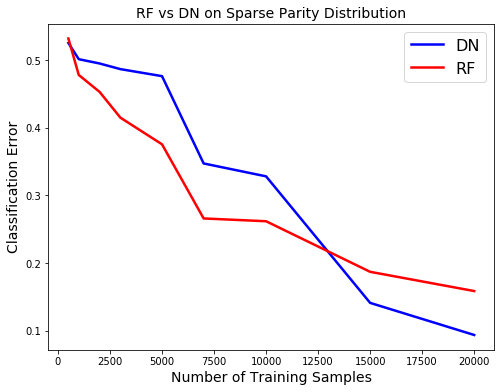

In [61]:
dnn_evolution_mean = np.mean(dnn_evolution_parity, axis = 1)
rf_evolution_mean = np.mean(rf_evolution_parity, axis = 1)

fig = plt.figure(figsize = (8,6))
ax = plt.subplot(111)
ax.plot(sample_sizes, dnn_evolution_mean, 'b', linewidth = 2.5)
ax.plot(sample_sizes, rf_evolution_mean, 'r', linewidth = 2.5)
plt.title('RF vs DN on Sparse Parity Distribution', fontsize = 14)
plt.xlabel('Number of Training Samples', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.legend(['DN', 'RF'], prop={'size': 16})

fig.savefig('sparse_parity_DN_8_8_1_RF_500_trs.png')

In [59]:
# First test iteration stored values

# %store dnn_evolution
# %store rf_evolution

# %store -r dnn_evolution
# %store -r rf_evolution


%store dnn_evolution_parity_20000
%store rf_evolution_parity_20000

UsageError: Unknown variable 'dnn_evolution_parity_20000'


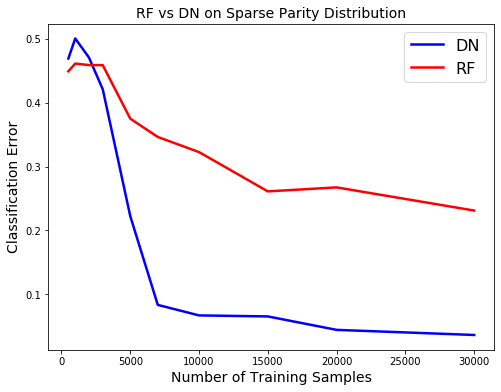

In [15]:
dnn_evolution_mean = np.mean(dnn_evolution, axis = 1)
rf_evolution_mean = np.mean(rf_evolution, axis = 1)

fig = plt.figure(figsize = (8,6))
ax = plt.subplot(111)
ax.plot(sample_sizes, dnn_evolution_mean, 'b', linewidth = 2.5)
ax.plot(sample_sizes, rf_evolution_mean, 'r', linewidth = 2.5)
plt.title('RF vs DN on Sparse Parity Distribution', fontsize = 14)
plt.xlabel('Number of Training Samples', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.legend(['DN', 'RF'], prop={'size': 16})

# fig.savefig('sparse_parity_4_no_extrapolation.png')

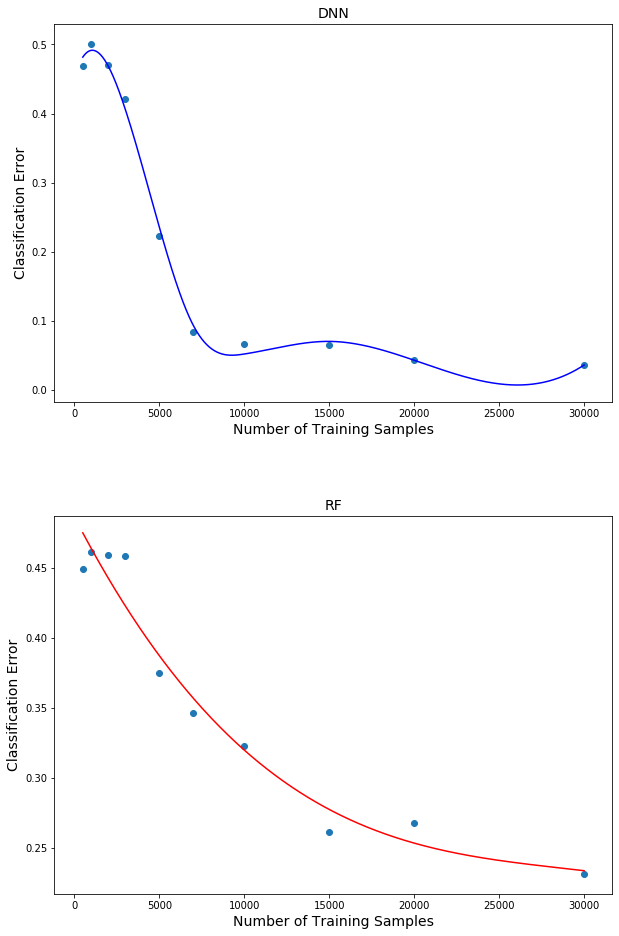

In [7]:
# Fit 1D curve using B-spline representation

from scipy.interpolate import splev, splrep

sample_sizes = [500, 1000, 2000, 3000, 5000, 7000, 10000, 15000, 20000, 30000]

X_spline = np.asarray(sample_sizes)
y_spline_dnn = dnn_evolution_mean
y_spline_rf = rf_evolution_mean

x2 = np.linspace(500,30000,1000)

spl_dnn = splrep(X_spline,y_spline_dnn, k=3, s=0.001)
y2_dnn = splev(x2, spl_dnn)

spl_rf = splrep(X_spline,y_spline_rf, k=3, s=0.01)
y2_rf = splev(x2, spl_rf)

fig = plt.figure(figsize = (10,16))

ax = plt.subplot(211)
ax.plot(x2, y2_dnn, 'b')
ax.scatter(X_spline, y_spline_dnn) 
plt.title('DNN', fontsize = 14)
plt.xlabel('Number of Training Samples', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)

ax = plt.subplot(212)
ax.plot(x2, y2_rf, 'r')
ax.scatter(X_spline, y_spline_rf) 
plt.title('RF', fontsize = 14)
plt.xlabel('Number of Training Samples', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)

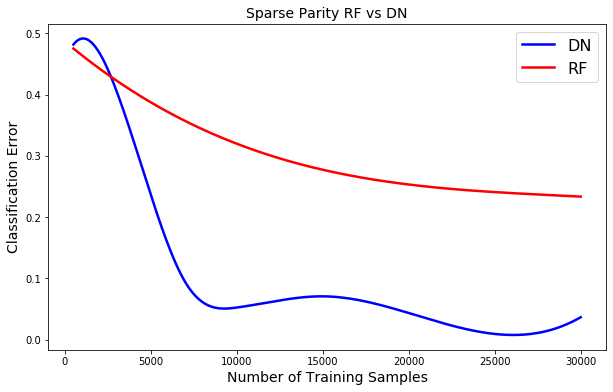

In [46]:
fig = plt.figure(figsize = (10,6))
ax = plt.subplot(111)

ax.plot(x2, y2_dnn, 'b', linewidth = 2.5)
ax.plot(x2, y2_rf, 'r', linewidth = 2.5)

plt.title('Sparse Parity RF vs DN', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.xlabel('Number of Training Samples', fontsize = 14)
plt.legend(['DN', 'RF'], prop={'size': 16})

fig.savefig('sparse_parity_3.png')

## Orthant Dataset

Orthant is a multiclass classification dataset. Each class label is determined by the orthant of the respective sample, so the total number of classes is equal to 2 ^ p, where p is the total number of dimensions.

In [49]:
def orthant(X, p):
    orthant = np.random.uniform(-1,1,[X,p])
    permutations = np.where(orthant < 0, -1, 1)
    unique_labels = np.unique(permutations, axis=0)

    labels = np.zeros(X)
    for sample_index, sample in enumerate(permutations):
        for label_index, comb in enumerate(unique_labels):
            if np.array_equal(comb, sample):
                labels[sample_index] = label_index
    
    return orthant, labels

In [50]:
X_orthant, y_orthant = orthant(10000, 6)

In [51]:
sample_sizes = [500, 700, 1000, 1500, 2000, 3000, 4000, 5000, 6500, 8000, 10000]

rf_evolution_orthant, dnn_evolution_orthant = test_suite(X_orthant,
                                                        y_orthant,
                                                        iterations = 5,
                                                        output_nodes = 2**6,
                                                        sample_sizes = sample_sizes,
                                                        num_trees = 500,
                                                        batch_size = 8
                                                        )

iteration:  0
Max sample size:  500


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


Epoch 1/10
31/31 [==============================] - 0s 4ms/step - loss: 4.1576 - accuracy: 0.0123 - val_loss: 4.1844 - val_accuracy: 0.0000e+00
Epoch 2/10
31/31 [==============================] - 0s 2ms/step - loss: 4.1289 - accuracy: 0.0369 - val_loss: 4.1775 - val_accuracy: 0.0000e+00
Epoch 3/10
31/31 [==============================] - 0s 2ms/step - loss: 4.1014 - accuracy: 0.0410 - val_loss: 4.1704 - val_accuracy: 0.0000e+00
Epoch 4/10
31/31 [==============================] - 0s 2ms/step - loss: 4.0712 - accuracy: 0.0533 - val_loss: 4.1617 - val_accuracy: 0.0189
Epoch 5/10
31/31 [==============================] - 0s 2ms/step - loss: 4.0315 - accuracy: 0.0656 - val_loss: 4.1527 - val_accuracy: 0.0189
Epoch 6/10
31/31 [==============================] - 0s 2ms/step - loss: 3.9873 - accuracy: 0.0697 - val_loss: 4.1400 - val_accuracy: 0.0189
Epoch 7/10
31/31 [==============================] - 0s 2ms/step - loss: 3.9281 - accuracy: 0.0738 - val_loss: 4.1227 - val_accuracy: 0.0283
Epoch 8/

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
43/43 [==============================] - 0s 3ms/step - loss: 4.1541 - accuracy: 0.0204 - val_loss: 4.1596 - val_accuracy: 0.0272
Epoch 2/10
43/43 [==============================] - 0s 1ms/step - loss: 4.1257 - accuracy: 0.0321 - val_loss: 4.1445 - val_accuracy: 0.0408
Epoch 3/10
43/43 [==============================] - 0s 1ms/step - loss: 4.0987 - accuracy: 0.0408 - val_loss: 4.1262 - val_accuracy: 0.0408
Epoch 4/10
43/43 [==============================] - 0s 1ms/step - loss: 4.0660 - accuracy: 0.0554 - val_loss: 4.1059 - val_accuracy: 0.0408
Epoch 5/10
43/43 [==============================] - 0s 1ms/step - loss: 4.0253 - accuracy: 0.0554 - val_loss: 4.0753 - val_accuracy: 0.0408
Epoch 6/10
43/43 [==============================] - 0s 1ms/step - loss: 3.9710 - accuracy: 0.0583 - val_loss: 4.0283 - val_accuracy: 0.0408
Epoch 7/10
43/43 [==============================] - 0s 1ms/step - loss: 3.8979 - accuracy: 0.0816 - val_loss: 3.9592 - val_accuracy: 0.0544
Epoch 8/10
43/43 [==

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
62/62 [==============================] - 0s 2ms/step - loss: 4.1514 - accuracy: 0.0225 - val_loss: 4.1547 - val_accuracy: 0.0237
Epoch 2/10
62/62 [==============================] - 0s 1ms/step - loss: 4.1118 - accuracy: 0.0348 - val_loss: 4.1262 - val_accuracy: 0.0237
Epoch 3/10
62/62 [==============================] - 0s 1ms/step - loss: 4.0608 - accuracy: 0.0511 - val_loss: 4.0806 - val_accuracy: 0.0332
Epoch 4/10
62/62 [==============================] - 0s 1ms/step - loss: 3.9843 - accuracy: 0.0675 - val_loss: 4.0147 - val_accuracy: 0.0332
Epoch 5/10
62/62 [==============================] - 0s 1ms/step - loss: 3.8804 - accuracy: 0.0859 - val_loss: 3.9313 - val_accuracy: 0.0379
Epoch 6/10
62/62 [==============================] - 0s 1ms/step - loss: 3.7530 - accuracy: 0.0982 - val_loss: 3.8344 - val_accuracy: 0.0332
Epoch 7/10
62/62 [==============================] - 0s 1ms/step - loss: 3.6171 - accuracy: 0.1227 - val_loss: 3.7352 - val_accuracy: 0.0569
Epoch 8/10
62/62 [==

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
92/92 [==============================] - 0s 2ms/step - loss: 4.1600 - accuracy: 0.0054 - val_loss: 4.1457 - val_accuracy: 0.0095
Epoch 2/10
92/92 [==============================] - 0s 1ms/step - loss: 4.1061 - accuracy: 0.0245 - val_loss: 4.0930 - val_accuracy: 0.0444
Epoch 3/10
92/92 [==============================] - 0s 1ms/step - loss: 4.0280 - accuracy: 0.0762 - val_loss: 3.9989 - val_accuracy: 0.0952
Epoch 4/10
92/92 [==============================] - 0s 1ms/step - loss: 3.8952 - accuracy: 0.0993 - val_loss: 3.8557 - val_accuracy: 0.1111
Epoch 5/10
92/92 [==============================] - 0s 1ms/step - loss: 3.7132 - accuracy: 0.1116 - val_loss: 3.6797 - val_accuracy: 0.1143
Epoch 6/10
92/92 [==============================] - 0s 1ms/step - loss: 3.5133 - accuracy: 0.1211 - val_loss: 3.5070 - val_accuracy: 0.1238
Epoch 7/10
92/92 [==============================] - 0s 1ms/step - loss: 3.3230 - accuracy: 0.1306 - val_loss: 3.3336 - val_accuracy: 0.1365
Epoch 8/10
92/92 [==

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
123/123 [==============================] - 0s 2ms/step - loss: 4.1528 - accuracy: 0.0225 - val_loss: 4.1199 - val_accuracy: 0.0261
Epoch 2/10
123/123 [==============================] - 0s 1ms/step - loss: 4.0739 - accuracy: 0.0470 - val_loss: 4.0180 - val_accuracy: 0.0665
Epoch 3/10
123/123 [==============================] - 0s 1ms/step - loss: 3.9222 - accuracy: 0.0705 - val_loss: 3.8398 - val_accuracy: 0.0831
Epoch 4/10
123/123 [==============================] - 0s 992us/step - loss: 3.6856 - accuracy: 0.1246 - val_loss: 3.6134 - val_accuracy: 0.1164
Epoch 5/10
123/123 [==============================] - 0s 1ms/step - loss: 3.4075 - accuracy: 0.1583 - val_loss: 3.3734 - val_accuracy: 0.1520
Epoch 6/10
123/123 [==============================] - 0s 1ms/step - loss: 3.1280 - accuracy: 0.1931 - val_loss: 3.1324 - val_accuracy: 0.2067
Epoch 7/10
123/123 [==============================] - 0s 1ms/step - loss: 2.8664 - accuracy: 0.2584 - val_loss: 2.9053 - val_accuracy: 0.2470
Epoc

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
184/184 [==============================] - 0s 1ms/step - loss: 4.1314 - accuracy: 0.0197 - val_loss: 4.0626 - val_accuracy: 0.0349
Epoch 2/10
184/184 [==============================] - 0s 958us/step - loss: 3.9489 - accuracy: 0.0619 - val_loss: 3.8141 - val_accuracy: 0.0841
Epoch 3/10
184/184 [==============================] - 0s 955us/step - loss: 3.6193 - accuracy: 0.1116 - val_loss: 3.4685 - val_accuracy: 0.0968
Epoch 4/10
184/184 [==============================] - 0s 1ms/step - loss: 3.2607 - accuracy: 0.1551 - val_loss: 3.1643 - val_accuracy: 0.1492
Epoch 5/10
184/184 [==============================] - 0s 938us/step - loss: 2.9696 - accuracy: 0.1973 - val_loss: 2.9311 - val_accuracy: 0.1952
Epoch 6/10
184/184 [==============================] - 0s 984us/step - loss: 2.7414 - accuracy: 0.2476 - val_loss: 2.7387 - val_accuracy: 0.2206
Epoch 7/10
184/184 [==============================] - 0s 1ms/step - loss: 2.5545 - accuracy: 0.2830 - val_loss: 2.5884 - val_accuracy: 0.236

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
245/245 [==============================] - 0s 1ms/step - loss: 4.1003 - accuracy: 0.0403 - val_loss: 4.0087 - val_accuracy: 0.0630
Epoch 2/10
245/245 [==============================] - 0s 986us/step - loss: 3.7756 - accuracy: 0.0766 - val_loss: 3.5961 - val_accuracy: 0.0987
Epoch 3/10
245/245 [==============================] - 0s 983us/step - loss: 3.3273 - accuracy: 0.1542 - val_loss: 3.1958 - val_accuracy: 0.1415
Epoch 4/10
245/245 [==============================] - 0s 965us/step - loss: 2.9519 - accuracy: 0.2006 - val_loss: 2.8686 - val_accuracy: 0.1902
Epoch 5/10
245/245 [==============================] - 0s 976us/step - loss: 2.6614 - accuracy: 0.2445 - val_loss: 2.6070 - val_accuracy: 0.2473
Epoch 6/10
245/245 [==============================] - 0s 978us/step - loss: 2.4396 - accuracy: 0.2838 - val_loss: 2.4065 - val_accuracy: 0.2878
Epoch 7/10
245/245 [==============================] - 0s 987us/step - loss: 2.2667 - accuracy: 0.3231 - val_loss: 2.2498 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


Epoch 1/10
307/307 [==============================] - 0s 1ms/step - loss: 4.0553 - accuracy: 0.0388 - val_loss: 3.8775 - val_accuracy: 0.0486
Epoch 2/10
307/307 [==============================] - 0s 921us/step - loss: 3.6138 - accuracy: 0.0706 - val_loss: 3.4028 - val_accuracy: 0.1238
Epoch 3/10
307/307 [==============================] - 0s 980us/step - loss: 3.0992 - accuracy: 0.1682 - val_loss: 2.9240 - val_accuracy: 0.2095
Epoch 4/10
307/307 [==============================] - 0s 945us/step - loss: 2.6282 - accuracy: 0.2796 - val_loss: 2.5283 - val_accuracy: 0.3286
Epoch 5/10
307/307 [==============================] - 0s 938us/step - loss: 2.2605 - accuracy: 0.3718 - val_loss: 2.2068 - val_accuracy: 0.3781
Epoch 6/10
307/307 [==============================] - 0s 943us/step - loss: 1.9799 - accuracy: 0.4388 - val_loss: 1.9744 - val_accuracy: 0.4486
Epoch 7/10
307/307 [==============================] - 0s 987us/step - loss: 1.7751 - accuracy: 0.4845 - val_loss: 1.7868 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    4.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


Epoch 1/10
399/399 [==============================] - 0s 1ms/step - loss: 4.0378 - accuracy: 0.0443 - val_loss: 3.7685 - val_accuracy: 0.0828
Epoch 2/10
399/399 [==============================] - 0s 941us/step - loss: 3.3216 - accuracy: 0.1334 - val_loss: 2.8650 - val_accuracy: 0.2190
Epoch 3/10
399/399 [==============================] - 0s 936us/step - loss: 2.5306 - accuracy: 0.2876 - val_loss: 2.2798 - val_accuracy: 0.3319
Epoch 4/10
399/399 [==============================] - 0s 941us/step - loss: 2.1150 - accuracy: 0.3567 - val_loss: 1.9981 - val_accuracy: 0.3817
Epoch 5/10
399/399 [==============================] - 0s 922us/step - loss: 1.9052 - accuracy: 0.4097 - val_loss: 1.8434 - val_accuracy: 0.4183
Epoch 6/10
399/399 [==============================] - 0s 905us/step - loss: 1.7780 - accuracy: 0.4421 - val_loss: 1.7556 - val_accuracy: 0.4337
Epoch 7/10
399/399 [==============================] - 0s 940us/step - loss: 1.6951 - accuracy: 0.4612 - val_loss: 1.6629 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    5.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished


Epoch 1/10
490/490 [==============================] - 1s 1ms/step - loss: 3.9477 - accuracy: 0.0684 - val_loss: 3.5350 - val_accuracy: 0.1214
Epoch 2/10
490/490 [==============================] - 0s 916us/step - loss: 3.0071 - accuracy: 0.1814 - val_loss: 2.6547 - val_accuracy: 0.2338
Epoch 3/10
490/490 [==============================] - 0s 911us/step - loss: 2.3612 - accuracy: 0.2968 - val_loss: 2.2103 - val_accuracy: 0.3230
Epoch 4/10
490/490 [==============================] - 0s 911us/step - loss: 2.0216 - accuracy: 0.3728 - val_loss: 1.9513 - val_accuracy: 0.3789
Epoch 5/10
490/490 [==============================] - 0s 921us/step - loss: 1.8027 - accuracy: 0.4266 - val_loss: 1.7792 - val_accuracy: 0.4105
Epoch 6/10
490/490 [==============================] - 0s 904us/step - loss: 1.6422 - accuracy: 0.4619 - val_loss: 1.6403 - val_accuracy: 0.4462
Epoch 7/10
490/490 [==============================] - 0s 931us/step - loss: 1.5208 - accuracy: 0.4902 - val_loss: 1.5311 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    5.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished


Epoch 1/10
613/613 [==============================] - 1s 987us/step - loss: 3.8838 - accuracy: 0.0629 - val_loss: 3.3953 - val_accuracy: 0.1367
Epoch 2/10
613/613 [==============================] - 1s 933us/step - loss: 2.9164 - accuracy: 0.2229 - val_loss: 2.5245 - val_accuracy: 0.2967
Epoch 3/10
613/613 [==============================] - 1s 909us/step - loss: 2.2560 - accuracy: 0.3569 - val_loss: 2.0480 - val_accuracy: 0.4000
Epoch 4/10
613/613 [==============================] - 1s 898us/step - loss: 1.8690 - accuracy: 0.4410 - val_loss: 1.7501 - val_accuracy: 0.4590
Epoch 5/10
613/613 [==============================] - 1s 915us/step - loss: 1.6195 - accuracy: 0.5043 - val_loss: 1.5338 - val_accuracy: 0.5129
Epoch 6/10
613/613 [==============================] - 1s 899us/step - loss: 1.4452 - accuracy: 0.5441 - val_loss: 1.3880 - val_accuracy: 0.5586
Epoch 7/10
613/613 [==============================] - 1s 895us/step - loss: 1.3104 - accuracy: 0.5771 - val_loss: 1.2876 - val_accuracy:

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


Epoch 1/10
31/31 [==============================] - 0s 4ms/step - loss: 4.1524 - accuracy: 0.0123 - val_loss: 4.1457 - val_accuracy: 0.0094
Epoch 2/10
31/31 [==============================] - 0s 2ms/step - loss: 4.1311 - accuracy: 0.0205 - val_loss: 4.1341 - val_accuracy: 0.0189
Epoch 3/10
31/31 [==============================] - 0s 2ms/step - loss: 4.1119 - accuracy: 0.0328 - val_loss: 4.1212 - val_accuracy: 0.0189
Epoch 4/10
31/31 [==============================] - 0s 1ms/step - loss: 4.0889 - accuracy: 0.0410 - val_loss: 4.1055 - val_accuracy: 0.0189
Epoch 5/10
31/31 [==============================] - 0s 1ms/step - loss: 4.0600 - accuracy: 0.0656 - val_loss: 4.0839 - val_accuracy: 0.0377
Epoch 6/10
31/31 [==============================] - 0s 2ms/step - loss: 4.0236 - accuracy: 0.0574 - val_loss: 4.0576 - val_accuracy: 0.0472
Epoch 7/10
31/31 [==============================] - 0s 8ms/step - loss: 3.9769 - accuracy: 0.0861 - val_loss: 4.0224 - val_accuracy: 0.0566
Epoch 8/10
31/31 [==

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
43/43 [==============================] - 0s 3ms/step - loss: 4.1729 - accuracy: 0.0292 - val_loss: 4.1700 - val_accuracy: 0.0068
Epoch 2/10
43/43 [==============================] - 0s 1ms/step - loss: 4.1405 - accuracy: 0.0496 - val_loss: 4.1492 - val_accuracy: 0.0340
Epoch 3/10
43/43 [==============================] - 0s 1ms/step - loss: 4.1069 - accuracy: 0.0641 - val_loss: 4.1254 - val_accuracy: 0.0408
Epoch 4/10
43/43 [==============================] - 0s 1ms/step - loss: 4.0641 - accuracy: 0.0671 - val_loss: 4.0925 - val_accuracy: 0.0476
Epoch 5/10
43/43 [==============================] - 0s 1ms/step - loss: 4.0044 - accuracy: 0.0700 - val_loss: 4.0524 - val_accuracy: 0.0476
Epoch 6/10
43/43 [==============================] - 0s 1ms/step - loss: 3.9308 - accuracy: 0.0758 - val_loss: 4.0008 - val_accuracy: 0.0408
Epoch 7/10
43/43 [==============================] - 0s 1ms/step - loss: 3.8443 - accuracy: 0.0933 - val_loss: 3.9445 - val_accuracy: 0.0408
Epoch 8/10
43/43 [==

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
62/62 [==============================] - 0s 2ms/step - loss: 4.1481 - accuracy: 0.0184 - val_loss: 4.1405 - val_accuracy: 0.0332
Epoch 2/10
62/62 [==============================] - 0s 1ms/step - loss: 4.1231 - accuracy: 0.0389 - val_loss: 4.1175 - val_accuracy: 0.0284
Epoch 3/10
62/62 [==============================] - 0s 1ms/step - loss: 4.0889 - accuracy: 0.0613 - val_loss: 4.0808 - val_accuracy: 0.0474
Epoch 4/10
62/62 [==============================] - 0s 1ms/step - loss: 4.0354 - accuracy: 0.0613 - val_loss: 4.0193 - val_accuracy: 0.0521
Epoch 5/10
62/62 [==============================] - 0s 1ms/step - loss: 3.9555 - accuracy: 0.0838 - val_loss: 3.9314 - val_accuracy: 0.0806
Epoch 6/10
62/62 [==============================] - 0s 1ms/step - loss: 3.8479 - accuracy: 0.0879 - val_loss: 3.8288 - val_accuracy: 0.0664
Epoch 7/10
62/62 [==============================] - 0s 1ms/step - loss: 3.7225 - accuracy: 0.1186 - val_loss: 3.7115 - val_accuracy: 0.0853
Epoch 8/10
62/62 [==

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
92/92 [==============================] - 0s 2ms/step - loss: 4.1484 - accuracy: 0.0163 - val_loss: 4.1293 - val_accuracy: 0.0190
Epoch 2/10
92/92 [==============================] - 0s 1ms/step - loss: 4.1024 - accuracy: 0.0245 - val_loss: 4.0746 - val_accuracy: 0.0444
Epoch 3/10
92/92 [==============================] - 0s 1ms/step - loss: 4.0222 - accuracy: 0.0585 - val_loss: 3.9735 - val_accuracy: 0.0667
Epoch 4/10
92/92 [==============================] - 0s 1ms/step - loss: 3.8872 - accuracy: 0.0857 - val_loss: 3.8176 - val_accuracy: 0.0825
Epoch 5/10
92/92 [==============================] - 0s 1ms/step - loss: 3.7024 - accuracy: 0.1156 - val_loss: 3.6316 - val_accuracy: 0.1048
Epoch 6/10
92/92 [==============================] - 0s 1ms/step - loss: 3.5098 - accuracy: 0.1224 - val_loss: 3.4500 - val_accuracy: 0.1333
Epoch 7/10
92/92 [==============================] - 0s 1ms/step - loss: 3.3261 - accuracy: 0.1497 - val_loss: 3.2884 - val_accuracy: 0.1556
Epoch 8/10
92/92 [==

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
123/123 [==============================] - 0s 2ms/step - loss: 4.1557 - accuracy: 0.0276 - val_loss: 4.1099 - val_accuracy: 0.0594
Epoch 2/10
123/123 [==============================] - 0s 1ms/step - loss: 4.0734 - accuracy: 0.0633 - val_loss: 4.0197 - val_accuracy: 0.0784
Epoch 3/10
123/123 [==============================] - 0s 1ms/step - loss: 3.9165 - accuracy: 0.0940 - val_loss: 3.8311 - val_accuracy: 0.0879
Epoch 4/10
123/123 [==============================] - 0s 1ms/step - loss: 3.6626 - accuracy: 0.1042 - val_loss: 3.5871 - val_accuracy: 0.1045
Epoch 5/10
123/123 [==============================] - 0s 1ms/step - loss: 3.3981 - accuracy: 0.1450 - val_loss: 3.3471 - val_accuracy: 0.1354
Epoch 6/10
123/123 [==============================] - 0s 1ms/step - loss: 3.1472 - accuracy: 0.1767 - val_loss: 3.1191 - val_accuracy: 0.1805
Epoch 7/10
123/123 [==============================] - 0s 1ms/step - loss: 2.9159 - accuracy: 0.2237 - val_loss: 2.9254 - val_accuracy: 0.2090
Epoch 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
184/184 [==============================] - 0s 1ms/step - loss: 4.1304 - accuracy: 0.0231 - val_loss: 4.0778 - val_accuracy: 0.0349
Epoch 2/10
184/184 [==============================] - 0s 987us/step - loss: 3.9658 - accuracy: 0.0476 - val_loss: 3.8722 - val_accuracy: 0.0556
Epoch 3/10
184/184 [==============================] - 0s 1ms/step - loss: 3.6913 - accuracy: 0.0884 - val_loss: 3.5938 - val_accuracy: 0.1000
Epoch 4/10
184/184 [==============================] - 0s 985us/step - loss: 3.3816 - accuracy: 0.1272 - val_loss: 3.3086 - val_accuracy: 0.1143
Epoch 5/10
184/184 [==============================] - 0s 986us/step - loss: 3.0834 - accuracy: 0.1673 - val_loss: 3.0399 - val_accuracy: 0.1476
Epoch 6/10
184/184 [==============================] - 0s 984us/step - loss: 2.8184 - accuracy: 0.2361 - val_loss: 2.8055 - val_accuracy: 0.2238
Epoch 7/10
184/184 [==============================] - 0s 986us/step - loss: 2.5899 - accuracy: 0.2857 - val_loss: 2.5987 - val_accuracy: 0.2

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
245/245 [==============================] - 0s 1ms/step - loss: 4.1123 - accuracy: 0.0408 - val_loss: 4.0184 - val_accuracy: 0.0488
Epoch 2/10
245/245 [==============================] - 0s 962us/step - loss: 3.8253 - accuracy: 0.0755 - val_loss: 3.6171 - val_accuracy: 0.0820
Epoch 3/10
245/245 [==============================] - 0s 983us/step - loss: 3.3838 - accuracy: 0.1189 - val_loss: 3.2000 - val_accuracy: 0.1510
Epoch 4/10
245/245 [==============================] - 0s 987us/step - loss: 3.0003 - accuracy: 0.1822 - val_loss: 2.8752 - val_accuracy: 0.1950
Epoch 5/10
245/245 [==============================] - 0s 968us/step - loss: 2.6913 - accuracy: 0.2552 - val_loss: 2.5965 - val_accuracy: 0.2354
Epoch 6/10
245/245 [==============================] - 0s 995us/step - loss: 2.4443 - accuracy: 0.2981 - val_loss: 2.3767 - val_accuracy: 0.2723
Epoch 7/10
245/245 [==============================] - 0s 963us/step - loss: 2.2504 - accuracy: 0.3349 - val_loss: 2.2163 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


Epoch 1/10
307/307 [==============================] - 0s 1ms/step - loss: 4.0693 - accuracy: 0.0335 - val_loss: 3.9242 - val_accuracy: 0.0514
Epoch 2/10
307/307 [==============================] - 0s 962us/step - loss: 3.6195 - accuracy: 0.1012 - val_loss: 3.3429 - val_accuracy: 0.1305
Epoch 3/10
307/307 [==============================] - 0s 941us/step - loss: 3.0242 - accuracy: 0.2041 - val_loss: 2.7543 - val_accuracy: 0.2543
Epoch 4/10
307/307 [==============================] - 0s 945us/step - loss: 2.5451 - accuracy: 0.2967 - val_loss: 2.3650 - val_accuracy: 0.3238
Epoch 5/10
307/307 [==============================] - 0s 951us/step - loss: 2.2213 - accuracy: 0.3584 - val_loss: 2.1056 - val_accuracy: 0.3990
Epoch 6/10
307/307 [==============================] - 0s 951us/step - loss: 1.9906 - accuracy: 0.4176 - val_loss: 1.9257 - val_accuracy: 0.4276
Epoch 7/10
307/307 [==============================] - 0s 956us/step - loss: 1.8169 - accuracy: 0.4584 - val_loss: 1.7772 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


Epoch 1/10
399/399 [==============================] - 0s 1ms/step - loss: 4.0233 - accuracy: 0.0609 - val_loss: 3.7584 - val_accuracy: 0.0711
Epoch 2/10
399/399 [==============================] - 0s 932us/step - loss: 3.3281 - accuracy: 0.1447 - val_loss: 2.9129 - val_accuracy: 0.2264
Epoch 3/10
399/399 [==============================] - 0s 936us/step - loss: 2.5671 - accuracy: 0.3130 - val_loss: 2.3032 - val_accuracy: 0.3458
Epoch 4/10
399/399 [==============================] - 0s 918us/step - loss: 2.0694 - accuracy: 0.4009 - val_loss: 1.9397 - val_accuracy: 0.4293
Epoch 5/10
399/399 [==============================] - 0s 919us/step - loss: 1.7585 - accuracy: 0.4788 - val_loss: 1.6917 - val_accuracy: 0.4835
Epoch 6/10
399/399 [==============================] - 0s 941us/step - loss: 1.5552 - accuracy: 0.5250 - val_loss: 1.5289 - val_accuracy: 0.5333
Epoch 7/10
399/399 [==============================] - 0s 941us/step - loss: 1.4019 - accuracy: 0.5620 - val_loss: 1.3955 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    4.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished


Epoch 1/10
490/490 [==============================] - 1s 1ms/step - loss: 3.9867 - accuracy: 0.0592 - val_loss: 3.6464 - val_accuracy: 0.0976
Epoch 2/10
490/490 [==============================] - 0s 910us/step - loss: 3.2086 - accuracy: 0.1595 - val_loss: 2.8026 - val_accuracy: 0.2564
Epoch 3/10
490/490 [==============================] - 0s 923us/step - loss: 2.4676 - accuracy: 0.3108 - val_loss: 2.2204 - val_accuracy: 0.3599
Epoch 4/10
490/490 [==============================] - 0s 915us/step - loss: 2.0104 - accuracy: 0.4078 - val_loss: 1.8755 - val_accuracy: 0.4105
Epoch 5/10
490/490 [==============================] - 0s 934us/step - loss: 1.7318 - accuracy: 0.4659 - val_loss: 1.6457 - val_accuracy: 0.4854
Epoch 6/10
490/490 [==============================] - 0s 924us/step - loss: 1.5418 - accuracy: 0.5142 - val_loss: 1.4855 - val_accuracy: 0.5306
Epoch 7/10
490/490 [==============================] - 0s 927us/step - loss: 1.4002 - accuracy: 0.5537 - val_loss: 1.3600 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    5.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished


Epoch 1/10
613/613 [==============================] - 1s 1ms/step - loss: 3.8832 - accuracy: 0.0557 - val_loss: 3.4735 - val_accuracy: 0.1095
Epoch 2/10
613/613 [==============================] - 1s 921us/step - loss: 3.0097 - accuracy: 0.2018 - val_loss: 2.6006 - val_accuracy: 0.3119
Epoch 3/10
613/613 [==============================] - 1s 926us/step - loss: 2.2821 - accuracy: 0.3576 - val_loss: 2.0322 - val_accuracy: 0.4133
Epoch 4/10
613/613 [==============================] - 1s 912us/step - loss: 1.8591 - accuracy: 0.4510 - val_loss: 1.7381 - val_accuracy: 0.4652
Epoch 5/10
613/613 [==============================] - 1s 908us/step - loss: 1.6192 - accuracy: 0.4896 - val_loss: 1.5473 - val_accuracy: 0.5100
Epoch 6/10
613/613 [==============================] - 1s 899us/step - loss: 1.4556 - accuracy: 0.5333 - val_loss: 1.4033 - val_accuracy: 0.5438
Epoch 7/10
613/613 [==============================] - 1s 909us/step - loss: 1.3263 - accuracy: 0.5592 - val_loss: 1.2818 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


Epoch 1/10
31/31 [==============================] - 0s 4ms/step - loss: 4.1421 - accuracy: 0.0246 - val_loss: 4.1344 - val_accuracy: 0.0189
Epoch 2/10
31/31 [==============================] - 0s 2ms/step - loss: 4.1128 - accuracy: 0.0451 - val_loss: 4.1160 - val_accuracy: 0.0377
Epoch 3/10
31/31 [==============================] - 0s 2ms/step - loss: 4.0860 - accuracy: 0.0574 - val_loss: 4.0938 - val_accuracy: 0.0566
Epoch 4/10
31/31 [==============================] - 0s 2ms/step - loss: 4.0556 - accuracy: 0.0738 - val_loss: 4.0676 - val_accuracy: 0.0566
Epoch 5/10
31/31 [==============================] - 0s 2ms/step - loss: 4.0197 - accuracy: 0.0902 - val_loss: 4.0377 - val_accuracy: 0.0660
Epoch 6/10
31/31 [==============================] - 0s 2ms/step - loss: 3.9773 - accuracy: 0.0943 - val_loss: 4.0030 - val_accuracy: 0.0755
Epoch 7/10
31/31 [==============================] - 0s 2ms/step - loss: 3.9276 - accuracy: 0.0902 - val_loss: 3.9624 - val_accuracy: 0.0755
Epoch 8/10
31/31 [==

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
43/43 [==============================] - 0s 3ms/step - loss: 4.1539 - accuracy: 0.0321 - val_loss: 4.1422 - val_accuracy: 0.0136
Epoch 2/10
43/43 [==============================] - 0s 1ms/step - loss: 4.1293 - accuracy: 0.0321 - val_loss: 4.1318 - val_accuracy: 0.0136
Epoch 3/10
43/43 [==============================] - 0s 1ms/step - loss: 4.1054 - accuracy: 0.0379 - val_loss: 4.1186 - val_accuracy: 0.0204
Epoch 4/10
43/43 [==============================] - 0s 1ms/step - loss: 4.0767 - accuracy: 0.0554 - val_loss: 4.1000 - val_accuracy: 0.0408
Epoch 5/10
43/43 [==============================] - 0s 1ms/step - loss: 4.0385 - accuracy: 0.0904 - val_loss: 4.0732 - val_accuracy: 0.0476
Epoch 6/10
43/43 [==============================] - 0s 1ms/step - loss: 3.9875 - accuracy: 0.1224 - val_loss: 4.0364 - val_accuracy: 0.0816
Epoch 7/10
43/43 [==============================] - 0s 2ms/step - loss: 3.9163 - accuracy: 0.1312 - val_loss: 3.9885 - val_accuracy: 0.0952
Epoch 8/10
43/43 [==

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
62/62 [==============================] - 0s 2ms/step - loss: 4.1542 - accuracy: 0.0286 - val_loss: 4.1504 - val_accuracy: 0.0427
Epoch 2/10
62/62 [==============================] - 0s 1ms/step - loss: 4.1212 - accuracy: 0.0695 - val_loss: 4.1235 - val_accuracy: 0.0474
Epoch 3/10
62/62 [==============================] - 0s 1ms/step - loss: 4.0772 - accuracy: 0.0654 - val_loss: 4.0785 - val_accuracy: 0.0474
Epoch 4/10
62/62 [==============================] - 0s 1ms/step - loss: 4.0061 - accuracy: 0.0736 - val_loss: 4.0077 - val_accuracy: 0.0569
Epoch 5/10
62/62 [==============================] - 0s 1ms/step - loss: 3.9024 - accuracy: 0.0716 - val_loss: 3.9135 - val_accuracy: 0.0521
Epoch 6/10
62/62 [==============================] - 0s 1ms/step - loss: 3.7738 - accuracy: 0.0736 - val_loss: 3.8111 - val_accuracy: 0.0521
Epoch 7/10
62/62 [==============================] - 0s 1ms/step - loss: 3.6410 - accuracy: 0.0859 - val_loss: 3.7011 - val_accuracy: 0.0569
Epoch 8/10
62/62 [==

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
92/92 [==============================] - 0s 2ms/step - loss: 4.1479 - accuracy: 0.0190 - val_loss: 4.1373 - val_accuracy: 0.0222
Epoch 2/10
92/92 [==============================] - 0s 1ms/step - loss: 4.1009 - accuracy: 0.0354 - val_loss: 4.0840 - val_accuracy: 0.0317
Epoch 3/10
92/92 [==============================] - 0s 1ms/step - loss: 4.0073 - accuracy: 0.0476 - val_loss: 3.9782 - val_accuracy: 0.0413
Epoch 4/10
92/92 [==============================] - 0s 1ms/step - loss: 3.8453 - accuracy: 0.0776 - val_loss: 3.8233 - val_accuracy: 0.0603
Epoch 5/10
92/92 [==============================] - 0s 1ms/step - loss: 3.6297 - accuracy: 0.1007 - val_loss: 3.6413 - val_accuracy: 0.0698
Epoch 6/10
92/92 [==============================] - 0s 1ms/step - loss: 3.4004 - accuracy: 0.1197 - val_loss: 3.4670 - val_accuracy: 0.0730
Epoch 7/10
92/92 [==============================] - 0s 1ms/step - loss: 3.1873 - accuracy: 0.1347 - val_loss: 3.3106 - val_accuracy: 0.0762
Epoch 8/10
92/92 [==

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
123/123 [==============================] - 0s 2ms/step - loss: 4.1406 - accuracy: 0.0306 - val_loss: 4.1105 - val_accuracy: 0.0618
Epoch 2/10
123/123 [==============================] - 0s 1ms/step - loss: 4.0745 - accuracy: 0.0531 - val_loss: 4.0176 - val_accuracy: 0.0831
Epoch 3/10
123/123 [==============================] - 0s 3ms/step - loss: 3.9381 - accuracy: 0.0582 - val_loss: 3.8528 - val_accuracy: 0.0808
Epoch 4/10
123/123 [==============================] - 0s 987us/step - loss: 3.7434 - accuracy: 0.0735 - val_loss: 3.6683 - val_accuracy: 0.1021
Epoch 5/10
123/123 [==============================] - 0s 1ms/step - loss: 3.5376 - accuracy: 0.0899 - val_loss: 3.4904 - val_accuracy: 0.1045
Epoch 6/10
123/123 [==============================] - 0s 1ms/step - loss: 3.3411 - accuracy: 0.1144 - val_loss: 3.3245 - val_accuracy: 0.1283
Epoch 7/10
123/123 [==============================] - 0s 1ms/step - loss: 3.1580 - accuracy: 0.1685 - val_loss: 3.1687 - val_accuracy: 0.1591
Epoc

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
184/184 [==============================] - 0s 1ms/step - loss: 4.1268 - accuracy: 0.0293 - val_loss: 4.0822 - val_accuracy: 0.0825
Epoch 2/10
184/184 [==============================] - 0s 974us/step - loss: 4.0100 - accuracy: 0.0816 - val_loss: 3.9218 - val_accuracy: 0.0794
Epoch 3/10
184/184 [==============================] - 0s 1ms/step - loss: 3.7882 - accuracy: 0.0959 - val_loss: 3.6725 - val_accuracy: 0.1016
Epoch 4/10
184/184 [==============================] - 0s 997us/step - loss: 3.5125 - accuracy: 0.1163 - val_loss: 3.4105 - val_accuracy: 0.1317
Epoch 5/10
184/184 [==============================] - 0s 995us/step - loss: 3.2348 - accuracy: 0.1687 - val_loss: 3.1509 - val_accuracy: 0.2000
Epoch 6/10
184/184 [==============================] - 0s 1ms/step - loss: 2.9647 - accuracy: 0.2177 - val_loss: 2.8971 - val_accuracy: 0.2381
Epoch 7/10
184/184 [==============================] - 0s 1ms/step - loss: 2.7149 - accuracy: 0.2769 - val_loss: 2.6733 - val_accuracy: 0.2810


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
245/245 [==============================] - 0s 1ms/step - loss: 4.1184 - accuracy: 0.0388 - val_loss: 4.0315 - val_accuracy: 0.0511
Epoch 2/10
245/245 [==============================] - 0s 975us/step - loss: 3.8592 - accuracy: 0.0694 - val_loss: 3.6642 - val_accuracy: 0.0809
Epoch 3/10
245/245 [==============================] - 0s 978us/step - loss: 3.3457 - accuracy: 0.1348 - val_loss: 3.0758 - val_accuracy: 0.1795
Epoch 4/10
245/245 [==============================] - 0s 960us/step - loss: 2.7464 - accuracy: 0.2767 - val_loss: 2.5476 - val_accuracy: 0.3068
Epoch 5/10
245/245 [==============================] - 0s 981us/step - loss: 2.2995 - accuracy: 0.3762 - val_loss: 2.2086 - val_accuracy: 0.3615
Epoch 6/10
245/245 [==============================] - 0s 969us/step - loss: 1.9862 - accuracy: 0.4472 - val_loss: 1.9544 - val_accuracy: 0.4197
Epoch 7/10
245/245 [==============================] - 0s 973us/step - loss: 1.7571 - accuracy: 0.4967 - val_loss: 1.7643 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


Epoch 1/10
307/307 [==============================] - 0s 1ms/step - loss: 4.0868 - accuracy: 0.0571 - val_loss: 3.9373 - val_accuracy: 0.0838
Epoch 2/10
307/307 [==============================] - 0s 969us/step - loss: 3.6331 - accuracy: 0.1057 - val_loss: 3.3393 - val_accuracy: 0.1381
Epoch 3/10
307/307 [==============================] - 0s 934us/step - loss: 3.0154 - accuracy: 0.1927 - val_loss: 2.7713 - val_accuracy: 0.2686
Epoch 4/10
307/307 [==============================] - 0s 968us/step - loss: 2.5054 - accuracy: 0.3041 - val_loss: 2.3492 - val_accuracy: 0.3429
Epoch 5/10
307/307 [==============================] - 0s 957us/step - loss: 2.1403 - accuracy: 0.3959 - val_loss: 2.0501 - val_accuracy: 0.4162
Epoch 6/10
307/307 [==============================] - 0s 949us/step - loss: 1.8808 - accuracy: 0.4555 - val_loss: 1.8402 - val_accuracy: 0.4638
Epoch 7/10
307/307 [==============================] - 0s 966us/step - loss: 1.6900 - accuracy: 0.5037 - val_loss: 1.6767 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


Epoch 1/10
399/399 [==============================] - 0s 1ms/step - loss: 4.0033 - accuracy: 0.0490 - val_loss: 3.7442 - val_accuracy: 0.0872
Epoch 2/10
399/399 [==============================] - 0s 943us/step - loss: 3.3717 - accuracy: 0.1385 - val_loss: 3.0920 - val_accuracy: 0.1678
Epoch 3/10
399/399 [==============================] - 0s 933us/step - loss: 2.7688 - accuracy: 0.2229 - val_loss: 2.6047 - val_accuracy: 0.2278
Epoch 4/10
399/399 [==============================] - 0s 940us/step - loss: 2.3689 - accuracy: 0.2942 - val_loss: 2.3073 - val_accuracy: 0.2886
Epoch 5/10
399/399 [==============================] - 0s 944us/step - loss: 2.1185 - accuracy: 0.3548 - val_loss: 2.0975 - val_accuracy: 0.3546
Epoch 6/10
399/399 [==============================] - 0s 940us/step - loss: 1.9417 - accuracy: 0.3940 - val_loss: 1.9604 - val_accuracy: 0.3729
Epoch 7/10
399/399 [==============================] - 0s 934us/step - loss: 1.8172 - accuracy: 0.4273 - val_loss: 1.8505 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    4.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished


Epoch 1/10
490/490 [==============================] - 1s 1ms/step - loss: 3.9592 - accuracy: 0.0375 - val_loss: 3.6174 - val_accuracy: 0.0535
Epoch 2/10
490/490 [==============================] - 0s 934us/step - loss: 3.1834 - accuracy: 0.1434 - val_loss: 2.8386 - val_accuracy: 0.2040
Epoch 3/10
490/490 [==============================] - 0s 909us/step - loss: 2.4866 - accuracy: 0.3080 - val_loss: 2.2690 - val_accuracy: 0.3444
Epoch 4/10
490/490 [==============================] - 0s 912us/step - loss: 2.0389 - accuracy: 0.4009 - val_loss: 1.9338 - val_accuracy: 0.4176
Epoch 5/10
490/490 [==============================] - 0s 908us/step - loss: 1.7671 - accuracy: 0.4636 - val_loss: 1.7295 - val_accuracy: 0.4604
Epoch 6/10
490/490 [==============================] - 0s 933us/step - loss: 1.5904 - accuracy: 0.4955 - val_loss: 1.5846 - val_accuracy: 0.4807
Epoch 7/10
490/490 [==============================] - 0s 931us/step - loss: 1.4613 - accuracy: 0.5262 - val_loss: 1.4689 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    5.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished


Epoch 1/10
613/613 [==============================] - 1s 976us/step - loss: 3.8842 - accuracy: 0.0559 - val_loss: 3.3956 - val_accuracy: 0.1014
Epoch 2/10
613/613 [==============================] - 1s 904us/step - loss: 2.8788 - accuracy: 0.2169 - val_loss: 2.4342 - val_accuracy: 0.3319
Epoch 3/10
613/613 [==============================] - 1s 906us/step - loss: 2.1310 - accuracy: 0.3639 - val_loss: 1.9626 - val_accuracy: 0.3767
Epoch 4/10
613/613 [==============================] - 1s 881us/step - loss: 1.7757 - accuracy: 0.4259 - val_loss: 1.7071 - val_accuracy: 0.4248
Epoch 5/10
613/613 [==============================] - 1s 920us/step - loss: 1.5604 - accuracy: 0.4753 - val_loss: 1.5221 - val_accuracy: 0.4814
Epoch 6/10
613/613 [==============================] - 1s 903us/step - loss: 1.3987 - accuracy: 0.5180 - val_loss: 1.3673 - val_accuracy: 0.5281
Epoch 7/10
613/613 [==============================] - 1s 906us/step - loss: 1.2624 - accuracy: 0.5733 - val_loss: 1.2401 - val_accuracy:

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


Epoch 1/10
31/31 [==============================] - 0s 4ms/step - loss: 4.1547 - accuracy: 0.0041 - val_loss: 4.1551 - val_accuracy: 0.0000e+00
Epoch 2/10
31/31 [==============================] - 0s 2ms/step - loss: 4.1361 - accuracy: 0.0123 - val_loss: 4.1456 - val_accuracy: 0.0094
Epoch 3/10
31/31 [==============================] - 0s 2ms/step - loss: 4.1175 - accuracy: 0.0492 - val_loss: 4.1364 - val_accuracy: 0.0000e+00
Epoch 4/10
31/31 [==============================] - 0s 1ms/step - loss: 4.0964 - accuracy: 0.0656 - val_loss: 4.1247 - val_accuracy: 0.0000e+00
Epoch 5/10
31/31 [==============================] - 0s 2ms/step - loss: 4.0710 - accuracy: 0.0820 - val_loss: 4.1117 - val_accuracy: 0.0000e+00
Epoch 6/10
31/31 [==============================] - 0s 2ms/step - loss: 4.0388 - accuracy: 0.0738 - val_loss: 4.0946 - val_accuracy: 0.0000e+00
Epoch 7/10
31/31 [==============================] - 0s 1ms/step - loss: 4.0011 - accuracy: 0.0861 - val_loss: 4.0758 - val_accuracy: 0.0094


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
43/43 [==============================] - 0s 3ms/step - loss: 4.1645 - accuracy: 0.0058 - val_loss: 4.1462 - val_accuracy: 0.0136
Epoch 2/10
43/43 [==============================] - 0s 1ms/step - loss: 4.1364 - accuracy: 0.0087 - val_loss: 4.1319 - val_accuracy: 0.0476
Epoch 3/10
43/43 [==============================] - 0s 1ms/step - loss: 4.1079 - accuracy: 0.0233 - val_loss: 4.1152 - val_accuracy: 0.0612
Epoch 4/10
43/43 [==============================] - 0s 1ms/step - loss: 4.0737 - accuracy: 0.0466 - val_loss: 4.0930 - val_accuracy: 0.0612
Epoch 5/10
43/43 [==============================] - 0s 1ms/step - loss: 4.0292 - accuracy: 0.0583 - val_loss: 4.0632 - val_accuracy: 0.0612
Epoch 6/10
43/43 [==============================] - 0s 1ms/step - loss: 3.9733 - accuracy: 0.0554 - val_loss: 4.0262 - val_accuracy: 0.0476
Epoch 7/10
43/43 [==============================] - 0s 2ms/step - loss: 3.9032 - accuracy: 0.0612 - val_loss: 3.9793 - val_accuracy: 0.0408
Epoch 8/10
43/43 [==

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
62/62 [==============================] - 0s 2ms/step - loss: 4.1593 - accuracy: 0.0123 - val_loss: 4.1545 - val_accuracy: 0.0284
Epoch 2/10
62/62 [==============================] - 0s 1ms/step - loss: 4.1179 - accuracy: 0.0552 - val_loss: 4.1259 - val_accuracy: 0.0332
Epoch 3/10
62/62 [==============================] - 0s 1ms/step - loss: 4.0685 - accuracy: 0.0511 - val_loss: 4.0864 - val_accuracy: 0.0284
Epoch 4/10
62/62 [==============================] - 0s 1ms/step - loss: 3.9955 - accuracy: 0.0491 - val_loss: 4.0254 - val_accuracy: 0.0521
Epoch 5/10
62/62 [==============================] - 0s 1ms/step - loss: 3.8956 - accuracy: 0.0511 - val_loss: 3.9519 - val_accuracy: 0.0521
Epoch 6/10
62/62 [==============================] - 0s 1ms/step - loss: 3.7784 - accuracy: 0.0552 - val_loss: 3.8701 - val_accuracy: 0.0474
Epoch 7/10
62/62 [==============================] - 0s 1ms/step - loss: 3.6530 - accuracy: 0.0757 - val_loss: 3.7783 - val_accuracy: 0.0569
Epoch 8/10
62/62 [==

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
92/92 [==============================] - 0s 2ms/step - loss: 4.1369 - accuracy: 0.0204 - val_loss: 4.1247 - val_accuracy: 0.0222
Epoch 2/10
92/92 [==============================] - 0s 1ms/step - loss: 4.0697 - accuracy: 0.0653 - val_loss: 4.0561 - val_accuracy: 0.0349
Epoch 3/10
92/92 [==============================] - 0s 1ms/step - loss: 3.9530 - accuracy: 0.0857 - val_loss: 3.9373 - val_accuracy: 0.0508
Epoch 4/10
92/92 [==============================] - 0s 1ms/step - loss: 3.7805 - accuracy: 0.0912 - val_loss: 3.7914 - val_accuracy: 0.0667
Epoch 5/10
92/92 [==============================] - 0s 1ms/step - loss: 3.5942 - accuracy: 0.0966 - val_loss: 3.6539 - val_accuracy: 0.0667
Epoch 6/10
92/92 [==============================] - 0s 1ms/step - loss: 3.4172 - accuracy: 0.1211 - val_loss: 3.5270 - val_accuracy: 0.0762
Epoch 7/10
92/92 [==============================] - 0s 1ms/step - loss: 3.2465 - accuracy: 0.1456 - val_loss: 3.3915 - val_accuracy: 0.0825
Epoch 8/10
92/92 [==

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
123/123 [==============================] - 0s 2ms/step - loss: 4.1471 - accuracy: 0.0123 - val_loss: 4.1300 - val_accuracy: 0.0119
Epoch 2/10
123/123 [==============================] - 0s 1ms/step - loss: 4.0686 - accuracy: 0.0490 - val_loss: 4.0366 - val_accuracy: 0.0594
Epoch 3/10
123/123 [==============================] - 0s 1ms/step - loss: 3.9177 - accuracy: 0.0868 - val_loss: 3.8660 - val_accuracy: 0.0665
Epoch 4/10
123/123 [==============================] - 0s 1ms/step - loss: 3.6833 - accuracy: 0.1124 - val_loss: 3.6370 - val_accuracy: 0.0926
Epoch 5/10
123/123 [==============================] - 0s 1ms/step - loss: 3.4219 - accuracy: 0.1461 - val_loss: 3.4001 - val_accuracy: 0.1211
Epoch 6/10
123/123 [==============================] - 0s 1ms/step - loss: 3.1684 - accuracy: 0.1757 - val_loss: 3.1726 - val_accuracy: 0.1283
Epoch 7/10
123/123 [==============================] - 0s 1ms/step - loss: 2.9334 - accuracy: 0.2053 - val_loss: 2.9549 - val_accuracy: 0.1829
Epoch 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
184/184 [==============================] - 0s 1ms/step - loss: 4.1400 - accuracy: 0.0388 - val_loss: 4.0869 - val_accuracy: 0.0635
Epoch 2/10
184/184 [==============================] - 0s 989us/step - loss: 4.0144 - accuracy: 0.0755 - val_loss: 3.8940 - val_accuracy: 0.0873
Epoch 3/10
184/184 [==============================] - 0s 968us/step - loss: 3.7196 - accuracy: 0.1102 - val_loss: 3.4992 - val_accuracy: 0.1079
Epoch 4/10
184/184 [==============================] - 0s 973us/step - loss: 3.3079 - accuracy: 0.1490 - val_loss: 3.1002 - val_accuracy: 0.1587
Epoch 5/10
184/184 [==============================] - 0s 964us/step - loss: 2.9444 - accuracy: 0.2122 - val_loss: 2.7853 - val_accuracy: 0.2333
Epoch 6/10
184/184 [==============================] - 0s 936us/step - loss: 2.6580 - accuracy: 0.2694 - val_loss: 2.5461 - val_accuracy: 0.3127
Epoch 7/10
184/184 [==============================] - 0s 967us/step - loss: 2.4444 - accuracy: 0.2952 - val_loss: 2.3629 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
245/245 [==============================] - 0s 1ms/step - loss: 4.0817 - accuracy: 0.0311 - val_loss: 3.9756 - val_accuracy: 0.0392
Epoch 2/10
245/245 [==============================] - 0s 980us/step - loss: 3.8226 - accuracy: 0.0505 - val_loss: 3.6791 - val_accuracy: 0.0713
Epoch 3/10
245/245 [==============================] - 0s 967us/step - loss: 3.4906 - accuracy: 0.0970 - val_loss: 3.3460 - val_accuracy: 0.1225
Epoch 4/10
245/245 [==============================] - 0s 964us/step - loss: 3.1553 - accuracy: 0.1603 - val_loss: 3.0335 - val_accuracy: 0.2010
Epoch 5/10
245/245 [==============================] - 0s 972us/step - loss: 2.8416 - accuracy: 0.2246 - val_loss: 2.7411 - val_accuracy: 0.2283
Epoch 6/10
245/245 [==============================] - 0s 958us/step - loss: 2.5506 - accuracy: 0.2864 - val_loss: 2.4843 - val_accuracy: 0.2878
Epoch 7/10
245/245 [==============================] - 0s 986us/step - loss: 2.2956 - accuracy: 0.3476 - val_loss: 2.2797 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


Epoch 1/10
307/307 [==============================] - 0s 1ms/step - loss: 4.0998 - accuracy: 0.0453 - val_loss: 3.9883 - val_accuracy: 0.0733
Epoch 2/10
307/307 [==============================] - 0s 957us/step - loss: 3.6984 - accuracy: 0.1147 - val_loss: 3.4035 - val_accuracy: 0.1210
Epoch 3/10
307/307 [==============================] - 0s 985us/step - loss: 3.0779 - accuracy: 0.2024 - val_loss: 2.8396 - val_accuracy: 0.2333
Epoch 4/10
307/307 [==============================] - 0s 965us/step - loss: 2.5643 - accuracy: 0.3061 - val_loss: 2.3995 - val_accuracy: 0.3438
Epoch 5/10
307/307 [==============================] - 0s 940us/step - loss: 2.1724 - accuracy: 0.3886 - val_loss: 2.0908 - val_accuracy: 0.3876
Epoch 6/10
307/307 [==============================] - 0s 968us/step - loss: 1.8843 - accuracy: 0.4518 - val_loss: 1.8395 - val_accuracy: 0.4629
Epoch 7/10
307/307 [==============================] - 0s 972us/step - loss: 1.6713 - accuracy: 0.5110 - val_loss: 1.6642 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


Epoch 1/10
399/399 [==============================] - 1s 2ms/step - loss: 4.0628 - accuracy: 0.0490 - val_loss: 3.8744 - val_accuracy: 0.0835
Epoch 2/10
399/399 [==============================] - 0s 942us/step - loss: 3.5750 - accuracy: 0.1111 - val_loss: 3.2523 - val_accuracy: 0.1663
Epoch 3/10
399/399 [==============================] - 0s 916us/step - loss: 2.9841 - accuracy: 0.2082 - val_loss: 2.6852 - val_accuracy: 0.2879
Epoch 4/10
399/399 [==============================] - 0s 934us/step - loss: 2.4810 - accuracy: 0.3024 - val_loss: 2.2650 - val_accuracy: 0.3531
Epoch 5/10
399/399 [==============================] - 0s 926us/step - loss: 2.1333 - accuracy: 0.3689 - val_loss: 1.9924 - val_accuracy: 0.4066
Epoch 6/10
399/399 [==============================] - 0s 906us/step - loss: 1.8940 - accuracy: 0.4207 - val_loss: 1.8009 - val_accuracy: 0.4440
Epoch 7/10
399/399 [==============================] - 0s 931us/step - loss: 1.7209 - accuracy: 0.4619 - val_loss: 1.6583 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    4.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


Epoch 1/10
490/490 [==============================] - 1s 1ms/step - loss: 3.9551 - accuracy: 0.0470 - val_loss: 3.6032 - val_accuracy: 0.0863
Epoch 2/10
490/490 [==============================] - 0s 921us/step - loss: 3.1800 - accuracy: 0.1557 - val_loss: 2.8025 - val_accuracy: 0.2332
Epoch 3/10
490/490 [==============================] - 0s 935us/step - loss: 2.5183 - accuracy: 0.3016 - val_loss: 2.2897 - val_accuracy: 0.3308
Epoch 4/10
490/490 [==============================] - 0s 909us/step - loss: 2.1311 - accuracy: 0.3771 - val_loss: 1.9920 - val_accuracy: 0.4111
Epoch 5/10
490/490 [==============================] - 0s 941us/step - loss: 1.9070 - accuracy: 0.4208 - val_loss: 1.8145 - val_accuracy: 0.4598
Epoch 6/10
490/490 [==============================] - 0s 922us/step - loss: 1.7509 - accuracy: 0.4585 - val_loss: 1.6968 - val_accuracy: 0.4836
Epoch 7/10
490/490 [==============================] - 0s 917us/step - loss: 1.6357 - accuracy: 0.4774 - val_loss: 1.5878 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    6.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished


Epoch 1/10
613/613 [==============================] - 1s 1ms/step - loss: 3.8213 - accuracy: 0.0818 - val_loss: 3.1570 - val_accuracy: 0.1895
Epoch 2/10
613/613 [==============================] - 1s 916us/step - loss: 2.6184 - accuracy: 0.2900 - val_loss: 2.2376 - val_accuracy: 0.3519
Epoch 3/10
613/613 [==============================] - 1s 910us/step - loss: 2.0523 - accuracy: 0.3873 - val_loss: 1.9099 - val_accuracy: 0.4043
Epoch 4/10
613/613 [==============================] - 1s 890us/step - loss: 1.8145 - accuracy: 0.4298 - val_loss: 1.7569 - val_accuracy: 0.4262
Epoch 5/10
613/613 [==============================] - 1s 905us/step - loss: 1.6667 - accuracy: 0.4676 - val_loss: 1.6319 - val_accuracy: 0.4633
Epoch 6/10
613/613 [==============================] - 1s 890us/step - loss: 1.5516 - accuracy: 0.4984 - val_loss: 1.5215 - val_accuracy: 0.4924
Epoch 7/10
613/613 [==============================] - 1s 895us/step - loss: 1.4380 - accuracy: 0.5294 - val_loss: 1.4137 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


Epoch 1/10
31/31 [==============================] - 0s 4ms/step - loss: 4.1920 - accuracy: 0.0164 - val_loss: 4.1810 - val_accuracy: 0.0094
Epoch 2/10
31/31 [==============================] - 0s 2ms/step - loss: 4.1670 - accuracy: 0.0205 - val_loss: 4.1641 - val_accuracy: 0.0094
Epoch 3/10
31/31 [==============================] - 0s 2ms/step - loss: 4.1466 - accuracy: 0.0246 - val_loss: 4.1508 - val_accuracy: 0.0283
Epoch 4/10
31/31 [==============================] - 0s 1ms/step - loss: 4.1281 - accuracy: 0.0328 - val_loss: 4.1359 - val_accuracy: 0.0283
Epoch 5/10
31/31 [==============================] - 0s 2ms/step - loss: 4.1069 - accuracy: 0.0328 - val_loss: 4.1196 - val_accuracy: 0.0377
Epoch 6/10
31/31 [==============================] - 0s 1ms/step - loss: 4.0811 - accuracy: 0.0369 - val_loss: 4.0975 - val_accuracy: 0.0283
Epoch 7/10
31/31 [==============================] - 0s 1ms/step - loss: 4.0488 - accuracy: 0.0574 - val_loss: 4.0703 - val_accuracy: 0.0283
Epoch 8/10
31/31 [==

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
43/43 [==============================] - 0s 3ms/step - loss: 4.1841 - accuracy: 0.0117 - val_loss: 4.1612 - val_accuracy: 0.0340
Epoch 2/10
43/43 [==============================] - 0s 1ms/step - loss: 4.1534 - accuracy: 0.0379 - val_loss: 4.1436 - val_accuracy: 0.0408
Epoch 3/10
43/43 [==============================] - 0s 1ms/step - loss: 4.1267 - accuracy: 0.0466 - val_loss: 4.1231 - val_accuracy: 0.0476
Epoch 4/10
43/43 [==============================] - 0s 1ms/step - loss: 4.0931 - accuracy: 0.0671 - val_loss: 4.0974 - val_accuracy: 0.0476
Epoch 5/10
43/43 [==============================] - 0s 1ms/step - loss: 4.0486 - accuracy: 0.0758 - val_loss: 4.0625 - val_accuracy: 0.0680
Epoch 6/10
43/43 [==============================] - 0s 1ms/step - loss: 3.9879 - accuracy: 0.0875 - val_loss: 4.0142 - val_accuracy: 0.0884
Epoch 7/10
43/43 [==============================] - 0s 1ms/step - loss: 3.9066 - accuracy: 0.1137 - val_loss: 3.9574 - val_accuracy: 0.0884
Epoch 8/10
43/43 [==

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
62/62 [==============================] - 0s 2ms/step - loss: 4.1449 - accuracy: 0.0143 - val_loss: 4.1501 - val_accuracy: 0.0190
Epoch 2/10
62/62 [==============================] - 0s 1ms/step - loss: 4.1089 - accuracy: 0.0286 - val_loss: 4.1232 - val_accuracy: 0.0190
Epoch 3/10
62/62 [==============================] - 0s 1ms/step - loss: 4.0660 - accuracy: 0.0450 - val_loss: 4.0863 - val_accuracy: 0.0237
Epoch 4/10
62/62 [==============================] - 0s 1ms/step - loss: 4.0043 - accuracy: 0.0654 - val_loss: 4.0335 - val_accuracy: 0.0284
Epoch 5/10
62/62 [==============================] - 0s 1ms/step - loss: 3.9180 - accuracy: 0.0736 - val_loss: 3.9677 - val_accuracy: 0.0379
Epoch 6/10
62/62 [==============================] - 0s 1ms/step - loss: 3.8143 - accuracy: 0.0920 - val_loss: 3.8948 - val_accuracy: 0.0474
Epoch 7/10
62/62 [==============================] - 0s 1ms/step - loss: 3.7026 - accuracy: 0.0941 - val_loss: 3.8169 - val_accuracy: 0.0664
Epoch 8/10
62/62 [==

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
92/92 [==============================] - 0s 2ms/step - loss: 4.1330 - accuracy: 0.0150 - val_loss: 4.1091 - val_accuracy: 0.0159
Epoch 2/10
92/92 [==============================] - 0s 1ms/step - loss: 4.0586 - accuracy: 0.0449 - val_loss: 4.0311 - val_accuracy: 0.0571
Epoch 3/10
92/92 [==============================] - 0s 1ms/step - loss: 3.9495 - accuracy: 0.0748 - val_loss: 3.9131 - val_accuracy: 0.0635
Epoch 4/10
92/92 [==============================] - 0s 1ms/step - loss: 3.7984 - accuracy: 0.0762 - val_loss: 3.7692 - val_accuracy: 0.0667
Epoch 5/10
92/92 [==============================] - 0s 1ms/step - loss: 3.6387 - accuracy: 0.0993 - val_loss: 3.6277 - val_accuracy: 0.0952
Epoch 6/10
92/92 [==============================] - 0s 1ms/step - loss: 3.4922 - accuracy: 0.1184 - val_loss: 3.5092 - val_accuracy: 0.1016
Epoch 7/10
92/92 [==============================] - 0s 1ms/step - loss: 3.3568 - accuracy: 0.1361 - val_loss: 3.3849 - val_accuracy: 0.1302
Epoch 8/10
92/92 [==

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
123/123 [==============================] - 0s 3ms/step - loss: 4.1381 - accuracy: 0.0255 - val_loss: 4.1119 - val_accuracy: 0.0499
Epoch 2/10
123/123 [==============================] - 0s 1ms/step - loss: 4.0575 - accuracy: 0.0746 - val_loss: 4.0027 - val_accuracy: 0.0689
Epoch 3/10
123/123 [==============================] - 0s 1ms/step - loss: 3.8773 - accuracy: 0.0848 - val_loss: 3.7953 - val_accuracy: 0.0760
Epoch 4/10
123/123 [==============================] - 0s 1ms/step - loss: 3.6146 - accuracy: 0.0981 - val_loss: 3.5459 - val_accuracy: 0.0879
Epoch 5/10
123/123 [==============================] - 0s 1ms/step - loss: 3.3381 - accuracy: 0.1471 - val_loss: 3.3073 - val_accuracy: 0.1330
Epoch 6/10
123/123 [==============================] - 0s 1ms/step - loss: 3.0776 - accuracy: 0.1839 - val_loss: 3.0823 - val_accuracy: 0.1900
Epoch 7/10
123/123 [==============================] - 0s 1ms/step - loss: 2.8385 - accuracy: 0.2237 - val_loss: 2.8615 - val_accuracy: 0.2090
Epoch 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
184/184 [==============================] - 0s 1ms/step - loss: 4.1293 - accuracy: 0.0347 - val_loss: 4.0723 - val_accuracy: 0.0397
Epoch 2/10
184/184 [==============================] - 0s 980us/step - loss: 3.9495 - accuracy: 0.0571 - val_loss: 3.8294 - val_accuracy: 0.0603
Epoch 3/10
184/184 [==============================] - 0s 996us/step - loss: 3.6379 - accuracy: 0.0762 - val_loss: 3.5175 - val_accuracy: 0.0968
Epoch 4/10
184/184 [==============================] - 0s 990us/step - loss: 3.3022 - accuracy: 0.1184 - val_loss: 3.1870 - val_accuracy: 0.1365
Epoch 5/10
184/184 [==============================] - 0s 1ms/step - loss: 2.9772 - accuracy: 0.1796 - val_loss: 2.8771 - val_accuracy: 0.2206
Epoch 6/10
184/184 [==============================] - 0s 1ms/step - loss: 2.6735 - accuracy: 0.2537 - val_loss: 2.6058 - val_accuracy: 0.2683
Epoch 7/10
184/184 [==============================] - 0s 969us/step - loss: 2.4132 - accuracy: 0.3156 - val_loss: 2.3822 - val_accuracy: 0.292

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
245/245 [==============================] - 0s 1ms/step - loss: 4.0986 - accuracy: 0.0429 - val_loss: 3.9897 - val_accuracy: 0.0820
Epoch 2/10
245/245 [==============================] - 0s 970us/step - loss: 3.8016 - accuracy: 0.0939 - val_loss: 3.6042 - val_accuracy: 0.1034
Epoch 3/10
245/245 [==============================] - 0s 953us/step - loss: 3.3919 - accuracy: 0.1399 - val_loss: 3.2140 - val_accuracy: 0.1534
Epoch 4/10
245/245 [==============================] - 0s 978us/step - loss: 2.9786 - accuracy: 0.1986 - val_loss: 2.8305 - val_accuracy: 0.2592
Epoch 5/10
245/245 [==============================] - 0s 988us/step - loss: 2.6081 - accuracy: 0.2879 - val_loss: 2.5276 - val_accuracy: 0.2996
Epoch 6/10
245/245 [==============================] - 0s 972us/step - loss: 2.3154 - accuracy: 0.3502 - val_loss: 2.2907 - val_accuracy: 0.3508
Epoch 7/10
245/245 [==============================] - 0s 975us/step - loss: 2.0931 - accuracy: 0.4074 - val_loss: 2.1043 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


Epoch 1/10
307/307 [==============================] - 0s 1ms/step - loss: 4.0632 - accuracy: 0.0278 - val_loss: 3.8998 - val_accuracy: 0.0571
Epoch 2/10
307/307 [==============================] - 0s 934us/step - loss: 3.5555 - accuracy: 0.1159 - val_loss: 3.2355 - val_accuracy: 0.1514
Epoch 3/10
307/307 [==============================] - 0s 939us/step - loss: 2.9121 - accuracy: 0.2180 - val_loss: 2.6975 - val_accuracy: 0.2648
Epoch 4/10
307/307 [==============================] - 0s 952us/step - loss: 2.4691 - accuracy: 0.2996 - val_loss: 2.3571 - val_accuracy: 0.3219
Epoch 5/10
307/307 [==============================] - 0s 934us/step - loss: 2.1803 - accuracy: 0.3543 - val_loss: 2.1212 - val_accuracy: 0.3667
Epoch 6/10
307/307 [==============================] - 0s 957us/step - loss: 1.9818 - accuracy: 0.4000 - val_loss: 1.9752 - val_accuracy: 0.3914
Epoch 7/10
307/307 [==============================] - 0s 941us/step - loss: 1.8386 - accuracy: 0.4212 - val_loss: 1.8400 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


Epoch 1/10
399/399 [==============================] - 0s 1ms/step - loss: 4.0744 - accuracy: 0.0367 - val_loss: 3.8435 - val_accuracy: 0.0659
Epoch 2/10
399/399 [==============================] - 0s 931us/step - loss: 3.4981 - accuracy: 0.0892 - val_loss: 3.1556 - val_accuracy: 0.1443
Epoch 3/10
399/399 [==============================] - 0s 945us/step - loss: 2.8834 - accuracy: 0.2091 - val_loss: 2.6394 - val_accuracy: 0.2659
Epoch 4/10
399/399 [==============================] - 0s 912us/step - loss: 2.4283 - accuracy: 0.3089 - val_loss: 2.2683 - val_accuracy: 0.3429
Epoch 5/10
399/399 [==============================] - 0s 925us/step - loss: 2.0928 - accuracy: 0.3922 - val_loss: 1.9702 - val_accuracy: 0.4183
Epoch 6/10
399/399 [==============================] - 0s 951us/step - loss: 1.7917 - accuracy: 0.4656 - val_loss: 1.6709 - val_accuracy: 0.5092
Epoch 7/10
399/399 [==============================] - 0s 926us/step - loss: 1.5280 - accuracy: 0.5341 - val_loss: 1.4646 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    4.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished


Epoch 1/10
490/490 [==============================] - 0s 1ms/step - loss: 4.0457 - accuracy: 0.0426 - val_loss: 3.7877 - val_accuracy: 0.0738
Epoch 2/10
490/490 [==============================] - 0s 903us/step - loss: 3.2983 - accuracy: 0.1449 - val_loss: 2.8838 - val_accuracy: 0.2284
Epoch 3/10
490/490 [==============================] - 0s 926us/step - loss: 2.4825 - accuracy: 0.3184 - val_loss: 2.2086 - val_accuracy: 0.3754
Epoch 4/10
490/490 [==============================] - 0s 918us/step - loss: 1.9512 - accuracy: 0.4389 - val_loss: 1.8058 - val_accuracy: 0.4610
Epoch 5/10
490/490 [==============================] - 0s 925us/step - loss: 1.6131 - accuracy: 0.5182 - val_loss: 1.5275 - val_accuracy: 0.5342
Epoch 6/10
490/490 [==============================] - 0s 937us/step - loss: 1.3811 - accuracy: 0.5805 - val_loss: 1.3353 - val_accuracy: 0.5836
Epoch 7/10
490/490 [==============================] - 0s 925us/step - loss: 1.2069 - accuracy: 0.6162 - val_loss: 1.1949 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    5.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished


Epoch 1/10
613/613 [==============================] - 1s 1ms/step - loss: 3.8835 - accuracy: 0.0765 - val_loss: 3.3890 - val_accuracy: 0.1367
Epoch 2/10
613/613 [==============================] - 1s 912us/step - loss: 2.9111 - accuracy: 0.1902 - val_loss: 2.5363 - val_accuracy: 0.2648
Epoch 3/10
613/613 [==============================] - 1s 922us/step - loss: 2.2967 - accuracy: 0.3053 - val_loss: 2.1420 - val_accuracy: 0.3381
Epoch 4/10
613/613 [==============================] - 1s 924us/step - loss: 1.9818 - accuracy: 0.3543 - val_loss: 1.8969 - val_accuracy: 0.3843
Epoch 5/10
613/613 [==============================] - 1s 925us/step - loss: 1.7633 - accuracy: 0.4039 - val_loss: 1.6946 - val_accuracy: 0.4400
Epoch 6/10
613/613 [==============================] - 1s 912us/step - loss: 1.5819 - accuracy: 0.4567 - val_loss: 1.5453 - val_accuracy: 0.4938
Epoch 7/10
613/613 [==============================] - 1s 913us/step - loss: 1.4321 - accuracy: 0.5014 - val_loss: 1.3888 - val_accuracy: 0

In [39]:
%store dnn_evolution_orthant
%store rf_evolution_orthant

# store -r dnn_evolution_orthant
# store -r rf_evolution_orthant

Stored 'dnn_evolution_orthant' (ndarray)
Stored 'rf_evolution_orthant' (ndarray)


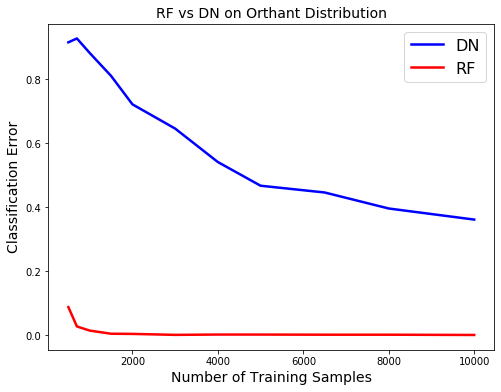

In [52]:
dnn_evolution_mean = np.mean(dnn_evolution_orthant, axis = 1)
rf_evolution_mean = np.mean(rf_evolution_orthant, axis = 1)

fig = plt.figure(figsize = (8,6))
ax = plt.subplot(111)
ax.plot(sample_sizes, dnn_evolution_mean, 'b', linewidth = 2.5)
ax.plot(sample_sizes, rf_evolution_mean, 'r', linewidth = 2.5)
plt.title('RF vs DN on Orthant Distribution', fontsize = 14)
plt.xlabel('Number of Training Samples', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.legend(['DN', 'RF'], prop={'size': 16})

fig.savefig('orthant_1_DN_8_8_1_RF_500_trs.png')

## Trunk Dataset

Trunk is a balanced binary classification dataset. Each class is distributed as a p-dimensional multivariate Gaussian with identity covariance matrices. Each value in the mean vector is less than the previous, so each additional dimension is less informative than the last. The mean for class 0 is the negated mean for class 1.

In [62]:
from random import shuffle

def trunk(dimensions, samples):
    cov = np.identity(dimensions)
    
    mu = [1/(i+1) for i in range(dimensions)]
    data_pos = np.random.multivariate_normal(mu, cov, samples)
    labels_pos = [np.ones(samples)]
    
    mu_neg = [-1/(i+1) for i in range(dimensions)]
    data_neg = np.random.multivariate_normal(mu_neg, cov, samples)
    labels_neg = [np.zeros(samples)]

    data = np.concatenate((data_pos, data_neg), axis = 0)
    labels = np.concatenate((np.reshape(labels_pos, samples), np.reshape(labels_neg,samples)), axis = 0)
    
    ind_list = [i for i in range(samples*2)]
    shuffle(ind_list)
    data  = data[ind_list]
    labels = labels[ind_list]

    return data, labels
    

In [63]:
X_trunk, y_trunk = trunk(10, 5000)
X_trunk.shape
y_trunk.shape

(10000,)

In [64]:
sample_sizes = [700, 1000, 1300, 1600, 2000, 3000, 4000, 5000, 6500, 8000, 10000]

rf_evolution_trunk, dnn_evolution_trunk = test_suite(X_trunk,
                                                        y_trunk,
                                                        iterations = 5,
                                                        output_nodes = 1,
                                                        sample_sizes = sample_sizes,
                                                        num_trees = 500,
                                                        batch_size = 8
                                                        )

iteration:  0
Max sample size:  700


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


Epoch 1/10
43/43 [==============================] - 0s 3ms/step - loss: 0.8561 - accuracy: 0.4665 - val_loss: 0.7780 - val_accuracy: 0.4898
Epoch 2/10
43/43 [==============================] - 0s 1ms/step - loss: 0.7477 - accuracy: 0.5044 - val_loss: 0.7010 - val_accuracy: 0.5646
Epoch 3/10
43/43 [==============================] - 0s 1ms/step - loss: 0.6774 - accuracy: 0.5948 - val_loss: 0.6466 - val_accuracy: 0.6463
Epoch 4/10
43/43 [==============================] - 0s 1ms/step - loss: 0.6233 - accuracy: 0.6735 - val_loss: 0.6042 - val_accuracy: 0.7007
Epoch 5/10
43/43 [==============================] - 0s 1ms/step - loss: 0.5770 - accuracy: 0.7376 - val_loss: 0.5628 - val_accuracy: 0.7347
Epoch 6/10
43/43 [==============================] - 0s 1ms/step - loss: 0.5296 - accuracy: 0.7930 - val_loss: 0.5193 - val_accuracy: 0.7755
Epoch 7/10
43/43 [==============================] - 0s 1ms/step - loss: 0.4806 - accuracy: 0.8192 - val_loss: 0.4763 - val_accuracy: 0.8027
Epoch 8/10
43/43 [==

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


Epoch 1/10
62/62 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5685 - val_loss: 0.6525 - val_accuracy: 0.5545
Epoch 2/10
62/62 [==============================] - 0s 1ms/step - loss: 0.6190 - accuracy: 0.6094 - val_loss: 0.5983 - val_accuracy: 0.5972
Epoch 3/10
62/62 [==============================] - 0s 1ms/step - loss: 0.5754 - accuracy: 0.6564 - val_loss: 0.5508 - val_accuracy: 0.6540
Epoch 4/10
62/62 [==============================] - 0s 1ms/step - loss: 0.5375 - accuracy: 0.6953 - val_loss: 0.5061 - val_accuracy: 0.7109
Epoch 5/10
62/62 [==============================] - 0s 1ms/step - loss: 0.4978 - accuracy: 0.7546 - val_loss: 0.4620 - val_accuracy: 0.8246
Epoch 6/10
62/62 [==============================] - 0s 1ms/step - loss: 0.4520 - accuracy: 0.8262 - val_loss: 0.4097 - val_accuracy: 0.8673
Epoch 7/10
62/62 [==============================] - 0s 1ms/step - loss: 0.4016 - accuracy: 0.8732 - val_loss: 0.3597 - val_accuracy: 0.9005
Epoch 8/10
62/62 [==

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


Epoch 1/10
80/80 [==============================] - 0s 2ms/step - loss: 0.8064 - accuracy: 0.4364 - val_loss: 0.7204 - val_accuracy: 0.5861
Epoch 2/10
80/80 [==============================] - 0s 1ms/step - loss: 0.6682 - accuracy: 0.5636 - val_loss: 0.6001 - val_accuracy: 0.6593
Epoch 3/10
80/80 [==============================] - 0s 1ms/step - loss: 0.5757 - accuracy: 0.6750 - val_loss: 0.5018 - val_accuracy: 0.7729
Epoch 4/10
80/80 [==============================] - 0s 1ms/step - loss: 0.4917 - accuracy: 0.7959 - val_loss: 0.4088 - val_accuracy: 0.8388
Epoch 5/10
80/80 [==============================] - 0s 1ms/step - loss: 0.4067 - accuracy: 0.8509 - val_loss: 0.3258 - val_accuracy: 0.8828
Epoch 6/10
80/80 [==============================] - 0s 1ms/step - loss: 0.3326 - accuracy: 0.8791 - val_loss: 0.2707 - val_accuracy: 0.8901
Epoch 7/10
80/80 [==============================] - 0s 1ms/step - loss: 0.2858 - accuracy: 0.8964 - val_loss: 0.2427 - val_accuracy: 0.9048
Epoch 8/10
80/80 [==

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
98/98 [==============================] - 0s 2ms/step - loss: 0.5944 - accuracy: 0.7079 - val_loss: 0.5233 - val_accuracy: 0.8333
Epoch 2/10
98/98 [==============================] - 0s 964us/step - loss: 0.4414 - accuracy: 0.8469 - val_loss: 0.4092 - val_accuracy: 0.8780
Epoch 3/10
98/98 [==============================] - 0s 979us/step - loss: 0.3494 - accuracy: 0.8788 - val_loss: 0.3355 - val_accuracy: 0.8958
Epoch 4/10
98/98 [==============================] - 0s 994us/step - loss: 0.2953 - accuracy: 0.8865 - val_loss: 0.2959 - val_accuracy: 0.8988
Epoch 5/10
98/98 [==============================] - 0s 1ms/step - loss: 0.2662 - accuracy: 0.8929 - val_loss: 0.2771 - val_accuracy: 0.9048
Epoch 6/10
98/98 [==============================] - 0s 1ms/step - loss: 0.2501 - accuracy: 0.8967 - val_loss: 0.2660 - val_accuracy: 0.9048
Epoch 7/10
98/98 [==============================] - 0s 1ms/step - loss: 0.2408 - accuracy: 0.8967 - val_loss: 0.2611 - val_accuracy: 0.9018
Epoch 8/10
98/

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
123/123 [==============================] - 0s 1ms/step - loss: 0.5663 - accuracy: 0.7559 - val_loss: 0.4828 - val_accuracy: 0.8147
Epoch 2/10
123/123 [==============================] - 0s 1ms/step - loss: 0.4293 - accuracy: 0.8335 - val_loss: 0.3700 - val_accuracy: 0.8646
Epoch 3/10
123/123 [==============================] - 0s 1ms/step - loss: 0.3442 - accuracy: 0.8631 - val_loss: 0.3080 - val_accuracy: 0.9026
Epoch 4/10
123/123 [==============================] - 0s 1ms/step - loss: 0.3028 - accuracy: 0.8774 - val_loss: 0.2813 - val_accuracy: 0.9050
Epoch 5/10
123/123 [==============================] - 0s 1ms/step - loss: 0.2836 - accuracy: 0.8815 - val_loss: 0.2693 - val_accuracy: 0.9074
Epoch 6/10
123/123 [==============================] - 0s 992us/step - loss: 0.2740 - accuracy: 0.8866 - val_loss: 0.2632 - val_accuracy: 0.9121
Epoch 7/10
123/123 [==============================] - 0s 1ms/step - loss: 0.2685 - accuracy: 0.8887 - val_loss: 0.2602 - val_accuracy: 0.9121
Epoc

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
184/184 [==============================] - 0s 1ms/step - loss: 0.6055 - accuracy: 0.6190 - val_loss: 0.4722 - val_accuracy: 0.8317
Epoch 2/10
184/184 [==============================] - 0s 969us/step - loss: 0.3820 - accuracy: 0.8830 - val_loss: 0.3340 - val_accuracy: 0.8857
Epoch 3/10
184/184 [==============================] - 0s 933us/step - loss: 0.2794 - accuracy: 0.9000 - val_loss: 0.2986 - val_accuracy: 0.8841
Epoch 4/10
184/184 [==============================] - 0s 957us/step - loss: 0.2518 - accuracy: 0.9041 - val_loss: 0.2899 - val_accuracy: 0.8873
Epoch 5/10
184/184 [==============================] - 0s 962us/step - loss: 0.2430 - accuracy: 0.9061 - val_loss: 0.2849 - val_accuracy: 0.8873
Epoch 6/10
184/184 [==============================] - 0s 937us/step - loss: 0.2391 - accuracy: 0.9054 - val_loss: 0.2820 - val_accuracy: 0.8889
Epoch 7/10
184/184 [==============================] - 0s 954us/step - loss: 0.2351 - accuracy: 0.9109 - val_loss: 0.2822 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
245/245 [==============================] - 0s 1ms/step - loss: 0.5522 - accuracy: 0.6953 - val_loss: 0.4205 - val_accuracy: 0.8276
Epoch 2/10
245/245 [==============================] - 0s 916us/step - loss: 0.3311 - accuracy: 0.8709 - val_loss: 0.3077 - val_accuracy: 0.8787
Epoch 3/10
245/245 [==============================] - 0s 928us/step - loss: 0.2716 - accuracy: 0.8913 - val_loss: 0.2836 - val_accuracy: 0.8859
Epoch 4/10
245/245 [==============================] - 0s 935us/step - loss: 0.2562 - accuracy: 0.8938 - val_loss: 0.2794 - val_accuracy: 0.8906
Epoch 5/10
245/245 [==============================] - 0s 944us/step - loss: 0.2499 - accuracy: 0.8984 - val_loss: 0.2761 - val_accuracy: 0.8906
Epoch 6/10
245/245 [==============================] - 0s 928us/step - loss: 0.2462 - accuracy: 0.8999 - val_loss: 0.2740 - val_accuracy: 0.8894
Epoch 7/10
245/245 [==============================] - 0s 950us/step - loss: 0.2429 - accuracy: 0.9030 - val_loss: 0.2732 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
307/307 [==============================] - 0s 1ms/step - loss: 0.5520 - accuracy: 0.7237 - val_loss: 0.3768 - val_accuracy: 0.8457
Epoch 2/10
307/307 [==============================] - 0s 901us/step - loss: 0.3249 - accuracy: 0.8645 - val_loss: 0.2812 - val_accuracy: 0.8876
Epoch 3/10
307/307 [==============================] - 0s 896us/step - loss: 0.2828 - accuracy: 0.8800 - val_loss: 0.2606 - val_accuracy: 0.8990
Epoch 4/10
307/307 [==============================] - 0s 921us/step - loss: 0.2724 - accuracy: 0.8841 - val_loss: 0.2529 - val_accuracy: 0.8990
Epoch 5/10
307/307 [==============================] - 0s 944us/step - loss: 0.2667 - accuracy: 0.8869 - val_loss: 0.2492 - val_accuracy: 0.9000
Epoch 6/10
307/307 [==============================] - 0s 897us/step - loss: 0.2631 - accuracy: 0.8890 - val_loss: 0.2463 - val_accuracy: 0.8981
Epoch 7/10
307/307 [==============================] - 0s 907us/step - loss: 0.2602 - accuracy: 0.8906 - val_loss: 0.2475 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
399/399 [==============================] - 0s 1ms/step - loss: 0.5194 - accuracy: 0.7435 - val_loss: 0.3268 - val_accuracy: 0.8586
Epoch 2/10
399/399 [==============================] - 0s 892us/step - loss: 0.3013 - accuracy: 0.8760 - val_loss: 0.2846 - val_accuracy: 0.8850
Epoch 3/10
399/399 [==============================] - 0s 901us/step - loss: 0.2792 - accuracy: 0.8810 - val_loss: 0.2796 - val_accuracy: 0.8879
Epoch 4/10
399/399 [==============================] - 0s 867us/step - loss: 0.2719 - accuracy: 0.8816 - val_loss: 0.2790 - val_accuracy: 0.8908
Epoch 5/10
399/399 [==============================] - 0s 844us/step - loss: 0.2677 - accuracy: 0.8835 - val_loss: 0.2776 - val_accuracy: 0.8923
Epoch 6/10
399/399 [==============================] - 0s 872us/step - loss: 0.2654 - accuracy: 0.8863 - val_loss: 0.2777 - val_accuracy: 0.8908
Epoch 7/10
399/399 [==============================] - 0s 857us/step - loss: 0.2632 - accuracy: 0.8882 - val_loss: 0.2796 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    4.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
490/490 [==============================] - 0s 986us/step - loss: 0.4839 - accuracy: 0.7619 - val_loss: 0.3047 - val_accuracy: 0.8810
Epoch 2/10
490/490 [==============================] - 0s 886us/step - loss: 0.2742 - accuracy: 0.8895 - val_loss: 0.2624 - val_accuracy: 0.8977
Epoch 3/10
490/490 [==============================] - 0s 881us/step - loss: 0.2567 - accuracy: 0.8959 - val_loss: 0.2576 - val_accuracy: 0.8971
Epoch 4/10
490/490 [==============================] - 0s 889us/step - loss: 0.2513 - accuracy: 0.8974 - val_loss: 0.2545 - val_accuracy: 0.8953
Epoch 5/10
490/490 [==============================] - 0s 878us/step - loss: 0.2481 - accuracy: 0.8979 - val_loss: 0.2540 - val_accuracy: 0.8941
Epoch 6/10
490/490 [==============================] - 0s 878us/step - loss: 0.2471 - accuracy: 0.8984 - val_loss: 0.2530 - val_accuracy: 0.8959
Epoch 7/10
490/490 [==============================] - 0s 883us/step - loss: 0.2453 - accuracy: 0.8964 - val_loss: 0.2536 - val_accuracy:

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    5.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


Epoch 1/10
613/613 [==============================] - 1s 955us/step - loss: 0.5072 - accuracy: 0.7592 - val_loss: 0.3122 - val_accuracy: 0.8724
Epoch 2/10
613/613 [==============================] - 1s 844us/step - loss: 0.2714 - accuracy: 0.8914 - val_loss: 0.2770 - val_accuracy: 0.8824
Epoch 3/10
613/613 [==============================] - 1s 864us/step - loss: 0.2542 - accuracy: 0.8996 - val_loss: 0.2738 - val_accuracy: 0.8852
Epoch 4/10
613/613 [==============================] - 1s 847us/step - loss: 0.2503 - accuracy: 0.8984 - val_loss: 0.2721 - val_accuracy: 0.8857
Epoch 5/10
613/613 [==============================] - 1s 856us/step - loss: 0.2485 - accuracy: 0.9014 - val_loss: 0.2699 - val_accuracy: 0.8871
Epoch 6/10
613/613 [==============================] - 1s 850us/step - loss: 0.2462 - accuracy: 0.9010 - val_loss: 0.2689 - val_accuracy: 0.8862
Epoch 7/10
613/613 [==============================] - 1s 874us/step - loss: 0.2455 - accuracy: 0.9002 - val_loss: 0.2684 - val_accuracy:

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


Epoch 1/10
43/43 [==============================] - 0s 3ms/step - loss: 0.5632 - accuracy: 0.7114 - val_loss: 0.5477 - val_accuracy: 0.7279
Epoch 2/10
43/43 [==============================] - 0s 1ms/step - loss: 0.5015 - accuracy: 0.7813 - val_loss: 0.4933 - val_accuracy: 0.8231
Epoch 3/10
43/43 [==============================] - 0s 1ms/step - loss: 0.4522 - accuracy: 0.8192 - val_loss: 0.4464 - val_accuracy: 0.8503
Epoch 4/10
43/43 [==============================] - 0s 1ms/step - loss: 0.4094 - accuracy: 0.8309 - val_loss: 0.4041 - val_accuracy: 0.8571
Epoch 5/10
43/43 [==============================] - 0s 1ms/step - loss: 0.3714 - accuracy: 0.8571 - val_loss: 0.3677 - val_accuracy: 0.8912
Epoch 6/10
43/43 [==============================] - 0s 1ms/step - loss: 0.3392 - accuracy: 0.8688 - val_loss: 0.3383 - val_accuracy: 0.9048
Epoch 7/10
43/43 [==============================] - 0s 1ms/step - loss: 0.3134 - accuracy: 0.8863 - val_loss: 0.3184 - val_accuracy: 0.9116
Epoch 8/10
43/43 [==

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
62/62 [==============================] - 0s 2ms/step - loss: 0.7458 - accuracy: 0.4560 - val_loss: 0.7164 - val_accuracy: 0.4787
Epoch 2/10
62/62 [==============================] - 0s 1ms/step - loss: 0.6449 - accuracy: 0.6135 - val_loss: 0.6513 - val_accuracy: 0.6019
Epoch 3/10
62/62 [==============================] - 0s 1ms/step - loss: 0.5643 - accuracy: 0.7382 - val_loss: 0.5877 - val_accuracy: 0.7299
Epoch 4/10
62/62 [==============================] - 0s 1ms/step - loss: 0.4871 - accuracy: 0.7975 - val_loss: 0.5267 - val_accuracy: 0.7630
Epoch 5/10
62/62 [==============================] - 0s 1ms/step - loss: 0.4174 - accuracy: 0.8364 - val_loss: 0.4714 - val_accuracy: 0.8152
Epoch 6/10
62/62 [==============================] - 0s 1ms/step - loss: 0.3607 - accuracy: 0.8671 - val_loss: 0.4294 - val_accuracy: 0.8152
Epoch 7/10
62/62 [==============================] - 0s 1ms/step - loss: 0.3155 - accuracy: 0.8773 - val_loss: 0.3960 - val_accuracy: 0.8531
Epoch 8/10
62/62 [==

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


Epoch 1/10
80/80 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.5699 - val_loss: 0.6118 - val_accuracy: 0.6886
Epoch 2/10
80/80 [==============================] - 0s 1ms/step - loss: 0.5630 - accuracy: 0.7488 - val_loss: 0.5070 - val_accuracy: 0.7985
Epoch 3/10
80/80 [==============================] - 0s 1ms/step - loss: 0.4575 - accuracy: 0.8257 - val_loss: 0.4187 - val_accuracy: 0.8352
Epoch 4/10
80/80 [==============================] - 0s 1ms/step - loss: 0.3741 - accuracy: 0.8509 - val_loss: 0.3544 - val_accuracy: 0.8425
Epoch 5/10
80/80 [==============================] - 0s 1ms/step - loss: 0.3179 - accuracy: 0.8760 - val_loss: 0.3171 - val_accuracy: 0.8498
Epoch 6/10
80/80 [==============================] - 0s 1ms/step - loss: 0.2842 - accuracy: 0.8870 - val_loss: 0.3009 - val_accuracy: 0.8498
Epoch 7/10
80/80 [==============================] - 0s 1ms/step - loss: 0.2632 - accuracy: 0.8964 - val_loss: 0.2917 - val_accuracy: 0.8571
Epoch 8/10
80/80 [==

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
98/98 [==============================] - 0s 2ms/step - loss: 0.6731 - accuracy: 0.5982 - val_loss: 0.6321 - val_accuracy: 0.6637
Epoch 2/10
98/98 [==============================] - 0s 988us/step - loss: 0.5734 - accuracy: 0.7309 - val_loss: 0.5338 - val_accuracy: 0.7560
Epoch 3/10
98/98 [==============================] - 0s 976us/step - loss: 0.4671 - accuracy: 0.8023 - val_loss: 0.4346 - val_accuracy: 0.8274
Epoch 4/10
98/98 [==============================] - 0s 1ms/step - loss: 0.3762 - accuracy: 0.8431 - val_loss: 0.3629 - val_accuracy: 0.8631
Epoch 5/10
98/98 [==============================] - 0s 978us/step - loss: 0.3190 - accuracy: 0.8712 - val_loss: 0.3260 - val_accuracy: 0.8720
Epoch 6/10
98/98 [==============================] - 0s 989us/step - loss: 0.2876 - accuracy: 0.8865 - val_loss: 0.3075 - val_accuracy: 0.8690
Epoch 7/10
98/98 [==============================] - 0s 1ms/step - loss: 0.2717 - accuracy: 0.8903 - val_loss: 0.2989 - val_accuracy: 0.8720
Epoch 8/10
9

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
123/123 [==============================] - 0s 2ms/step - loss: 0.6200 - accuracy: 0.6027 - val_loss: 0.5874 - val_accuracy: 0.6722
Epoch 2/10
123/123 [==============================] - 0s 1ms/step - loss: 0.5404 - accuracy: 0.7446 - val_loss: 0.5234 - val_accuracy: 0.7862
Epoch 3/10
123/123 [==============================] - 0s 1ms/step - loss: 0.4768 - accuracy: 0.8212 - val_loss: 0.4673 - val_accuracy: 0.8337
Epoch 4/10
123/123 [==============================] - 0s 984us/step - loss: 0.4164 - accuracy: 0.8682 - val_loss: 0.4114 - val_accuracy: 0.8694
Epoch 5/10
123/123 [==============================] - 0s 1ms/step - loss: 0.3618 - accuracy: 0.8856 - val_loss: 0.3654 - val_accuracy: 0.8931
Epoch 6/10
123/123 [==============================] - 0s 1ms/step - loss: 0.3205 - accuracy: 0.8968 - val_loss: 0.3350 - val_accuracy: 0.9002
Epoch 7/10
123/123 [==============================] - 0s 1ms/step - loss: 0.2919 - accuracy: 0.9009 - val_loss: 0.3159 - val_accuracy: 0.9002
Epoc

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
184/184 [==============================] - 0s 1ms/step - loss: 0.6761 - accuracy: 0.5959 - val_loss: 0.6119 - val_accuracy: 0.7635
Epoch 2/10
184/184 [==============================] - 0s 964us/step - loss: 0.5155 - accuracy: 0.8177 - val_loss: 0.4103 - val_accuracy: 0.8651
Epoch 3/10
184/184 [==============================] - 0s 2ms/step - loss: 0.3472 - accuracy: 0.8741 - val_loss: 0.2979 - val_accuracy: 0.8857
Epoch 4/10
184/184 [==============================] - 0s 938us/step - loss: 0.2870 - accuracy: 0.8844 - val_loss: 0.2724 - val_accuracy: 0.8968
Epoch 5/10
184/184 [==============================] - 0s 930us/step - loss: 0.2720 - accuracy: 0.8905 - val_loss: 0.2661 - val_accuracy: 0.8952
Epoch 6/10
184/184 [==============================] - 0s 949us/step - loss: 0.2659 - accuracy: 0.8939 - val_loss: 0.2639 - val_accuracy: 0.8968
Epoch 7/10
184/184 [==============================] - 0s 964us/step - loss: 0.2626 - accuracy: 0.9000 - val_loss: 0.2623 - val_accuracy: 0.8

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
245/245 [==============================] - 0s 1ms/step - loss: 0.5675 - accuracy: 0.7417 - val_loss: 0.4564 - val_accuracy: 0.8157
Epoch 2/10
245/245 [==============================] - 0s 933us/step - loss: 0.3731 - accuracy: 0.8535 - val_loss: 0.3119 - val_accuracy: 0.8573
Epoch 3/10
245/245 [==============================] - 0s 928us/step - loss: 0.2926 - accuracy: 0.8816 - val_loss: 0.2736 - val_accuracy: 0.8668
Epoch 4/10
245/245 [==============================] - 0s 930us/step - loss: 0.2685 - accuracy: 0.8943 - val_loss: 0.2620 - val_accuracy: 0.8728
Epoch 5/10
245/245 [==============================] - 0s 928us/step - loss: 0.2595 - accuracy: 0.8974 - val_loss: 0.2569 - val_accuracy: 0.8799
Epoch 6/10
245/245 [==============================] - 0s 903us/step - loss: 0.2550 - accuracy: 0.8984 - val_loss: 0.2551 - val_accuracy: 0.8811
Epoch 7/10
245/245 [==============================] - 0s 892us/step - loss: 0.2517 - accuracy: 0.9005 - val_loss: 0.2547 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
307/307 [==============================] - 0s 1ms/step - loss: 0.6438 - accuracy: 0.6363 - val_loss: 0.4860 - val_accuracy: 0.8257
Epoch 2/10
307/307 [==============================] - 0s 999us/step - loss: 0.3688 - accuracy: 0.8714 - val_loss: 0.2780 - val_accuracy: 0.8848
Epoch 3/10
307/307 [==============================] - 0s 912us/step - loss: 0.2765 - accuracy: 0.8898 - val_loss: 0.2520 - val_accuracy: 0.8971
Epoch 4/10
307/307 [==============================] - 0s 914us/step - loss: 0.2636 - accuracy: 0.8918 - val_loss: 0.2444 - val_accuracy: 0.8971
Epoch 5/10
307/307 [==============================] - 0s 900us/step - loss: 0.2579 - accuracy: 0.8931 - val_loss: 0.2415 - val_accuracy: 0.8971
Epoch 6/10
307/307 [==============================] - 0s 884us/step - loss: 0.2556 - accuracy: 0.8951 - val_loss: 0.2405 - val_accuracy: 0.8981
Epoch 7/10
307/307 [==============================] - 0s 939us/step - loss: 0.2539 - accuracy: 0.8971 - val_loss: 0.2394 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
399/399 [==============================] - 0s 1ms/step - loss: 0.5451 - accuracy: 0.7429 - val_loss: 0.3665 - val_accuracy: 0.8542
Epoch 2/10
399/399 [==============================] - 0s 908us/step - loss: 0.2909 - accuracy: 0.8826 - val_loss: 0.2744 - val_accuracy: 0.8901
Epoch 3/10
399/399 [==============================] - 0s 897us/step - loss: 0.2531 - accuracy: 0.8936 - val_loss: 0.2652 - val_accuracy: 0.8864
Epoch 4/10
399/399 [==============================] - 0s 899us/step - loss: 0.2462 - accuracy: 0.8948 - val_loss: 0.2632 - val_accuracy: 0.8864
Epoch 5/10
399/399 [==============================] - 0s 883us/step - loss: 0.2431 - accuracy: 0.9008 - val_loss: 0.2607 - val_accuracy: 0.8879
Epoch 6/10
399/399 [==============================] - 0s 885us/step - loss: 0.2415 - accuracy: 0.8986 - val_loss: 0.2597 - val_accuracy: 0.8923
Epoch 7/10
399/399 [==============================] - 0s 883us/step - loss: 0.2398 - accuracy: 0.8976 - val_loss: 0.2589 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    4.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
490/490 [==============================] - 0s 1ms/step - loss: 0.5188 - accuracy: 0.7438 - val_loss: 0.3419 - val_accuracy: 0.8798
Epoch 2/10
490/490 [==============================] - 0s 868us/step - loss: 0.3048 - accuracy: 0.8842 - val_loss: 0.2669 - val_accuracy: 0.8864
Epoch 3/10
490/490 [==============================] - 0s 906us/step - loss: 0.2742 - accuracy: 0.8898 - val_loss: 0.2586 - val_accuracy: 0.8899
Epoch 4/10
490/490 [==============================] - 0s 878us/step - loss: 0.2674 - accuracy: 0.8893 - val_loss: 0.2563 - val_accuracy: 0.8899
Epoch 5/10
490/490 [==============================] - 0s 877us/step - loss: 0.2642 - accuracy: 0.8895 - val_loss: 0.2562 - val_accuracy: 0.8923
Epoch 6/10
490/490 [==============================] - 0s 872us/step - loss: 0.2618 - accuracy: 0.8895 - val_loss: 0.2548 - val_accuracy: 0.8840
Epoch 7/10
490/490 [==============================] - 0s 862us/step - loss: 0.2603 - accuracy: 0.8918 - val_loss: 0.2537 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    5.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


Epoch 1/10
613/613 [==============================] - 1s 935us/step - loss: 0.4791 - accuracy: 0.7831 - val_loss: 0.2987 - val_accuracy: 0.8910
Epoch 2/10
613/613 [==============================] - 1s 852us/step - loss: 0.2774 - accuracy: 0.8892 - val_loss: 0.2674 - val_accuracy: 0.8948
Epoch 3/10
613/613 [==============================] - 1s 956us/step - loss: 0.2657 - accuracy: 0.8941 - val_loss: 0.2629 - val_accuracy: 0.8981
Epoch 4/10
613/613 [==============================] - 1s 856us/step - loss: 0.2619 - accuracy: 0.8953 - val_loss: 0.2606 - val_accuracy: 0.8952
Epoch 5/10
613/613 [==============================] - 1s 860us/step - loss: 0.2594 - accuracy: 0.8955 - val_loss: 0.2581 - val_accuracy: 0.8962
Epoch 6/10
613/613 [==============================] - 1s 882us/step - loss: 0.2572 - accuracy: 0.8951 - val_loss: 0.2587 - val_accuracy: 0.8933
Epoch 7/10
613/613 [==============================] - 1s 885us/step - loss: 0.2562 - accuracy: 0.8988 - val_loss: 0.2575 - val_accuracy:

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


Epoch 1/10
43/43 [==============================] - 0s 3ms/step - loss: 0.7199 - accuracy: 0.5073 - val_loss: 0.6822 - val_accuracy: 0.5782
Epoch 2/10
43/43 [==============================] - 0s 1ms/step - loss: 0.6702 - accuracy: 0.6152 - val_loss: 0.6450 - val_accuracy: 0.6531
Epoch 3/10
43/43 [==============================] - 0s 1ms/step - loss: 0.6301 - accuracy: 0.7026 - val_loss: 0.6092 - val_accuracy: 0.7551
Epoch 4/10
43/43 [==============================] - 0s 1ms/step - loss: 0.5902 - accuracy: 0.7697 - val_loss: 0.5703 - val_accuracy: 0.7823
Epoch 5/10
43/43 [==============================] - 0s 1ms/step - loss: 0.5456 - accuracy: 0.8192 - val_loss: 0.5270 - val_accuracy: 0.7959
Epoch 6/10
43/43 [==============================] - 0s 1ms/step - loss: 0.4984 - accuracy: 0.8426 - val_loss: 0.4773 - val_accuracy: 0.8231
Epoch 7/10
43/43 [==============================] - 0s 1ms/step - loss: 0.4472 - accuracy: 0.8746 - val_loss: 0.4261 - val_accuracy: 0.8639
Epoch 8/10
43/43 [==

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


Epoch 1/10
62/62 [==============================] - 0s 2ms/step - loss: 0.6414 - accuracy: 0.6155 - val_loss: 0.5957 - val_accuracy: 0.6635
Epoch 2/10
62/62 [==============================] - 0s 1ms/step - loss: 0.5586 - accuracy: 0.7055 - val_loss: 0.5330 - val_accuracy: 0.7583
Epoch 3/10
62/62 [==============================] - 0s 1ms/step - loss: 0.4912 - accuracy: 0.7710 - val_loss: 0.4760 - val_accuracy: 0.8152
Epoch 4/10
62/62 [==============================] - 0s 1ms/step - loss: 0.4258 - accuracy: 0.8425 - val_loss: 0.4236 - val_accuracy: 0.8436
Epoch 5/10
62/62 [==============================] - 0s 1ms/step - loss: 0.3682 - accuracy: 0.8671 - val_loss: 0.3837 - val_accuracy: 0.8578
Epoch 6/10
62/62 [==============================] - 0s 1ms/step - loss: 0.3240 - accuracy: 0.8753 - val_loss: 0.3561 - val_accuracy: 0.8626
Epoch 7/10
62/62 [==============================] - 0s 1ms/step - loss: 0.2912 - accuracy: 0.8793 - val_loss: 0.3402 - val_accuracy: 0.8768
Epoch 8/10
62/62 [==

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
80/80 [==============================] - 0s 2ms/step - loss: 0.6438 - accuracy: 0.5714 - val_loss: 0.6180 - val_accuracy: 0.5897
Epoch 2/10
80/80 [==============================] - 0s 1ms/step - loss: 0.5437 - accuracy: 0.7096 - val_loss: 0.5212 - val_accuracy: 0.7473
Epoch 3/10
80/80 [==============================] - 0s 1ms/step - loss: 0.4186 - accuracy: 0.8336 - val_loss: 0.4176 - val_accuracy: 0.8608
Epoch 4/10
80/80 [==============================] - 0s 1ms/step - loss: 0.3187 - accuracy: 0.8870 - val_loss: 0.3529 - val_accuracy: 0.8755
Epoch 5/10
80/80 [==============================] - 0s 1ms/step - loss: 0.2634 - accuracy: 0.9027 - val_loss: 0.3226 - val_accuracy: 0.8755
Epoch 6/10
80/80 [==============================] - 0s 1ms/step - loss: 0.2323 - accuracy: 0.9105 - val_loss: 0.3106 - val_accuracy: 0.8755
Epoch 7/10
80/80 [==============================] - 0s 1ms/step - loss: 0.2156 - accuracy: 0.9137 - val_loss: 0.3061 - val_accuracy: 0.8791
Epoch 8/10
80/80 [==

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


Epoch 1/10
98/98 [==============================] - 0s 2ms/step - loss: 0.6350 - accuracy: 0.6084 - val_loss: 0.6054 - val_accuracy: 0.6458
Epoch 2/10
98/98 [==============================] - 0s 996us/step - loss: 0.5367 - accuracy: 0.7334 - val_loss: 0.5080 - val_accuracy: 0.7619
Epoch 3/10
98/98 [==============================] - 0s 1ms/step - loss: 0.4418 - accuracy: 0.8265 - val_loss: 0.4122 - val_accuracy: 0.8393
Epoch 4/10
98/98 [==============================] - 0s 993us/step - loss: 0.3637 - accuracy: 0.8597 - val_loss: 0.3470 - val_accuracy: 0.8601
Epoch 5/10
98/98 [==============================] - 0s 984us/step - loss: 0.3118 - accuracy: 0.8737 - val_loss: 0.3062 - val_accuracy: 0.8899
Epoch 6/10
98/98 [==============================] - 0s 992us/step - loss: 0.2825 - accuracy: 0.8814 - val_loss: 0.2807 - val_accuracy: 0.9018
Epoch 7/10
98/98 [==============================] - 0s 1ms/step - loss: 0.2673 - accuracy: 0.8890 - val_loss: 0.2708 - val_accuracy: 0.8988
Epoch 8/10
9

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
123/123 [==============================] - 0s 1ms/step - loss: 0.8059 - accuracy: 0.5097 - val_loss: 0.6464 - val_accuracy: 0.6556
Epoch 2/10
123/123 [==============================] - 0s 1ms/step - loss: 0.5818 - accuracy: 0.7692 - val_loss: 0.4955 - val_accuracy: 0.8385
Epoch 3/10
123/123 [==============================] - 0s 1ms/step - loss: 0.4585 - accuracy: 0.8498 - val_loss: 0.3700 - val_accuracy: 0.8931
Epoch 4/10
123/123 [==============================] - 0s 1ms/step - loss: 0.3708 - accuracy: 0.8672 - val_loss: 0.2972 - val_accuracy: 0.9026
Epoch 5/10
123/123 [==============================] - 0s 1ms/step - loss: 0.3261 - accuracy: 0.8795 - val_loss: 0.2604 - val_accuracy: 0.9121
Epoch 6/10
123/123 [==============================] - 0s 1ms/step - loss: 0.3046 - accuracy: 0.8825 - val_loss: 0.2403 - val_accuracy: 0.9264
Epoch 7/10
123/123 [==============================] - 0s 975us/step - loss: 0.2941 - accuracy: 0.8836 - val_loss: 0.2311 - val_accuracy: 0.9145
Epoc

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
184/184 [==============================] - 0s 1ms/step - loss: 0.6493 - accuracy: 0.6361 - val_loss: 0.5608 - val_accuracy: 0.7222
Epoch 2/10
184/184 [==============================] - 0s 953us/step - loss: 0.4521 - accuracy: 0.8116 - val_loss: 0.3372 - val_accuracy: 0.8810
Epoch 3/10
184/184 [==============================] - 0s 967us/step - loss: 0.3132 - accuracy: 0.8762 - val_loss: 0.2579 - val_accuracy: 0.9095
Epoch 4/10
184/184 [==============================] - 0s 951us/step - loss: 0.2707 - accuracy: 0.8905 - val_loss: 0.2408 - val_accuracy: 0.9063
Epoch 5/10
184/184 [==============================] - 0s 950us/step - loss: 0.2561 - accuracy: 0.8952 - val_loss: 0.2360 - val_accuracy: 0.9095
Epoch 6/10
184/184 [==============================] - 0s 967us/step - loss: 0.2490 - accuracy: 0.8993 - val_loss: 0.2368 - val_accuracy: 0.9048
Epoch 7/10
184/184 [==============================] - 0s 958us/step - loss: 0.2452 - accuracy: 0.9027 - val_loss: 0.2356 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
245/245 [==============================] - 0s 1ms/step - loss: 0.4754 - accuracy: 0.7912 - val_loss: 0.3593 - val_accuracy: 0.8609
Epoch 2/10
245/245 [==============================] - 0s 937us/step - loss: 0.3069 - accuracy: 0.8780 - val_loss: 0.2842 - val_accuracy: 0.8966
Epoch 3/10
245/245 [==============================] - 0s 923us/step - loss: 0.2673 - accuracy: 0.8933 - val_loss: 0.2645 - val_accuracy: 0.9013
Epoch 4/10
245/245 [==============================] - 0s 918us/step - loss: 0.2553 - accuracy: 0.8969 - val_loss: 0.2588 - val_accuracy: 0.8977
Epoch 5/10
245/245 [==============================] - 0s 929us/step - loss: 0.2489 - accuracy: 0.8974 - val_loss: 0.2556 - val_accuracy: 0.9001
Epoch 6/10
245/245 [==============================] - 0s 928us/step - loss: 0.2453 - accuracy: 0.9015 - val_loss: 0.2543 - val_accuracy: 0.8989
Epoch 7/10
245/245 [==============================] - 0s 985us/step - loss: 0.2430 - accuracy: 0.8994 - val_loss: 0.2536 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
307/307 [==============================] - 0s 1ms/step - loss: 0.6012 - accuracy: 0.6604 - val_loss: 0.4309 - val_accuracy: 0.8267
Epoch 2/10
307/307 [==============================] - 0s 871us/step - loss: 0.3517 - accuracy: 0.8645 - val_loss: 0.2987 - val_accuracy: 0.8743
Epoch 3/10
307/307 [==============================] - 0s 895us/step - loss: 0.2736 - accuracy: 0.8898 - val_loss: 0.2748 - val_accuracy: 0.8857
Epoch 4/10
307/307 [==============================] - 0s 881us/step - loss: 0.2562 - accuracy: 0.8984 - val_loss: 0.2704 - val_accuracy: 0.8838
Epoch 5/10
307/307 [==============================] - 0s 865us/step - loss: 0.2511 - accuracy: 0.8971 - val_loss: 0.2690 - val_accuracy: 0.8857
Epoch 6/10
307/307 [==============================] - 0s 881us/step - loss: 0.2481 - accuracy: 0.8984 - val_loss: 0.2680 - val_accuracy: 0.8838
Epoch 7/10
307/307 [==============================] - 0s 926us/step - loss: 0.2461 - accuracy: 0.9004 - val_loss: 0.2673 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
399/399 [==============================] - 0s 1ms/step - loss: 0.5217 - accuracy: 0.7881 - val_loss: 0.3384 - val_accuracy: 0.8755
Epoch 2/10
399/399 [==============================] - 0s 886us/step - loss: 0.2872 - accuracy: 0.8954 - val_loss: 0.2725 - val_accuracy: 0.8916
Epoch 3/10
399/399 [==============================] - 0s 958us/step - loss: 0.2638 - accuracy: 0.8989 - val_loss: 0.2684 - val_accuracy: 0.8872
Epoch 4/10
399/399 [==============================] - 1s 1ms/step - loss: 0.2595 - accuracy: 0.8973 - val_loss: 0.2656 - val_accuracy: 0.8879
Epoch 5/10
399/399 [==============================] - 0s 846us/step - loss: 0.2565 - accuracy: 0.8983 - val_loss: 0.2654 - val_accuracy: 0.8879
Epoch 6/10
399/399 [==============================] - 0s 877us/step - loss: 0.2542 - accuracy: 0.8995 - val_loss: 0.2653 - val_accuracy: 0.8886
Epoch 7/10
399/399 [==============================] - 0s 857us/step - loss: 0.2527 - accuracy: 0.8980 - val_loss: 0.2654 - val_accuracy: 0.8

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    4.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
490/490 [==============================] - 0s 989us/step - loss: 0.4882 - accuracy: 0.8017 - val_loss: 0.3084 - val_accuracy: 0.8757
Epoch 2/10
490/490 [==============================] - 0s 846us/step - loss: 0.2965 - accuracy: 0.8778 - val_loss: 0.2583 - val_accuracy: 0.8947
Epoch 3/10
490/490 [==============================] - 0s 863us/step - loss: 0.2761 - accuracy: 0.8811 - val_loss: 0.2537 - val_accuracy: 0.8947
Epoch 4/10
490/490 [==============================] - 0s 925us/step - loss: 0.2711 - accuracy: 0.8821 - val_loss: 0.2477 - val_accuracy: 0.8971
Epoch 5/10
490/490 [==============================] - 0s 863us/step - loss: 0.2678 - accuracy: 0.8839 - val_loss: 0.2453 - val_accuracy: 0.9001
Epoch 6/10
490/490 [==============================] - 0s 874us/step - loss: 0.2658 - accuracy: 0.8831 - val_loss: 0.2443 - val_accuracy: 0.8989
Epoch 7/10
490/490 [==============================] - 0s 924us/step - loss: 0.2641 - accuracy: 0.8847 - val_loss: 0.2441 - val_accuracy:

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    5.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


Epoch 1/10
613/613 [==============================] - 1s 943us/step - loss: 0.4491 - accuracy: 0.7890 - val_loss: 0.2809 - val_accuracy: 0.8833
Epoch 2/10
613/613 [==============================] - 1s 832us/step - loss: 0.2637 - accuracy: 0.8886 - val_loss: 0.2645 - val_accuracy: 0.8857
Epoch 3/10
613/613 [==============================] - 1s 826us/step - loss: 0.2563 - accuracy: 0.8927 - val_loss: 0.2650 - val_accuracy: 0.8876
Epoch 4/10
613/613 [==============================] - 1s 838us/step - loss: 0.2542 - accuracy: 0.8933 - val_loss: 0.2665 - val_accuracy: 0.8895
Epoch 5/10
613/613 [==============================] - 1s 829us/step - loss: 0.2531 - accuracy: 0.8937 - val_loss: 0.2648 - val_accuracy: 0.8886
Epoch 6/10
613/613 [==============================] - 1s 839us/step - loss: 0.2518 - accuracy: 0.8937 - val_loss: 0.2634 - val_accuracy: 0.8895
Epoch 7/10
613/613 [==============================] - 1s 853us/step - loss: 0.2511 - accuracy: 0.8951 - val_loss: 0.2655 - val_accuracy:

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


Epoch 1/10
43/43 [==============================] - 0s 3ms/step - loss: 0.7467 - accuracy: 0.4490 - val_loss: 0.6849 - val_accuracy: 0.5714
Epoch 2/10
43/43 [==============================] - 0s 1ms/step - loss: 0.6826 - accuracy: 0.5656 - val_loss: 0.6431 - val_accuracy: 0.7143
Epoch 3/10
43/43 [==============================] - 0s 1ms/step - loss: 0.6248 - accuracy: 0.6968 - val_loss: 0.5968 - val_accuracy: 0.7823
Epoch 4/10
43/43 [==============================] - 0s 1ms/step - loss: 0.5637 - accuracy: 0.7930 - val_loss: 0.5414 - val_accuracy: 0.8163
Epoch 5/10
43/43 [==============================] - 0s 1ms/step - loss: 0.5005 - accuracy: 0.8105 - val_loss: 0.4784 - val_accuracy: 0.8503
Epoch 6/10
43/43 [==============================] - 0s 1ms/step - loss: 0.4422 - accuracy: 0.8338 - val_loss: 0.4202 - val_accuracy: 0.8571
Epoch 7/10
43/43 [==============================] - 0s 1ms/step - loss: 0.3975 - accuracy: 0.8397 - val_loss: 0.3706 - val_accuracy: 0.8844
Epoch 8/10
43/43 [==

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


Epoch 1/10
62/62 [==============================] - 0s 2ms/step - loss: 0.6644 - accuracy: 0.5665 - val_loss: 0.6313 - val_accuracy: 0.6445
Epoch 2/10
62/62 [==============================] - 0s 1ms/step - loss: 0.6025 - accuracy: 0.6851 - val_loss: 0.5713 - val_accuracy: 0.7251
Epoch 3/10
62/62 [==============================] - 0s 1ms/step - loss: 0.5488 - accuracy: 0.7791 - val_loss: 0.5116 - val_accuracy: 0.7962
Epoch 4/10
62/62 [==============================] - 0s 1ms/step - loss: 0.4926 - accuracy: 0.8262 - val_loss: 0.4517 - val_accuracy: 0.8341
Epoch 5/10
62/62 [==============================] - 0s 1ms/step - loss: 0.4389 - accuracy: 0.8384 - val_loss: 0.3960 - val_accuracy: 0.8626
Epoch 6/10
62/62 [==============================] - 0s 1ms/step - loss: 0.3922 - accuracy: 0.8569 - val_loss: 0.3478 - val_accuracy: 0.8815
Epoch 7/10
62/62 [==============================] - 0s 1ms/step - loss: 0.3543 - accuracy: 0.8691 - val_loss: 0.3121 - val_accuracy: 0.8957
Epoch 8/10
62/62 [==

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


Epoch 1/10
80/80 [==============================] - 0s 2ms/step - loss: 0.5784 - accuracy: 0.7739 - val_loss: 0.5141 - val_accuracy: 0.8278
Epoch 2/10
80/80 [==============================] - 0s 1ms/step - loss: 0.4745 - accuracy: 0.8336 - val_loss: 0.4143 - val_accuracy: 0.8718
Epoch 3/10
80/80 [==============================] - 0s 1ms/step - loss: 0.3904 - accuracy: 0.8540 - val_loss: 0.3502 - val_accuracy: 0.8755
Epoch 4/10
80/80 [==============================] - 0s 1ms/step - loss: 0.3299 - accuracy: 0.8744 - val_loss: 0.3055 - val_accuracy: 0.8864
Epoch 5/10
80/80 [==============================] - 0s 1ms/step - loss: 0.2909 - accuracy: 0.8823 - val_loss: 0.2843 - val_accuracy: 0.8864
Epoch 6/10
80/80 [==============================] - 0s 1ms/step - loss: 0.2668 - accuracy: 0.8838 - val_loss: 0.2717 - val_accuracy: 0.8901
Epoch 7/10
80/80 [==============================] - 0s 1ms/step - loss: 0.2514 - accuracy: 0.8917 - val_loss: 0.2636 - val_accuracy: 0.8938
Epoch 8/10
80/80 [==

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
98/98 [==============================] - 0s 2ms/step - loss: 0.5778 - accuracy: 0.6977 - val_loss: 0.5027 - val_accuracy: 0.8393
Epoch 2/10
98/98 [==============================] - 0s 1ms/step - loss: 0.4664 - accuracy: 0.8457 - val_loss: 0.3973 - val_accuracy: 0.8929
Epoch 3/10
98/98 [==============================] - 0s 1ms/step - loss: 0.3711 - accuracy: 0.8737 - val_loss: 0.3216 - val_accuracy: 0.8899
Epoch 4/10
98/98 [==============================] - 0s 1ms/step - loss: 0.3073 - accuracy: 0.8916 - val_loss: 0.2851 - val_accuracy: 0.8869
Epoch 5/10
98/98 [==============================] - 0s 1ms/step - loss: 0.2751 - accuracy: 0.9031 - val_loss: 0.2732 - val_accuracy: 0.8839
Epoch 6/10
98/98 [==============================] - 0s 1ms/step - loss: 0.2585 - accuracy: 0.9133 - val_loss: 0.2687 - val_accuracy: 0.8899
Epoch 7/10
98/98 [==============================] - 0s 1ms/step - loss: 0.2496 - accuracy: 0.9158 - val_loss: 0.2668 - val_accuracy: 0.8899
Epoch 8/10
98/98 [==

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
123/123 [==============================] - 0s 1ms/step - loss: 0.7091 - accuracy: 0.4903 - val_loss: 0.6238 - val_accuracy: 0.6437
Epoch 2/10
123/123 [==============================] - 0s 992us/step - loss: 0.5607 - accuracy: 0.7344 - val_loss: 0.4628 - val_accuracy: 0.8504
Epoch 3/10
123/123 [==============================] - 0s 1ms/step - loss: 0.4182 - accuracy: 0.8509 - val_loss: 0.3231 - val_accuracy: 0.8931
Epoch 4/10
123/123 [==============================] - 0s 997us/step - loss: 0.3326 - accuracy: 0.8774 - val_loss: 0.2636 - val_accuracy: 0.9026
Epoch 5/10
123/123 [==============================] - 0s 1ms/step - loss: 0.3004 - accuracy: 0.8805 - val_loss: 0.2413 - val_accuracy: 0.9145
Epoch 6/10
123/123 [==============================] - 0s 1ms/step - loss: 0.2862 - accuracy: 0.8887 - val_loss: 0.2328 - val_accuracy: 0.9192
Epoch 7/10
123/123 [==============================] - 0s 991us/step - loss: 0.2786 - accuracy: 0.8927 - val_loss: 0.2311 - val_accuracy: 0.9145


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
184/184 [==============================] - 0s 1ms/step - loss: 0.5398 - accuracy: 0.7619 - val_loss: 0.4298 - val_accuracy: 0.8508
Epoch 2/10
184/184 [==============================] - 0s 949us/step - loss: 0.3673 - accuracy: 0.8599 - val_loss: 0.3046 - val_accuracy: 0.8889
Epoch 3/10
184/184 [==============================] - 0s 948us/step - loss: 0.2902 - accuracy: 0.8830 - val_loss: 0.2688 - val_accuracy: 0.8841
Epoch 4/10
184/184 [==============================] - 0s 939us/step - loss: 0.2685 - accuracy: 0.8871 - val_loss: 0.2612 - val_accuracy: 0.8889
Epoch 5/10
184/184 [==============================] - 0s 1ms/step - loss: 0.2610 - accuracy: 0.8946 - val_loss: 0.2587 - val_accuracy: 0.8937
Epoch 6/10
184/184 [==============================] - 0s 928us/step - loss: 0.2575 - accuracy: 0.8959 - val_loss: 0.2586 - val_accuracy: 0.8905
Epoch 7/10
184/184 [==============================] - 0s 937us/step - loss: 0.2540 - accuracy: 0.8939 - val_loss: 0.2577 - val_accuracy: 0.8

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
245/245 [==============================] - 0s 1ms/step - loss: 0.6905 - accuracy: 0.5656 - val_loss: 0.6082 - val_accuracy: 0.7146
Epoch 2/10
245/245 [==============================] - 0s 935us/step - loss: 0.4952 - accuracy: 0.8040 - val_loss: 0.3751 - val_accuracy: 0.8633
Epoch 3/10
245/245 [==============================] - 0s 928us/step - loss: 0.3313 - accuracy: 0.8673 - val_loss: 0.2803 - val_accuracy: 0.8882
Epoch 4/10
245/245 [==============================] - 0s 937us/step - loss: 0.2829 - accuracy: 0.8811 - val_loss: 0.2583 - val_accuracy: 0.8942
Epoch 5/10
245/245 [==============================] - 0s 917us/step - loss: 0.2691 - accuracy: 0.8872 - val_loss: 0.2520 - val_accuracy: 0.8966
Epoch 6/10
245/245 [==============================] - 0s 926us/step - loss: 0.2639 - accuracy: 0.8938 - val_loss: 0.2520 - val_accuracy: 0.8966
Epoch 7/10
245/245 [==============================] - 0s 938us/step - loss: 0.2609 - accuracy: 0.8984 - val_loss: 0.2498 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
307/307 [==============================] - 0s 1ms/step - loss: 0.4730 - accuracy: 0.8143 - val_loss: 0.3132 - val_accuracy: 0.8857
Epoch 2/10
307/307 [==============================] - 0s 900us/step - loss: 0.2977 - accuracy: 0.8829 - val_loss: 0.2524 - val_accuracy: 0.8914
Epoch 3/10
307/307 [==============================] - 0s 887us/step - loss: 0.2738 - accuracy: 0.8886 - val_loss: 0.2423 - val_accuracy: 0.8981
Epoch 4/10
307/307 [==============================] - 0s 906us/step - loss: 0.2681 - accuracy: 0.8910 - val_loss: 0.2387 - val_accuracy: 0.9010
Epoch 5/10
307/307 [==============================] - 0s 881us/step - loss: 0.2645 - accuracy: 0.8931 - val_loss: 0.2352 - val_accuracy: 0.9000
Epoch 6/10
307/307 [==============================] - 0s 890us/step - loss: 0.2618 - accuracy: 0.8951 - val_loss: 0.2339 - val_accuracy: 0.9019
Epoch 7/10
307/307 [==============================] - 0s 875us/step - loss: 0.2601 - accuracy: 0.8935 - val_loss: 0.2330 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
399/399 [==============================] - 0s 1ms/step - loss: 0.4906 - accuracy: 0.7717 - val_loss: 0.3425 - val_accuracy: 0.8579
Epoch 2/10
399/399 [==============================] - 0s 1ms/step - loss: 0.2909 - accuracy: 0.8816 - val_loss: 0.2822 - val_accuracy: 0.8857
Epoch 3/10
399/399 [==============================] - 0s 886us/step - loss: 0.2653 - accuracy: 0.8898 - val_loss: 0.2760 - val_accuracy: 0.8850
Epoch 4/10
399/399 [==============================] - 0s 934us/step - loss: 0.2605 - accuracy: 0.8923 - val_loss: 0.2753 - val_accuracy: 0.8857
Epoch 5/10
399/399 [==============================] - 0s 914us/step - loss: 0.2583 - accuracy: 0.8932 - val_loss: 0.2739 - val_accuracy: 0.8850
Epoch 6/10
399/399 [==============================] - 0s 900us/step - loss: 0.2566 - accuracy: 0.8929 - val_loss: 0.2740 - val_accuracy: 0.8864
Epoch 7/10
399/399 [==============================] - 0s 886us/step - loss: 0.2554 - accuracy: 0.8926 - val_loss: 0.2742 - val_accuracy: 0.8

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    4.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


Epoch 1/10
490/490 [==============================] - 0s 997us/step - loss: 0.4948 - accuracy: 0.7622 - val_loss: 0.3249 - val_accuracy: 0.8650
Epoch 2/10
490/490 [==============================] - 0s 899us/step - loss: 0.2966 - accuracy: 0.8811 - val_loss: 0.2800 - val_accuracy: 0.8834
Epoch 3/10
490/490 [==============================] - 0s 856us/step - loss: 0.2773 - accuracy: 0.8895 - val_loss: 0.2727 - val_accuracy: 0.8834
Epoch 4/10
490/490 [==============================] - 0s 898us/step - loss: 0.2717 - accuracy: 0.8908 - val_loss: 0.2677 - val_accuracy: 0.8864
Epoch 5/10
490/490 [==============================] - 0s 966us/step - loss: 0.2670 - accuracy: 0.8908 - val_loss: 0.2669 - val_accuracy: 0.8876
Epoch 6/10
490/490 [==============================] - 0s 929us/step - loss: 0.2652 - accuracy: 0.8931 - val_loss: 0.2653 - val_accuracy: 0.8894
Epoch 7/10
490/490 [==============================] - 0s 851us/step - loss: 0.2629 - accuracy: 0.8936 - val_loss: 0.2649 - val_accuracy:

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    5.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


Epoch 1/10
613/613 [==============================] - 1s 936us/step - loss: 0.4098 - accuracy: 0.8184 - val_loss: 0.2689 - val_accuracy: 0.8862
Epoch 2/10
613/613 [==============================] - 1s 836us/step - loss: 0.2804 - accuracy: 0.8831 - val_loss: 0.2568 - val_accuracy: 0.8914
Epoch 3/10
613/613 [==============================] - 1s 824us/step - loss: 0.2723 - accuracy: 0.8857 - val_loss: 0.2513 - val_accuracy: 0.8952
Epoch 4/10
613/613 [==============================] - 1s 853us/step - loss: 0.2698 - accuracy: 0.8857 - val_loss: 0.2512 - val_accuracy: 0.8971
Epoch 5/10
613/613 [==============================] - 0s 797us/step - loss: 0.2673 - accuracy: 0.8863 - val_loss: 0.2488 - val_accuracy: 0.8981
Epoch 6/10
613/613 [==============================] - 1s 823us/step - loss: 0.2653 - accuracy: 0.8890 - val_loss: 0.2503 - val_accuracy: 0.8971
Epoch 7/10
613/613 [==============================] - 1s 847us/step - loss: 0.2644 - accuracy: 0.8892 - val_loss: 0.2481 - val_accuracy:

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


Epoch 1/10
43/43 [==============================] - 0s 3ms/step - loss: 0.7879 - accuracy: 0.3819 - val_loss: 0.7509 - val_accuracy: 0.3810
Epoch 2/10
43/43 [==============================] - 0s 1ms/step - loss: 0.6834 - accuracy: 0.4810 - val_loss: 0.6617 - val_accuracy: 0.5034
Epoch 3/10
43/43 [==============================] - 0s 6ms/step - loss: 0.6058 - accuracy: 0.5685 - val_loss: 0.5855 - val_accuracy: 0.6054
Epoch 4/10
43/43 [==============================] - 0s 1ms/step - loss: 0.5397 - accuracy: 0.6647 - val_loss: 0.5227 - val_accuracy: 0.7143
Epoch 5/10
43/43 [==============================] - 0s 1ms/step - loss: 0.4814 - accuracy: 0.7930 - val_loss: 0.4682 - val_accuracy: 0.8231
Epoch 6/10
43/43 [==============================] - 0s 1ms/step - loss: 0.4303 - accuracy: 0.8367 - val_loss: 0.4184 - val_accuracy: 0.8571
Epoch 7/10
43/43 [==============================] - 0s 1ms/step - loss: 0.3836 - accuracy: 0.8601 - val_loss: 0.3754 - val_accuracy: 0.8707
Epoch 8/10
43/43 [==

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


Epoch 1/10
62/62 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.5624 - val_loss: 0.6360 - val_accuracy: 0.7346
Epoch 2/10
62/62 [==============================] - 0s 1ms/step - loss: 0.6061 - accuracy: 0.7914 - val_loss: 0.5629 - val_accuracy: 0.8578
Epoch 3/10
62/62 [==============================] - 0s 1ms/step - loss: 0.5339 - accuracy: 0.8384 - val_loss: 0.4889 - val_accuracy: 0.8910
Epoch 4/10
62/62 [==============================] - 0s 1ms/step - loss: 0.4596 - accuracy: 0.8609 - val_loss: 0.4157 - val_accuracy: 0.9052
Epoch 5/10
62/62 [==============================] - 0s 1ms/step - loss: 0.3840 - accuracy: 0.8773 - val_loss: 0.3490 - val_accuracy: 0.9052
Epoch 6/10
62/62 [==============================] - 0s 1ms/step - loss: 0.3259 - accuracy: 0.8834 - val_loss: 0.3057 - val_accuracy: 0.9052
Epoch 7/10
62/62 [==============================] - 0s 1ms/step - loss: 0.2923 - accuracy: 0.8937 - val_loss: 0.2848 - val_accuracy: 0.9100
Epoch 8/10
62/62 [==

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


Epoch 1/10
80/80 [==============================] - 0s 2ms/step - loss: 0.7437 - accuracy: 0.5008 - val_loss: 0.6931 - val_accuracy: 0.5275
Epoch 2/10
80/80 [==============================] - 0s 1ms/step - loss: 0.6380 - accuracy: 0.7033 - val_loss: 0.5889 - val_accuracy: 0.8462
Epoch 3/10
80/80 [==============================] - 0s 1ms/step - loss: 0.5478 - accuracy: 0.8305 - val_loss: 0.4832 - val_accuracy: 0.8755
Epoch 4/10
80/80 [==============================] - 0s 1ms/step - loss: 0.4382 - accuracy: 0.8634 - val_loss: 0.3736 - val_accuracy: 0.8864
Epoch 5/10
80/80 [==============================] - 0s 1ms/step - loss: 0.3417 - accuracy: 0.8870 - val_loss: 0.3064 - val_accuracy: 0.8864
Epoch 6/10
80/80 [==============================] - 0s 1ms/step - loss: 0.2862 - accuracy: 0.9027 - val_loss: 0.2798 - val_accuracy: 0.8938
Epoch 7/10
80/80 [==============================] - 0s 1ms/step - loss: 0.2582 - accuracy: 0.9074 - val_loss: 0.2681 - val_accuracy: 0.8864
Epoch 8/10
80/80 [==

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
98/98 [==============================] - 0s 1ms/step - loss: 0.6967 - accuracy: 0.6110 - val_loss: 0.6081 - val_accuracy: 0.7024
Epoch 2/10
98/98 [==============================] - 0s 960us/step - loss: 0.5479 - accuracy: 0.7883 - val_loss: 0.4889 - val_accuracy: 0.8155
Epoch 3/10
98/98 [==============================] - 0s 1ms/step - loss: 0.4310 - accuracy: 0.8584 - val_loss: 0.3844 - val_accuracy: 0.8601
Epoch 4/10
98/98 [==============================] - 0s 953us/step - loss: 0.3442 - accuracy: 0.8814 - val_loss: 0.3115 - val_accuracy: 0.8690
Epoch 5/10
98/98 [==============================] - 0s 985us/step - loss: 0.2953 - accuracy: 0.8954 - val_loss: 0.2744 - val_accuracy: 0.8958
Epoch 6/10
98/98 [==============================] - 0s 984us/step - loss: 0.2710 - accuracy: 0.8980 - val_loss: 0.2548 - val_accuracy: 0.9018
Epoch 7/10
98/98 [==============================] - 0s 962us/step - loss: 0.2581 - accuracy: 0.8967 - val_loss: 0.2445 - val_accuracy: 0.9018
Epoch 8/10

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
123/123 [==============================] - 0s 1ms/step - loss: 0.6487 - accuracy: 0.5322 - val_loss: 0.6034 - val_accuracy: 0.6223
Epoch 2/10
123/123 [==============================] - 0s 989us/step - loss: 0.5650 - accuracy: 0.6711 - val_loss: 0.5170 - val_accuracy: 0.8005
Epoch 3/10
123/123 [==============================] - 0s 1ms/step - loss: 0.4929 - accuracy: 0.8069 - val_loss: 0.4551 - val_accuracy: 0.8836
Epoch 4/10
123/123 [==============================] - 0s 1ms/step - loss: 0.4496 - accuracy: 0.8509 - val_loss: 0.4172 - val_accuracy: 0.9097
Epoch 5/10
123/123 [==============================] - 0s 978us/step - loss: 0.4127 - accuracy: 0.8733 - val_loss: 0.3565 - val_accuracy: 0.9240
Epoch 6/10
123/123 [==============================] - 0s 926us/step - loss: 0.3493 - accuracy: 0.8866 - val_loss: 0.2863 - val_accuracy: 0.9216
Epoch 7/10
123/123 [==============================] - 0s 1ms/step - loss: 0.3055 - accuracy: 0.8907 - val_loss: 0.2501 - val_accuracy: 0.9192


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
184/184 [==============================] - 0s 1ms/step - loss: 0.6087 - accuracy: 0.6619 - val_loss: 0.5293 - val_accuracy: 0.7905
Epoch 2/10
184/184 [==============================] - 0s 890us/step - loss: 0.4498 - accuracy: 0.8286 - val_loss: 0.3719 - val_accuracy: 0.8778
Epoch 3/10
184/184 [==============================] - 0s 866us/step - loss: 0.3254 - accuracy: 0.8755 - val_loss: 0.2864 - val_accuracy: 0.8937
Epoch 4/10
184/184 [==============================] - 0s 902us/step - loss: 0.2742 - accuracy: 0.8884 - val_loss: 0.2625 - val_accuracy: 0.9032
Epoch 5/10
184/184 [==============================] - 0s 947us/step - loss: 0.2569 - accuracy: 0.8959 - val_loss: 0.2569 - val_accuracy: 0.9048
Epoch 6/10
184/184 [==============================] - 0s 910us/step - loss: 0.2495 - accuracy: 0.9020 - val_loss: 0.2561 - val_accuracy: 0.9048
Epoch 7/10
184/184 [==============================] - 0s 897us/step - loss: 0.2447 - accuracy: 0.9007 - val_loss: 0.2557 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
245/245 [==============================] - 0s 1ms/step - loss: 0.5843 - accuracy: 0.6845 - val_loss: 0.4566 - val_accuracy: 0.8109
Epoch 2/10
245/245 [==============================] - 0s 940us/step - loss: 0.3740 - accuracy: 0.8397 - val_loss: 0.3080 - val_accuracy: 0.8644
Epoch 3/10
245/245 [==============================] - 0s 905us/step - loss: 0.2883 - accuracy: 0.8811 - val_loss: 0.2669 - val_accuracy: 0.8775
Epoch 4/10
245/245 [==============================] - 0s 907us/step - loss: 0.2640 - accuracy: 0.8897 - val_loss: 0.2546 - val_accuracy: 0.8811
Epoch 5/10
245/245 [==============================] - 0s 861us/step - loss: 0.2556 - accuracy: 0.8959 - val_loss: 0.2526 - val_accuracy: 0.8882
Epoch 6/10
245/245 [==============================] - 0s 919us/step - loss: 0.2521 - accuracy: 0.8984 - val_loss: 0.2511 - val_accuracy: 0.8882
Epoch 7/10
245/245 [==============================] - 0s 903us/step - loss: 0.2495 - accuracy: 0.8989 - val_loss: 0.2523 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
307/307 [==============================] - 0s 1ms/step - loss: 0.5651 - accuracy: 0.7078 - val_loss: 0.3836 - val_accuracy: 0.8495
Epoch 2/10
307/307 [==============================] - 0s 873us/step - loss: 0.3207 - accuracy: 0.8686 - val_loss: 0.2955 - val_accuracy: 0.8743
Epoch 3/10
307/307 [==============================] - 0s 897us/step - loss: 0.2775 - accuracy: 0.8841 - val_loss: 0.2816 - val_accuracy: 0.8790
Epoch 4/10
307/307 [==============================] - 0s 923us/step - loss: 0.2664 - accuracy: 0.8878 - val_loss: 0.2777 - val_accuracy: 0.8819
Epoch 5/10
307/307 [==============================] - 0s 863us/step - loss: 0.2613 - accuracy: 0.8894 - val_loss: 0.2767 - val_accuracy: 0.8800
Epoch 6/10
307/307 [==============================] - 0s 890us/step - loss: 0.2583 - accuracy: 0.8955 - val_loss: 0.2765 - val_accuracy: 0.8800
Epoch 7/10
307/307 [==============================] - 0s 907us/step - loss: 0.2556 - accuracy: 0.8947 - val_loss: 0.2743 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
399/399 [==============================] - 0s 1ms/step - loss: 0.4877 - accuracy: 0.7761 - val_loss: 0.3332 - val_accuracy: 0.8659
Epoch 2/10
399/399 [==============================] - 0s 890us/step - loss: 0.3001 - accuracy: 0.8797 - val_loss: 0.2747 - val_accuracy: 0.8813
Epoch 3/10
399/399 [==============================] - 0s 870us/step - loss: 0.2785 - accuracy: 0.8867 - val_loss: 0.2636 - val_accuracy: 0.8821
Epoch 4/10
399/399 [==============================] - 0s 859us/step - loss: 0.2723 - accuracy: 0.8889 - val_loss: 0.2602 - val_accuracy: 0.8842
Epoch 5/10
399/399 [==============================] - 0s 855us/step - loss: 0.2686 - accuracy: 0.8876 - val_loss: 0.2582 - val_accuracy: 0.8835
Epoch 6/10
399/399 [==============================] - 0s 862us/step - loss: 0.2653 - accuracy: 0.8876 - val_loss: 0.2563 - val_accuracy: 0.8872
Epoch 7/10
399/399 [==============================] - 0s 869us/step - loss: 0.2635 - accuracy: 0.8882 - val_loss: 0.2549 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    4.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Epoch 1/10
490/490 [==============================] - 0s 983us/step - loss: 0.4989 - accuracy: 0.7596 - val_loss: 0.3170 - val_accuracy: 0.8870
Epoch 2/10
490/490 [==============================] - 0s 855us/step - loss: 0.2803 - accuracy: 0.8854 - val_loss: 0.2738 - val_accuracy: 0.8882
Epoch 3/10
490/490 [==============================] - 0s 832us/step - loss: 0.2635 - accuracy: 0.8951 - val_loss: 0.2705 - val_accuracy: 0.8905
Epoch 4/10
490/490 [==============================] - 0s 845us/step - loss: 0.2592 - accuracy: 0.8956 - val_loss: 0.2694 - val_accuracy: 0.8911
Epoch 5/10
490/490 [==============================] - 0s 848us/step - loss: 0.2569 - accuracy: 0.8941 - val_loss: 0.2694 - val_accuracy: 0.8923
Epoch 6/10
490/490 [==============================] - 0s 844us/step - loss: 0.2554 - accuracy: 0.8946 - val_loss: 0.2689 - val_accuracy: 0.8917
Epoch 7/10
490/490 [==============================] - 0s 852us/step - loss: 0.2537 - accuracy: 0.8964 - val_loss: 0.2686 - val_accuracy:

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    5.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


Epoch 1/10
613/613 [==============================] - 1s 921us/step - loss: 0.5023 - accuracy: 0.7586 - val_loss: 0.3097 - val_accuracy: 0.8824
Epoch 2/10
613/613 [==============================] - 0s 810us/step - loss: 0.2855 - accuracy: 0.8786 - val_loss: 0.2639 - val_accuracy: 0.8990
Epoch 3/10
613/613 [==============================] - 0s 812us/step - loss: 0.2704 - accuracy: 0.8869 - val_loss: 0.2596 - val_accuracy: 0.8986
Epoch 4/10
613/613 [==============================] - 1s 822us/step - loss: 0.2656 - accuracy: 0.8890 - val_loss: 0.2581 - val_accuracy: 0.8976
Epoch 5/10
613/613 [==============================] - 1s 821us/step - loss: 0.2636 - accuracy: 0.8888 - val_loss: 0.2568 - val_accuracy: 0.8981
Epoch 6/10
613/613 [==============================] - 1s 842us/step - loss: 0.2617 - accuracy: 0.8890 - val_loss: 0.2558 - val_accuracy: 0.9005
Epoch 7/10
613/613 [==============================] - 1s 840us/step - loss: 0.2604 - accuracy: 0.8910 - val_loss: 0.2570 - val_accuracy:

In [66]:
%store dnn_evolution_trunk
%store rf_evolution_trunk

# %store -r dnn_evolution_trunk
# %store -r rf_evolution_trunk

Stored 'dnn_evolution_trunk' (ndarray)
Stored 'rf_evolution_trunk' (ndarray)


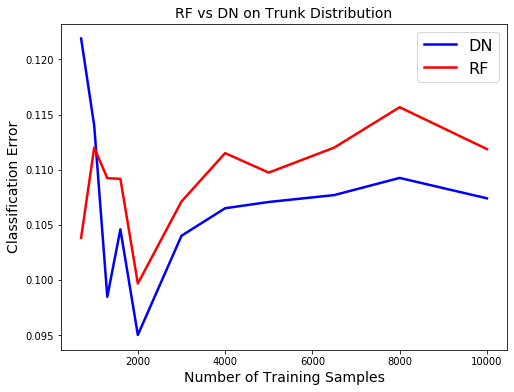

In [65]:
dnn_evolution_mean = np.mean(dnn_evolution_trunk, axis = 1)
rf_evolution_mean = np.mean(rf_evolution_trunk, axis = 1)

fig = plt.figure(figsize = (8,6))
ax = plt.subplot(111)
ax.plot(sample_sizes, dnn_evolution_mean, 'b', linewidth = 2.5)
ax.plot(sample_sizes, rf_evolution_mean, 'r', linewidth = 2.5)
plt.title('RF vs DN on Trunk Distribution', fontsize = 14)
plt.xlabel('Number of Training Samples', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.legend(['DN', 'RF'], prop={'size': 16})

fig.savefig('trunk_1_DN_8_8_1_RF_500_trs.png')

## Noisy XOR

XOR data generated from a uniform distribution from -1 to 1.

In [45]:
def xor(n):
    data = np.random.uniform(-1,1,[n,2])
    labels = np.logical_xor(data[:,0] > 0, data[:,1] > 0).astype('int')
    return data, labels

In [46]:
X_xor, y_xor = xor(10000)

In [47]:
sample_sizes = [500, 700, 1000, 1500, 2000, 3000, 4000, 5000, 6500, 8000, 10000]

rf_evolution_xor, dnn_evolution_xor = test_suite(X_xor,
                                                        y_xor,
                                                        iterations = 5,
                                                        output_nodes = 1,
                                                        sample_sizes = sample_sizes,
                                                        num_trees = 50,
                                                        batch_size = 8
                                                        )

iteration:  0
Max sample size:  500
Epoch 1/10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


31/31 [==============================] - 0s 3ms/step - loss: 0.7442 - accuracy: 0.2787 - val_loss: 0.7187 - val_accuracy: 0.3113
Epoch 2/10
31/31 [==============================] - 0s 2ms/step - loss: 0.7156 - accuracy: 0.3934 - val_loss: 0.6944 - val_accuracy: 0.5566
Epoch 3/10
31/31 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.6025 - val_loss: 0.6736 - val_accuracy: 0.6792
Epoch 4/10
31/31 [==============================] - 0s 2ms/step - loss: 0.6704 - accuracy: 0.6926 - val_loss: 0.6534 - val_accuracy: 0.7075
Epoch 5/10
31/31 [==============================] - 0s 2ms/step - loss: 0.6492 - accuracy: 0.7049 - val_loss: 0.6330 - val_accuracy: 0.7358
Epoch 6/10
31/31 [==============================] - 0s 2ms/step - loss: 0.6272 - accuracy: 0.7090 - val_loss: 0.6128 - val_accuracy: 0.7170
Epoch 7/10
31/31 [==============================] - 0s 2ms/step - loss: 0.6061 - accuracy: 0.7131 - val_loss: 0.5926 - val_accuracy: 0.6981
Epoch 8/10
31/31 [=============

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


43/43 [==============================] - 0s 3ms/step - loss: 0.6712 - accuracy: 0.6356 - val_loss: 0.6531 - val_accuracy: 0.6667
Epoch 2/10
43/43 [==============================] - 0s 1ms/step - loss: 0.6420 - accuracy: 0.7085 - val_loss: 0.6279 - val_accuracy: 0.8095
Epoch 3/10
43/43 [==============================] - 0s 1ms/step - loss: 0.6158 - accuracy: 0.7930 - val_loss: 0.6021 - val_accuracy: 0.8639
Epoch 4/10
43/43 [==============================] - 0s 1ms/step - loss: 0.5884 - accuracy: 0.8484 - val_loss: 0.5757 - val_accuracy: 0.8844
Epoch 5/10
43/43 [==============================] - 0s 1ms/step - loss: 0.5594 - accuracy: 0.8659 - val_loss: 0.5474 - val_accuracy: 0.8912
Epoch 6/10
43/43 [==============================] - 0s 1ms/step - loss: 0.5287 - accuracy: 0.8746 - val_loss: 0.5168 - val_accuracy: 0.9184
Epoch 7/10
43/43 [==============================] - 0s 1ms/step - loss: 0.4951 - accuracy: 0.8980 - val_loss: 0.4858 - val_accuracy: 0.9320
Epoch 8/10
43/43 [=============

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


62/62 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5399 - val_loss: 0.6782 - val_accuracy: 0.6635
Epoch 2/10
62/62 [==============================] - 0s 1ms/step - loss: 0.6512 - accuracy: 0.7260 - val_loss: 0.6446 - val_accuracy: 0.6445
Epoch 3/10
62/62 [==============================] - 0s 1ms/step - loss: 0.6185 - accuracy: 0.7157 - val_loss: 0.6141 - val_accuracy: 0.6635
Epoch 4/10
62/62 [==============================] - 0s 1ms/step - loss: 0.5842 - accuracy: 0.7219 - val_loss: 0.5820 - val_accuracy: 0.6777
Epoch 5/10
62/62 [==============================] - 0s 1ms/step - loss: 0.5465 - accuracy: 0.7464 - val_loss: 0.5421 - val_accuracy: 0.7346
Epoch 6/10
62/62 [==============================] - 0s 1ms/step - loss: 0.5047 - accuracy: 0.8078 - val_loss: 0.4953 - val_accuracy: 0.8436
Epoch 7/10
62/62 [==============================] - 0s 1ms/step - loss: 0.4579 - accuracy: 0.8650 - val_loss: 0.4437 - val_accuracy: 0.8957
Epoch 8/10
62/62 [=============

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


92/92 [==============================] - 0s 2ms/step - loss: 0.6987 - accuracy: 0.5156 - val_loss: 0.6800 - val_accuracy: 0.6762
Epoch 2/10
92/92 [==============================] - 0s 1ms/step - loss: 0.6662 - accuracy: 0.6857 - val_loss: 0.6491 - val_accuracy: 0.7397
Epoch 3/10
92/92 [==============================] - 0s 1ms/step - loss: 0.6331 - accuracy: 0.7578 - val_loss: 0.6138 - val_accuracy: 0.7683
Epoch 4/10
92/92 [==============================] - 0s 1ms/step - loss: 0.5931 - accuracy: 0.7660 - val_loss: 0.5739 - val_accuracy: 0.7746
Epoch 5/10
92/92 [==============================] - 0s 1ms/step - loss: 0.5501 - accuracy: 0.8041 - val_loss: 0.5317 - val_accuracy: 0.8127
Epoch 6/10
92/92 [==============================] - 0s 1ms/step - loss: 0.5059 - accuracy: 0.8163 - val_loss: 0.4887 - val_accuracy: 0.8286
Epoch 7/10
92/92 [==============================] - 0s 1ms/step - loss: 0.4613 - accuracy: 0.8531 - val_loss: 0.4447 - val_accuracy: 0.8635
Epoch 8/10
92/92 [=============

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


123/123 [==============================] - 0s 2ms/step - loss: 0.6539 - accuracy: 0.6782 - val_loss: 0.6170 - val_accuracy: 0.8242
Epoch 2/10
123/123 [==============================] - 0s 1ms/step - loss: 0.5786 - accuracy: 0.8825 - val_loss: 0.5364 - val_accuracy: 0.8789
Epoch 3/10
123/123 [==============================] - 0s 1ms/step - loss: 0.4874 - accuracy: 0.9275 - val_loss: 0.4400 - val_accuracy: 0.9264
Epoch 4/10
123/123 [==============================] - 0s 1ms/step - loss: 0.3904 - accuracy: 0.9581 - val_loss: 0.3535 - val_accuracy: 0.9739
Epoch 5/10
123/123 [==============================] - 0s 1ms/step - loss: 0.3106 - accuracy: 0.9816 - val_loss: 0.2872 - val_accuracy: 0.9739
Epoch 6/10
123/123 [==============================] - 0s 1ms/step - loss: 0.2522 - accuracy: 0.9755 - val_loss: 0.2409 - val_accuracy: 0.9929
Epoch 7/10
123/123 [==============================] - 0s 1ms/step - loss: 0.2112 - accuracy: 0.9857 - val_loss: 0.2084 - val_accuracy: 0.9952
Epoch 8/10
123/12

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


184/184 [==============================] - 0s 1ms/step - loss: 0.6315 - accuracy: 0.6748 - val_loss: 0.5886 - val_accuracy: 0.8381
Epoch 2/10
184/184 [==============================] - 0s 970us/step - loss: 0.5199 - accuracy: 0.8735 - val_loss: 0.4698 - val_accuracy: 0.8746
Epoch 3/10
184/184 [==============================] - 0s 1ms/step - loss: 0.3932 - accuracy: 0.9109 - val_loss: 0.3603 - val_accuracy: 0.9270
Epoch 4/10
184/184 [==============================] - 0s 1ms/step - loss: 0.2920 - accuracy: 0.9469 - val_loss: 0.2777 - val_accuracy: 0.9381
Epoch 5/10
184/184 [==============================] - 0s 1ms/step - loss: 0.2258 - accuracy: 0.9619 - val_loss: 0.2266 - val_accuracy: 0.9635
Epoch 6/10
184/184 [==============================] - 0s 1ms/step - loss: 0.1857 - accuracy: 0.9612 - val_loss: 0.1925 - val_accuracy: 0.9667
Epoch 7/10
184/184 [==============================] - 0s 1ms/step - loss: 0.1589 - accuracy: 0.9701 - val_loss: 0.1694 - val_accuracy: 0.9667
Epoch 8/10
184/

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


245/245 [==============================] - 0s 1ms/step - loss: 0.6520 - accuracy: 0.7147 - val_loss: 0.5868 - val_accuracy: 0.9061
Epoch 2/10
245/245 [==============================] - 0s 1ms/step - loss: 0.5056 - accuracy: 0.9091 - val_loss: 0.4253 - val_accuracy: 0.9013
Epoch 3/10
245/245 [==============================] - 0s 958us/step - loss: 0.3647 - accuracy: 0.9183 - val_loss: 0.3066 - val_accuracy: 0.9251
Epoch 4/10
245/245 [==============================] - 0s 994us/step - loss: 0.2662 - accuracy: 0.9321 - val_loss: 0.2233 - val_accuracy: 0.9382
Epoch 5/10
245/245 [==============================] - 0s 960us/step - loss: 0.1994 - accuracy: 0.9500 - val_loss: 0.1710 - val_accuracy: 0.9584
Epoch 6/10
245/245 [==============================] - 0s 979us/step - loss: 0.1622 - accuracy: 0.9571 - val_loss: 0.1438 - val_accuracy: 0.9620
Epoch 7/10
245/245 [==============================] - 0s 929us/step - loss: 0.1375 - accuracy: 0.9658 - val_loss: 0.1197 - val_accuracy: 0.9727
Epoch 8

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


307/307 [==============================] - 0s 1ms/step - loss: 0.6086 - accuracy: 0.7106 - val_loss: 0.5101 - val_accuracy: 0.8257
Epoch 2/10
307/307 [==============================] - 0s 941us/step - loss: 0.4530 - accuracy: 0.8380 - val_loss: 0.3668 - val_accuracy: 0.9076
Epoch 3/10
307/307 [==============================] - 0s 961us/step - loss: 0.3230 - accuracy: 0.9029 - val_loss: 0.2471 - val_accuracy: 0.9352
Epoch 4/10
307/307 [==============================] - 0s 973us/step - loss: 0.2239 - accuracy: 0.9441 - val_loss: 0.1751 - val_accuracy: 0.9571
Epoch 5/10
307/307 [==============================] - 0s 951us/step - loss: 0.1649 - accuracy: 0.9616 - val_loss: 0.1371 - val_accuracy: 0.9676
Epoch 6/10
307/307 [==============================] - 0s 946us/step - loss: 0.1324 - accuracy: 0.9755 - val_loss: 0.1121 - val_accuracy: 0.9781
Epoch 7/10
307/307 [==============================] - 0s 973us/step - loss: 0.1118 - accuracy: 0.9804 - val_loss: 0.1003 - val_accuracy: 0.9790
Epoch

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


399/399 [==============================] - 0s 1ms/step - loss: 0.6162 - accuracy: 0.7513 - val_loss: 0.5167 - val_accuracy: 0.8549
Epoch 2/10
399/399 [==============================] - 0s 879us/step - loss: 0.4100 - accuracy: 0.9105 - val_loss: 0.3122 - val_accuracy: 0.9487
Epoch 3/10
399/399 [==============================] - 0s 831us/step - loss: 0.2445 - accuracy: 0.9783 - val_loss: 0.1887 - val_accuracy: 0.9788
Epoch 4/10
399/399 [==============================] - 0s 892us/step - loss: 0.1641 - accuracy: 0.9830 - val_loss: 0.1386 - val_accuracy: 0.9810
Epoch 5/10
399/399 [==============================] - 0s 878us/step - loss: 0.1275 - accuracy: 0.9856 - val_loss: 0.1112 - val_accuracy: 0.9890
Epoch 6/10
399/399 [==============================] - 0s 876us/step - loss: 0.1063 - accuracy: 0.9871 - val_loss: 0.0997 - val_accuracy: 0.9810
Epoch 7/10
399/399 [==============================] - 0s 878us/step - loss: 0.0937 - accuracy: 0.9859 - val_loss: 0.0846 - val_accuracy: 0.9875
Epoch

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


490/490 [==============================] - 0s 959us/step - loss: 0.6000 - accuracy: 0.7140 - val_loss: 0.4626 - val_accuracy: 0.8816
Epoch 2/10
490/490 [==============================] - 0s 810us/step - loss: 0.3499 - accuracy: 0.9196 - val_loss: 0.2254 - val_accuracy: 0.9631
Epoch 3/10
490/490 [==============================] - 0s 831us/step - loss: 0.1926 - accuracy: 0.9615 - val_loss: 0.1384 - val_accuracy: 0.9720
Epoch 4/10
490/490 [==============================] - 0s 787us/step - loss: 0.1351 - accuracy: 0.9730 - val_loss: 0.1056 - val_accuracy: 0.9851
Epoch 5/10
490/490 [==============================] - 0s 789us/step - loss: 0.1077 - accuracy: 0.9773 - val_loss: 0.0862 - val_accuracy: 0.9881
Epoch 6/10
490/490 [==============================] - 0s 805us/step - loss: 0.0912 - accuracy: 0.9842 - val_loss: 0.0754 - val_accuracy: 0.9851
Epoch 7/10
490/490 [==============================] - 0s 792us/step - loss: 0.0798 - accuracy: 0.9849 - val_loss: 0.0676 - val_accuracy: 0.9839
Epo

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
613/613 [==============================] - 1s 907us/step - loss: 0.5187 - accuracy: 0.8371 - val_loss: 0.3256 - val_accuracy: 0.9338
Epoch 2/10
613/613 [==============================] - 0s 791us/step - loss: 0.2155 - accuracy: 0.9514 - val_loss: 0.1476 - val_accuracy: 0.9795
Epoch 3/10
613/613 [==============================] - 0s 770us/step - loss: 0.1240 - accuracy: 0.9776 - val_loss: 0.1009 - val_accuracy: 0.9843
Epoch 4/10
613/613 [==============================] - 1s 835us/step - loss: 0.0936 - accuracy: 0.9859 - val_loss: 0.0778 - val_accuracy: 0.9929
Epoch 5/10
613/613 [==============================] - 1s 856us/step - loss: 0.0765 - accuracy: 0.9894 - val_loss: 0.0664 - val_accuracy: 0.9905
Epoch 6/10
613/613 [==============================] - 1s 862us/step - loss: 0.0666 - accuracy: 0.9906 - val_loss: 0.0557 - val_accuracy: 0.9957
Epoch 7/10
613/613 [==============================] - 0s 804us/step - loss: 0.0593 - accuracy: 0.9894 - val_loss: 0.0494 - val_accuracy:

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


31/31 [==============================] - 0s 3ms/step - loss: 0.6725 - accuracy: 0.5000 - val_loss: 0.6702 - val_accuracy: 0.4623
Epoch 2/10
31/31 [==============================] - 0s 1ms/step - loss: 0.6605 - accuracy: 0.5205 - val_loss: 0.6559 - val_accuracy: 0.5943
Epoch 3/10
31/31 [==============================] - 0s 1ms/step - loss: 0.6485 - accuracy: 0.6311 - val_loss: 0.6432 - val_accuracy: 0.6981
Epoch 4/10
31/31 [==============================] - 0s 1ms/step - loss: 0.6376 - accuracy: 0.6598 - val_loss: 0.6316 - val_accuracy: 0.7075
Epoch 5/10
31/31 [==============================] - 0s 1ms/step - loss: 0.6259 - accuracy: 0.6803 - val_loss: 0.6191 - val_accuracy: 0.7170
Epoch 6/10
31/31 [==============================] - 0s 1ms/step - loss: 0.6130 - accuracy: 0.7172 - val_loss: 0.6025 - val_accuracy: 0.7830
Epoch 7/10
31/31 [==============================] - 0s 1ms/step - loss: 0.5970 - accuracy: 0.7705 - val_loss: 0.5844 - val_accuracy: 0.8113
Epoch 8/10
31/31 [=============

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


43/43 [==============================] - 0s 3ms/step - loss: 0.6753 - accuracy: 0.5248 - val_loss: 0.6571 - val_accuracy: 0.6122
Epoch 2/10
43/43 [==============================] - 0s 1ms/step - loss: 0.6525 - accuracy: 0.6443 - val_loss: 0.6320 - val_accuracy: 0.6259
Epoch 3/10
43/43 [==============================] - 0s 1ms/step - loss: 0.6288 - accuracy: 0.6793 - val_loss: 0.6095 - val_accuracy: 0.6463
Epoch 4/10
43/43 [==============================] - 0s 1ms/step - loss: 0.6070 - accuracy: 0.6793 - val_loss: 0.5869 - val_accuracy: 0.6463
Epoch 5/10
43/43 [==============================] - 0s 1ms/step - loss: 0.5860 - accuracy: 0.6939 - val_loss: 0.5662 - val_accuracy: 0.6531
Epoch 6/10
43/43 [==============================] - 0s 1ms/step - loss: 0.5655 - accuracy: 0.7085 - val_loss: 0.5455 - val_accuracy: 0.6939
Epoch 7/10
43/43 [==============================] - 0s 1ms/step - loss: 0.5450 - accuracy: 0.7609 - val_loss: 0.5244 - val_accuracy: 0.7279
Epoch 8/10
43/43 [=============

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


62/62 [==============================] - 0s 2ms/step - loss: 0.7193 - accuracy: 0.3292 - val_loss: 0.7049 - val_accuracy: 0.3175
Epoch 2/10
62/62 [==============================] - 0s 1ms/step - loss: 0.6827 - accuracy: 0.4335 - val_loss: 0.6755 - val_accuracy: 0.4787
Epoch 3/10
62/62 [==============================] - 0s 1ms/step - loss: 0.6513 - accuracy: 0.5644 - val_loss: 0.6451 - val_accuracy: 0.6161
Epoch 4/10
62/62 [==============================] - 0s 1ms/step - loss: 0.6208 - accuracy: 0.6687 - val_loss: 0.6157 - val_accuracy: 0.6872
Epoch 5/10
62/62 [==============================] - 0s 1ms/step - loss: 0.5878 - accuracy: 0.8098 - val_loss: 0.5815 - val_accuracy: 0.8436
Epoch 6/10
62/62 [==============================] - 0s 1ms/step - loss: 0.5519 - accuracy: 0.8528 - val_loss: 0.5460 - val_accuracy: 0.8673
Epoch 7/10
62/62 [==============================] - 0s 1ms/step - loss: 0.5149 - accuracy: 0.8569 - val_loss: 0.5084 - val_accuracy: 0.8910
Epoch 8/10
62/62 [=============

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


92/92 [==============================] - 0s 2ms/step - loss: 0.6530 - accuracy: 0.5728 - val_loss: 0.6421 - val_accuracy: 0.5968
Epoch 2/10
92/92 [==============================] - 0s 1ms/step - loss: 0.6085 - accuracy: 0.6653 - val_loss: 0.5959 - val_accuracy: 0.6444
Epoch 3/10
92/92 [==============================] - 0s 1ms/step - loss: 0.5598 - accuracy: 0.6871 - val_loss: 0.5536 - val_accuracy: 0.6667
Epoch 4/10
92/92 [==============================] - 0s 992us/step - loss: 0.5158 - accuracy: 0.6925 - val_loss: 0.5147 - val_accuracy: 0.6667
Epoch 5/10
92/92 [==============================] - 0s 958us/step - loss: 0.4770 - accuracy: 0.7592 - val_loss: 0.4796 - val_accuracy: 0.7873
Epoch 6/10
92/92 [==============================] - 0s 982us/step - loss: 0.4422 - accuracy: 0.8150 - val_loss: 0.4489 - val_accuracy: 0.8063
Epoch 7/10
92/92 [==============================] - 0s 985us/step - loss: 0.4125 - accuracy: 0.8354 - val_loss: 0.4224 - val_accuracy: 0.8381
Epoch 8/10
92/92 [=====

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


123/123 [==============================] - 0s 1ms/step - loss: 0.6212 - accuracy: 0.6915 - val_loss: 0.5827 - val_accuracy: 0.7720
Epoch 2/10
123/123 [==============================] - 0s 937us/step - loss: 0.5491 - accuracy: 0.8447 - val_loss: 0.5086 - val_accuracy: 0.8836
Epoch 3/10
123/123 [==============================] - 0s 951us/step - loss: 0.4664 - accuracy: 0.9030 - val_loss: 0.4206 - val_accuracy: 0.9145
Epoch 4/10
123/123 [==============================] - 0s 917us/step - loss: 0.3797 - accuracy: 0.9387 - val_loss: 0.3412 - val_accuracy: 0.9311
Epoch 5/10
123/123 [==============================] - 0s 916us/step - loss: 0.3066 - accuracy: 0.9520 - val_loss: 0.2810 - val_accuracy: 0.9501
Epoch 6/10
123/123 [==============================] - 0s 902us/step - loss: 0.2538 - accuracy: 0.9602 - val_loss: 0.2374 - val_accuracy: 0.9691
Epoch 7/10
123/123 [==============================] - 0s 881us/step - loss: 0.2157 - accuracy: 0.9653 - val_loss: 0.2057 - val_accuracy: 0.9667
Epoch

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


184/184 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5803 - val_loss: 0.6502 - val_accuracy: 0.5730
Epoch 2/10
184/184 [==============================] - 0s 873us/step - loss: 0.6082 - accuracy: 0.6061 - val_loss: 0.5753 - val_accuracy: 0.6524
Epoch 3/10
184/184 [==============================] - 0s 849us/step - loss: 0.5381 - accuracy: 0.7551 - val_loss: 0.5087 - val_accuracy: 0.8603
Epoch 4/10
184/184 [==============================] - 0s 875us/step - loss: 0.4676 - accuracy: 0.8857 - val_loss: 0.4339 - val_accuracy: 0.8873
Epoch 5/10
184/184 [==============================] - 0s 881us/step - loss: 0.3919 - accuracy: 0.9027 - val_loss: 0.3635 - val_accuracy: 0.9032
Epoch 6/10
184/184 [==============================] - 0s 886us/step - loss: 0.3334 - accuracy: 0.9204 - val_loss: 0.3168 - val_accuracy: 0.9095
Epoch 7/10
184/184 [==============================] - 0s 905us/step - loss: 0.2916 - accuracy: 0.9313 - val_loss: 0.2825 - val_accuracy: 0.9254
Epoch

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


245/245 [==============================] - 0s 1ms/step - loss: 0.6436 - accuracy: 0.6866 - val_loss: 0.5801 - val_accuracy: 0.8609
Epoch 2/10
245/245 [==============================] - 0s 877us/step - loss: 0.5076 - accuracy: 0.8550 - val_loss: 0.4321 - val_accuracy: 0.8977
Epoch 3/10
245/245 [==============================] - 0s 804us/step - loss: 0.3737 - accuracy: 0.8938 - val_loss: 0.3171 - val_accuracy: 0.9239
Epoch 4/10
245/245 [==============================] - 0s 813us/step - loss: 0.2860 - accuracy: 0.9219 - val_loss: 0.2482 - val_accuracy: 0.9417
Epoch 5/10
245/245 [==============================] - 0s 817us/step - loss: 0.2312 - accuracy: 0.9336 - val_loss: 0.2044 - val_accuracy: 0.9489
Epoch 6/10
245/245 [==============================] - 0s 828us/step - loss: 0.1935 - accuracy: 0.9479 - val_loss: 0.1733 - val_accuracy: 0.9560
Epoch 7/10
245/245 [==============================] - 0s 804us/step - loss: 0.1665 - accuracy: 0.9592 - val_loss: 0.1506 - val_accuracy: 0.9667
Epoch

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


307/307 [==============================] - 0s 1ms/step - loss: 0.5930 - accuracy: 0.7339 - val_loss: 0.5128 - val_accuracy: 0.8714
Epoch 2/10
307/307 [==============================] - 0s 874us/step - loss: 0.4018 - accuracy: 0.9241 - val_loss: 0.3163 - val_accuracy: 0.9562
Epoch 3/10
307/307 [==============================] - 0s 807us/step - loss: 0.2406 - accuracy: 0.9629 - val_loss: 0.2070 - val_accuracy: 0.9762
Epoch 4/10
307/307 [==============================] - 0s 818us/step - loss: 0.1653 - accuracy: 0.9755 - val_loss: 0.1583 - val_accuracy: 0.9800
Epoch 5/10
307/307 [==============================] - 0s 803us/step - loss: 0.1284 - accuracy: 0.9808 - val_loss: 0.1280 - val_accuracy: 0.9800
Epoch 6/10
307/307 [==============================] - 0s 816us/step - loss: 0.1069 - accuracy: 0.9873 - val_loss: 0.1101 - val_accuracy: 0.9829
Epoch 7/10
307/307 [==============================] - 0s 817us/step - loss: 0.0929 - accuracy: 0.9861 - val_loss: 0.1006 - val_accuracy: 0.9857
Epoch

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


399/399 [==============================] - 0s 970us/step - loss: 0.5938 - accuracy: 0.7046 - val_loss: 0.4665 - val_accuracy: 0.8857
Epoch 2/10
399/399 [==============================] - 0s 812us/step - loss: 0.3424 - accuracy: 0.9457 - val_loss: 0.2510 - val_accuracy: 0.9502
Epoch 3/10
399/399 [==============================] - 0s 787us/step - loss: 0.1966 - accuracy: 0.9717 - val_loss: 0.1616 - val_accuracy: 0.9839
Epoch 4/10
399/399 [==============================] - 1s 1ms/step - loss: 0.1368 - accuracy: 0.9846 - val_loss: 0.1223 - val_accuracy: 0.9912
Epoch 5/10
399/399 [==============================] - 0s 765us/step - loss: 0.1092 - accuracy: 0.9849 - val_loss: 0.1032 - val_accuracy: 0.9883
Epoch 6/10
399/399 [==============================] - 0s 763us/step - loss: 0.0922 - accuracy: 0.9896 - val_loss: 0.0895 - val_accuracy: 0.9868
Epoch 7/10
399/399 [==============================] - 0s 769us/step - loss: 0.0804 - accuracy: 0.9918 - val_loss: 0.0803 - val_accuracy: 0.9927
Epoch

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


490/490 [==============================] - 0s 934us/step - loss: 0.5541 - accuracy: 0.7247 - val_loss: 0.4568 - val_accuracy: 0.8602
Epoch 2/10
490/490 [==============================] - 0s 830us/step - loss: 0.3493 - accuracy: 0.8961 - val_loss: 0.2615 - val_accuracy: 0.9137
Epoch 3/10
490/490 [==============================] - 0s 777us/step - loss: 0.2230 - accuracy: 0.9301 - val_loss: 0.1880 - val_accuracy: 0.9494
Epoch 4/10
490/490 [==============================] - 0s 782us/step - loss: 0.1726 - accuracy: 0.9436 - val_loss: 0.1495 - val_accuracy: 0.9637
Epoch 5/10
490/490 [==============================] - 0s 778us/step - loss: 0.1419 - accuracy: 0.9559 - val_loss: 0.1261 - val_accuracy: 0.9673
Epoch 6/10
490/490 [==============================] - 0s 774us/step - loss: 0.1211 - accuracy: 0.9625 - val_loss: 0.1112 - val_accuracy: 0.9667
Epoch 7/10
490/490 [==============================] - 0s 786us/step - loss: 0.1064 - accuracy: 0.9681 - val_loss: 0.0946 - val_accuracy: 0.9738
Epo

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
613/613 [==============================] - 1s 923us/step - loss: 0.5368 - accuracy: 0.8173 - val_loss: 0.3721 - val_accuracy: 0.9190
Epoch 2/10
613/613 [==============================] - 0s 766us/step - loss: 0.2666 - accuracy: 0.9353 - val_loss: 0.1910 - val_accuracy: 0.9476
Epoch 3/10
613/613 [==============================] - 0s 756us/step - loss: 0.1597 - accuracy: 0.9596 - val_loss: 0.1306 - val_accuracy: 0.9638
Epoch 4/10
613/613 [==============================] - 0s 789us/step - loss: 0.1171 - accuracy: 0.9704 - val_loss: 0.1016 - val_accuracy: 0.9776
Epoch 5/10
613/613 [==============================] - 0s 800us/step - loss: 0.0937 - accuracy: 0.9808 - val_loss: 0.0837 - val_accuracy: 0.9790
Epoch 6/10
613/613 [==============================] - 0s 780us/step - loss: 0.0784 - accuracy: 0.9855 - val_loss: 0.0719 - val_accuracy: 0.9852
Epoch 7/10
613/613 [==============================] - 1s 833us/step - loss: 0.0681 - accuracy: 0.9890 - val_loss: 0.0646 - val_accuracy:

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


31/31 [==============================] - 0s 3ms/step - loss: 0.7063 - accuracy: 0.6844 - val_loss: 0.6926 - val_accuracy: 0.6698
Epoch 2/10
31/31 [==============================] - 0s 1ms/step - loss: 0.6832 - accuracy: 0.7008 - val_loss: 0.6706 - val_accuracy: 0.6698
Epoch 3/10
31/31 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.7008 - val_loss: 0.6496 - val_accuracy: 0.7075
Epoch 4/10
31/31 [==============================] - 0s 1ms/step - loss: 0.6440 - accuracy: 0.7664 - val_loss: 0.6290 - val_accuracy: 0.8113
Epoch 5/10
31/31 [==============================] - 0s 1ms/step - loss: 0.6241 - accuracy: 0.8525 - val_loss: 0.6079 - val_accuracy: 0.8868
Epoch 6/10
31/31 [==============================] - 0s 1ms/step - loss: 0.6040 - accuracy: 0.8893 - val_loss: 0.5876 - val_accuracy: 0.9057
Epoch 7/10
31/31 [==============================] - 0s 1ms/step - loss: 0.5839 - accuracy: 0.9057 - val_loss: 0.5669 - val_accuracy: 0.9623
Epoch 8/10
31/31 [=============

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


43/43 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.5598 - val_loss: 0.6743 - val_accuracy: 0.7347
Epoch 2/10
43/43 [==============================] - 0s 1ms/step - loss: 0.6611 - accuracy: 0.6910 - val_loss: 0.6569 - val_accuracy: 0.7823
Epoch 3/10
43/43 [==============================] - 0s 1ms/step - loss: 0.6388 - accuracy: 0.7522 - val_loss: 0.6346 - val_accuracy: 0.7755
Epoch 4/10
43/43 [==============================] - 0s 1ms/step - loss: 0.6147 - accuracy: 0.7522 - val_loss: 0.6110 - val_accuracy: 0.7755
Epoch 5/10
43/43 [==============================] - 0s 1ms/step - loss: 0.5899 - accuracy: 0.8047 - val_loss: 0.5877 - val_accuracy: 0.8367
Epoch 6/10
43/43 [==============================] - 0s 1ms/step - loss: 0.5631 - accuracy: 0.8309 - val_loss: 0.5611 - val_accuracy: 0.8503
Epoch 7/10
43/43 [==============================] - 0s 1ms/step - loss: 0.5341 - accuracy: 0.8455 - val_loss: 0.5331 - val_accuracy: 0.8776
Epoch 8/10
43/43 [=============

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


62/62 [==============================] - 0s 2ms/step - loss: 0.6719 - accuracy: 0.5971 - val_loss: 0.6534 - val_accuracy: 0.6635
Epoch 2/10
62/62 [==============================] - 0s 1ms/step - loss: 0.6379 - accuracy: 0.7321 - val_loss: 0.6296 - val_accuracy: 0.6682
Epoch 3/10
62/62 [==============================] - 0s 1ms/step - loss: 0.6115 - accuracy: 0.7342 - val_loss: 0.6054 - val_accuracy: 0.6635
Epoch 4/10
62/62 [==============================] - 0s 1ms/step - loss: 0.5816 - accuracy: 0.7260 - val_loss: 0.5770 - val_accuracy: 0.6682
Epoch 5/10
62/62 [==============================] - 0s 1ms/step - loss: 0.5503 - accuracy: 0.7342 - val_loss: 0.5477 - val_accuracy: 0.6635
Epoch 6/10
62/62 [==============================] - 0s 1ms/step - loss: 0.5168 - accuracy: 0.7362 - val_loss: 0.5164 - val_accuracy: 0.7299
Epoch 7/10
62/62 [==============================] - 0s 1ms/step - loss: 0.4841 - accuracy: 0.7894 - val_loss: 0.4860 - val_accuracy: 0.7488
Epoch 8/10
62/62 [=============

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


92/92 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5959 - val_loss: 0.6645 - val_accuracy: 0.6794
Epoch 2/10
92/92 [==============================] - 0s 1ms/step - loss: 0.6559 - accuracy: 0.6735 - val_loss: 0.6307 - val_accuracy: 0.7048
Epoch 3/10
92/92 [==============================] - 0s 1ms/step - loss: 0.6228 - accuracy: 0.6966 - val_loss: 0.5932 - val_accuracy: 0.7429
Epoch 4/10
92/92 [==============================] - 0s 1ms/step - loss: 0.5862 - accuracy: 0.7755 - val_loss: 0.5524 - val_accuracy: 0.8349
Epoch 5/10
92/92 [==============================] - 0s 1ms/step - loss: 0.5481 - accuracy: 0.8259 - val_loss: 0.5104 - val_accuracy: 0.8381
Epoch 6/10
92/92 [==============================] - 0s 1ms/step - loss: 0.5083 - accuracy: 0.8231 - val_loss: 0.4702 - val_accuracy: 0.8476
Epoch 7/10
92/92 [==============================] - 0s 1ms/step - loss: 0.4700 - accuracy: 0.8571 - val_loss: 0.4301 - val_accuracy: 0.8540
Epoch 8/10
92/92 [=============

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


123/123 [==============================] - 0s 1ms/step - loss: 0.6855 - accuracy: 0.4065 - val_loss: 0.6529 - val_accuracy: 0.6081
Epoch 2/10
123/123 [==============================] - 0s 942us/step - loss: 0.6367 - accuracy: 0.6313 - val_loss: 0.6072 - val_accuracy: 0.7102
Epoch 3/10
123/123 [==============================] - 0s 922us/step - loss: 0.5902 - accuracy: 0.7242 - val_loss: 0.5606 - val_accuracy: 0.7862
Epoch 4/10
123/123 [==============================] - 0s 926us/step - loss: 0.5366 - accuracy: 0.7967 - val_loss: 0.5059 - val_accuracy: 0.8052
Epoch 5/10
123/123 [==============================] - 0s 922us/step - loss: 0.4786 - accuracy: 0.8284 - val_loss: 0.4510 - val_accuracy: 0.8504
Epoch 6/10
123/123 [==============================] - 0s 951us/step - loss: 0.4223 - accuracy: 0.8539 - val_loss: 0.3945 - val_accuracy: 0.8765
Epoch 7/10
123/123 [==============================] - 0s 990us/step - loss: 0.3609 - accuracy: 0.8774 - val_loss: 0.3285 - val_accuracy: 0.9026
Epoch

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


184/184 [==============================] - 0s 1ms/step - loss: 0.6409 - accuracy: 0.7361 - val_loss: 0.5863 - val_accuracy: 0.8921
Epoch 2/10
184/184 [==============================] - 0s 883us/step - loss: 0.5071 - accuracy: 0.9231 - val_loss: 0.4257 - val_accuracy: 0.9571
Epoch 3/10
184/184 [==============================] - 0s 864us/step - loss: 0.3503 - accuracy: 0.9687 - val_loss: 0.2986 - val_accuracy: 0.9667
Epoch 4/10
184/184 [==============================] - 0s 863us/step - loss: 0.2487 - accuracy: 0.9776 - val_loss: 0.2246 - val_accuracy: 0.9746
Epoch 5/10
184/184 [==============================] - 0s 881us/step - loss: 0.1921 - accuracy: 0.9857 - val_loss: 0.1839 - val_accuracy: 0.9778
Epoch 6/10
184/184 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9850 - val_loss: 0.1562 - val_accuracy: 0.9778
Epoch 7/10
184/184 [==============================] - 0s 908us/step - loss: 0.1364 - accuracy: 0.9837 - val_loss: 0.1363 - val_accuracy: 0.9889
Epoch 8

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


245/245 [==============================] - 0s 1ms/step - loss: 0.6524 - accuracy: 0.6794 - val_loss: 0.6041 - val_accuracy: 0.7788
Epoch 2/10
245/245 [==============================] - 0s 837us/step - loss: 0.5460 - accuracy: 0.7922 - val_loss: 0.4865 - val_accuracy: 0.8205
Epoch 3/10
245/245 [==============================] - 0s 882us/step - loss: 0.4414 - accuracy: 0.8448 - val_loss: 0.3983 - val_accuracy: 0.8442
Epoch 4/10
245/245 [==============================] - 0s 843us/step - loss: 0.3612 - accuracy: 0.8872 - val_loss: 0.3366 - val_accuracy: 0.8811
Epoch 5/10
245/245 [==============================] - 0s 832us/step - loss: 0.3073 - accuracy: 0.9148 - val_loss: 0.2884 - val_accuracy: 0.9275
Epoch 6/10
245/245 [==============================] - 0s 842us/step - loss: 0.2683 - accuracy: 0.9372 - val_loss: 0.2543 - val_accuracy: 0.9465
Epoch 7/10
245/245 [==============================] - 0s 836us/step - loss: 0.2387 - accuracy: 0.9484 - val_loss: 0.2281 - val_accuracy: 0.9536
Epoch

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


307/307 [==============================] - 0s 1ms/step - loss: 0.6243 - accuracy: 0.6478 - val_loss: 0.5603 - val_accuracy: 0.8314
Epoch 2/10
307/307 [==============================] - 0s 842us/step - loss: 0.4796 - accuracy: 0.8816 - val_loss: 0.4079 - val_accuracy: 0.9248
Epoch 3/10
307/307 [==============================] - 0s 818us/step - loss: 0.3316 - accuracy: 0.9416 - val_loss: 0.2677 - val_accuracy: 0.9514
Epoch 4/10
307/307 [==============================] - 0s 826us/step - loss: 0.2235 - accuracy: 0.9686 - val_loss: 0.1872 - val_accuracy: 0.9695
Epoch 5/10
307/307 [==============================] - 0s 798us/step - loss: 0.1673 - accuracy: 0.9743 - val_loss: 0.1476 - val_accuracy: 0.9771
Epoch 6/10
307/307 [==============================] - 0s 801us/step - loss: 0.1372 - accuracy: 0.9788 - val_loss: 0.1228 - val_accuracy: 0.9790
Epoch 7/10
307/307 [==============================] - 0s 821us/step - loss: 0.1178 - accuracy: 0.9841 - val_loss: 0.1073 - val_accuracy: 0.9781
Epoch

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


399/399 [==============================] - 0s 973us/step - loss: 0.6554 - accuracy: 0.6490 - val_loss: 0.5619 - val_accuracy: 0.8623
Epoch 2/10
399/399 [==============================] - 0s 859us/step - loss: 0.4634 - accuracy: 0.8873 - val_loss: 0.3721 - val_accuracy: 0.9209
Epoch 3/10
399/399 [==============================] - 0s 869us/step - loss: 0.3252 - accuracy: 0.9375 - val_loss: 0.2774 - val_accuracy: 0.9546
Epoch 4/10
399/399 [==============================] - 0s 855us/step - loss: 0.2554 - accuracy: 0.9636 - val_loss: 0.2259 - val_accuracy: 0.9568
Epoch 5/10
399/399 [==============================] - 0s 875us/step - loss: 0.2133 - accuracy: 0.9733 - val_loss: 0.1906 - val_accuracy: 0.9766
Epoch 6/10
399/399 [==============================] - 0s 869us/step - loss: 0.1829 - accuracy: 0.9783 - val_loss: 0.1639 - val_accuracy: 0.9788
Epoch 7/10
399/399 [==============================] - 0s 870us/step - loss: 0.1595 - accuracy: 0.9821 - val_loss: 0.1434 - val_accuracy: 0.9868
Epo

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


490/490 [==============================] - 0s 979us/step - loss: 0.5617 - accuracy: 0.9025 - val_loss: 0.3799 - val_accuracy: 0.9441
Epoch 2/10
490/490 [==============================] - 0s 795us/step - loss: 0.2539 - accuracy: 0.9701 - val_loss: 0.1619 - val_accuracy: 0.9750
Epoch 3/10
490/490 [==============================] - 0s 837us/step - loss: 0.1415 - accuracy: 0.9824 - val_loss: 0.1083 - val_accuracy: 0.9887
Epoch 4/10
490/490 [==============================] - 0s 780us/step - loss: 0.1059 - accuracy: 0.9860 - val_loss: 0.0868 - val_accuracy: 0.9875
Epoch 5/10
490/490 [==============================] - 0s 773us/step - loss: 0.0874 - accuracy: 0.9890 - val_loss: 0.0713 - val_accuracy: 0.9952
Epoch 6/10
490/490 [==============================] - 0s 769us/step - loss: 0.0753 - accuracy: 0.9903 - val_loss: 0.0635 - val_accuracy: 0.9911
Epoch 7/10
490/490 [==============================] - 0s 794us/step - loss: 0.0668 - accuracy: 0.9929 - val_loss: 0.0556 - val_accuracy: 0.9917
Epo

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
613/613 [==============================] - 1s 903us/step - loss: 0.4734 - accuracy: 0.8820 - val_loss: 0.2727 - val_accuracy: 0.9576
Epoch 2/10
613/613 [==============================] - 0s 778us/step - loss: 0.1924 - accuracy: 0.9839 - val_loss: 0.1354 - val_accuracy: 0.9900
Epoch 3/10
613/613 [==============================] - 0s 772us/step - loss: 0.1165 - accuracy: 0.9865 - val_loss: 0.0973 - val_accuracy: 0.9814
Epoch 4/10
613/613 [==============================] - 0s 772us/step - loss: 0.0871 - accuracy: 0.9894 - val_loss: 0.0764 - val_accuracy: 0.9886
Epoch 5/10
613/613 [==============================] - 0s 789us/step - loss: 0.0717 - accuracy: 0.9908 - val_loss: 0.0648 - val_accuracy: 0.9919
Epoch 6/10
613/613 [==============================] - 0s 769us/step - loss: 0.0615 - accuracy: 0.9890 - val_loss: 0.0556 - val_accuracy: 0.9895
Epoch 7/10
613/613 [==============================] - 0s 769us/step - loss: 0.0546 - accuracy: 0.9918 - val_loss: 0.0491 - val_accuracy:

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


31/31 [==============================] - 0s 3ms/step - loss: 0.6633 - accuracy: 0.6803 - val_loss: 0.6582 - val_accuracy: 0.8019
Epoch 2/10
31/31 [==============================] - 0s 1ms/step - loss: 0.6373 - accuracy: 0.8975 - val_loss: 0.6307 - val_accuracy: 0.9340
Epoch 3/10
31/31 [==============================] - 0s 1ms/step - loss: 0.6156 - accuracy: 0.9098 - val_loss: 0.6099 - val_accuracy: 0.9340
Epoch 4/10
31/31 [==============================] - 0s 1ms/step - loss: 0.5970 - accuracy: 0.9016 - val_loss: 0.5931 - val_accuracy: 0.9434
Epoch 5/10
31/31 [==============================] - 0s 1ms/step - loss: 0.5792 - accuracy: 0.9016 - val_loss: 0.5738 - val_accuracy: 0.9434
Epoch 6/10
31/31 [==============================] - 0s 1ms/step - loss: 0.5612 - accuracy: 0.9057 - val_loss: 0.5565 - val_accuracy: 0.9434
Epoch 7/10
31/31 [==============================] - 0s 1ms/step - loss: 0.5430 - accuracy: 0.9098 - val_loss: 0.5371 - val_accuracy: 0.9434
Epoch 8/10
31/31 [=============

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


43/43 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.4315 - val_loss: 0.6813 - val_accuracy: 0.7211
Epoch 2/10
43/43 [==============================] - 0s 1ms/step - loss: 0.6740 - accuracy: 0.7726 - val_loss: 0.6646 - val_accuracy: 0.8435
Epoch 3/10
43/43 [==============================] - 0s 1ms/step - loss: 0.6544 - accuracy: 0.8863 - val_loss: 0.6449 - val_accuracy: 0.8776
Epoch 4/10
43/43 [==============================] - 0s 1ms/step - loss: 0.6340 - accuracy: 0.8892 - val_loss: 0.6252 - val_accuracy: 0.8707
Epoch 5/10
43/43 [==============================] - 0s 1ms/step - loss: 0.6115 - accuracy: 0.9038 - val_loss: 0.6019 - val_accuracy: 0.8776
Epoch 6/10
43/43 [==============================] - 0s 1ms/step - loss: 0.5854 - accuracy: 0.9096 - val_loss: 0.5735 - val_accuracy: 0.8912
Epoch 7/10
43/43 [==============================] - 0s 1ms/step - loss: 0.5520 - accuracy: 0.9359 - val_loss: 0.5387 - val_accuracy: 0.9252
Epoch 8/10
43/43 [=============

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


62/62 [==============================] - 0s 6ms/step - loss: 0.6807 - accuracy: 0.6094 - val_loss: 0.6736 - val_accuracy: 0.6730
Epoch 2/10
62/62 [==============================] - 0s 1ms/step - loss: 0.6585 - accuracy: 0.7260 - val_loss: 0.6558 - val_accuracy: 0.7156
Epoch 3/10
62/62 [==============================] - 0s 1ms/step - loss: 0.6359 - accuracy: 0.6953 - val_loss: 0.6350 - val_accuracy: 0.7299
Epoch 4/10
62/62 [==============================] - 0s 1ms/step - loss: 0.6083 - accuracy: 0.7321 - val_loss: 0.6077 - val_accuracy: 0.7299
Epoch 5/10
62/62 [==============================] - 0s 1ms/step - loss: 0.5760 - accuracy: 0.7730 - val_loss: 0.5749 - val_accuracy: 0.7630
Epoch 6/10
62/62 [==============================] - 0s 1ms/step - loss: 0.5381 - accuracy: 0.8078 - val_loss: 0.5397 - val_accuracy: 0.8009
Epoch 7/10
62/62 [==============================] - 0s 1ms/step - loss: 0.4989 - accuracy: 0.8384 - val_loss: 0.5030 - val_accuracy: 0.8104
Epoch 8/10
62/62 [=============

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


92/92 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.4707 - val_loss: 0.6775 - val_accuracy: 0.6095
Epoch 2/10
92/92 [==============================] - 0s 1ms/step - loss: 0.6609 - accuracy: 0.6612 - val_loss: 0.6440 - val_accuracy: 0.6698
Epoch 3/10
92/92 [==============================] - 0s 1ms/step - loss: 0.6250 - accuracy: 0.6748 - val_loss: 0.6087 - val_accuracy: 0.6667
Epoch 4/10
92/92 [==============================] - 0s 1ms/step - loss: 0.5863 - accuracy: 0.6844 - val_loss: 0.5668 - val_accuracy: 0.7016
Epoch 5/10
92/92 [==============================] - 0s 992us/step - loss: 0.5428 - accuracy: 0.7388 - val_loss: 0.5203 - val_accuracy: 0.7714
Epoch 6/10
92/92 [==============================] - 0s 1ms/step - loss: 0.4963 - accuracy: 0.8000 - val_loss: 0.4693 - val_accuracy: 0.8063
Epoch 7/10
92/92 [==============================] - 0s 983us/step - loss: 0.4510 - accuracy: 0.8354 - val_loss: 0.4233 - val_accuracy: 0.8794
Epoch 8/10
92/92 [=========

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


123/123 [==============================] - 0s 1ms/step - loss: 0.6613 - accuracy: 0.6834 - val_loss: 0.6185 - val_accuracy: 0.8741
Epoch 2/10
123/123 [==============================] - 0s 934us/step - loss: 0.5884 - accuracy: 0.8836 - val_loss: 0.5362 - val_accuracy: 0.9240
Epoch 3/10
123/123 [==============================] - 0s 962us/step - loss: 0.5054 - accuracy: 0.9275 - val_loss: 0.4505 - val_accuracy: 0.9406
Epoch 4/10
123/123 [==============================] - 0s 921us/step - loss: 0.4243 - accuracy: 0.9356 - val_loss: 0.3717 - val_accuracy: 0.9667
Epoch 5/10
123/123 [==============================] - 0s 913us/step - loss: 0.3519 - accuracy: 0.9622 - val_loss: 0.3053 - val_accuracy: 0.9691
Epoch 6/10
123/123 [==============================] - 0s 960us/step - loss: 0.2942 - accuracy: 0.9653 - val_loss: 0.2550 - val_accuracy: 0.9739
Epoch 7/10
123/123 [==============================] - 0s 907us/step - loss: 0.2502 - accuracy: 0.9714 - val_loss: 0.2158 - val_accuracy: 0.9739
Epoch

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


184/184 [==============================] - 0s 1ms/step - loss: 0.6630 - accuracy: 0.5667 - val_loss: 0.6122 - val_accuracy: 0.7905
Epoch 2/10
184/184 [==============================] - 0s 878us/step - loss: 0.5609 - accuracy: 0.8422 - val_loss: 0.4940 - val_accuracy: 0.9175
Epoch 3/10
184/184 [==============================] - 0s 851us/step - loss: 0.4320 - accuracy: 0.9361 - val_loss: 0.3476 - val_accuracy: 0.9667
Epoch 4/10
184/184 [==============================] - 0s 861us/step - loss: 0.3072 - accuracy: 0.9707 - val_loss: 0.2483 - val_accuracy: 0.9825
Epoch 5/10
184/184 [==============================] - 0s 857us/step - loss: 0.2299 - accuracy: 0.9782 - val_loss: 0.1923 - val_accuracy: 0.9905
Epoch 6/10
184/184 [==============================] - 0s 845us/step - loss: 0.1838 - accuracy: 0.9769 - val_loss: 0.1587 - val_accuracy: 0.9810
Epoch 7/10
184/184 [==============================] - 0s 864us/step - loss: 0.1553 - accuracy: 0.9905 - val_loss: 0.1353 - val_accuracy: 0.9873
Epoch

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


245/245 [==============================] - 0s 1ms/step - loss: 0.6315 - accuracy: 0.7024 - val_loss: 0.5640 - val_accuracy: 0.8062
Epoch 2/10
245/245 [==============================] - 0s 853us/step - loss: 0.5128 - accuracy: 0.8627 - val_loss: 0.4222 - val_accuracy: 0.9108
Epoch 3/10
245/245 [==============================] - 0s 856us/step - loss: 0.3541 - accuracy: 0.9234 - val_loss: 0.2689 - val_accuracy: 0.9548
Epoch 4/10
245/245 [==============================] - 0s 855us/step - loss: 0.2402 - accuracy: 0.9546 - val_loss: 0.1913 - val_accuracy: 0.9691
Epoch 5/10
245/245 [==============================] - 0s 887us/step - loss: 0.1842 - accuracy: 0.9668 - val_loss: 0.1480 - val_accuracy: 0.9834
Epoch 6/10
245/245 [==============================] - 0s 816us/step - loss: 0.1494 - accuracy: 0.9796 - val_loss: 0.1199 - val_accuracy: 0.9881
Epoch 7/10
245/245 [==============================] - 0s 811us/step - loss: 0.1259 - accuracy: 0.9847 - val_loss: 0.1021 - val_accuracy: 0.9881
Epoch

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


307/307 [==============================] - 0s 1ms/step - loss: 0.5968 - accuracy: 0.7645 - val_loss: 0.4918 - val_accuracy: 0.9190
Epoch 2/10
307/307 [==============================] - 0s 812us/step - loss: 0.3913 - accuracy: 0.9543 - val_loss: 0.2901 - val_accuracy: 0.9810
Epoch 3/10
307/307 [==============================] - 0s 803us/step - loss: 0.2421 - accuracy: 0.9841 - val_loss: 0.1906 - val_accuracy: 0.9905
Epoch 4/10
307/307 [==============================] - 0s 800us/step - loss: 0.1726 - accuracy: 0.9878 - val_loss: 0.1451 - val_accuracy: 0.9857
Epoch 5/10
307/307 [==============================] - 0s 800us/step - loss: 0.1369 - accuracy: 0.9869 - val_loss: 0.1177 - val_accuracy: 0.9943
Epoch 6/10
307/307 [==============================] - 0s 807us/step - loss: 0.1150 - accuracy: 0.9882 - val_loss: 0.1017 - val_accuracy: 0.9895
Epoch 7/10
307/307 [==============================] - 0s 812us/step - loss: 0.1005 - accuracy: 0.9886 - val_loss: 0.0892 - val_accuracy: 0.9943
Epoch

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


399/399 [==============================] - 0s 994us/step - loss: 0.6162 - accuracy: 0.6920 - val_loss: 0.5131 - val_accuracy: 0.7773
Epoch 2/10
399/399 [==============================] - 0s 816us/step - loss: 0.3987 - accuracy: 0.8851 - val_loss: 0.2848 - val_accuracy: 0.9429
Epoch 3/10
399/399 [==============================] - 0s 818us/step - loss: 0.2203 - accuracy: 0.9567 - val_loss: 0.1732 - val_accuracy: 0.9685
Epoch 4/10
399/399 [==============================] - 0s 807us/step - loss: 0.1518 - accuracy: 0.9733 - val_loss: 0.1289 - val_accuracy: 0.9744
Epoch 5/10
399/399 [==============================] - 0s 787us/step - loss: 0.1203 - accuracy: 0.9758 - val_loss: 0.1069 - val_accuracy: 0.9817
Epoch 6/10
399/399 [==============================] - 0s 789us/step - loss: 0.1020 - accuracy: 0.9818 - val_loss: 0.0953 - val_accuracy: 0.9788
Epoch 7/10
399/399 [==============================] - 0s 800us/step - loss: 0.0907 - accuracy: 0.9799 - val_loss: 0.0832 - val_accuracy: 0.9839
Epo

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


490/490 [==============================] - 0s 966us/step - loss: 0.6001 - accuracy: 0.7992 - val_loss: 0.4548 - val_accuracy: 0.9120
Epoch 2/10
490/490 [==============================] - 0s 822us/step - loss: 0.3038 - accuracy: 0.9546 - val_loss: 0.2114 - val_accuracy: 0.9774
Epoch 3/10
490/490 [==============================] - 0s 795us/step - loss: 0.1636 - accuracy: 0.9826 - val_loss: 0.1420 - val_accuracy: 0.9750
Epoch 4/10
490/490 [==============================] - 0s 821us/step - loss: 0.1176 - accuracy: 0.9870 - val_loss: 0.1099 - val_accuracy: 0.9881
Epoch 5/10
490/490 [==============================] - 0s 789us/step - loss: 0.0940 - accuracy: 0.9860 - val_loss: 0.0917 - val_accuracy: 0.9887
Epoch 6/10
490/490 [==============================] - 0s 787us/step - loss: 0.0796 - accuracy: 0.9878 - val_loss: 0.0793 - val_accuracy: 0.9857
Epoch 7/10
490/490 [==============================] - 0s 786us/step - loss: 0.0695 - accuracy: 0.9888 - val_loss: 0.0697 - val_accuracy: 0.9905
Epo

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
613/613 [==============================] - 1s 885us/step - loss: 0.5789 - accuracy: 0.7598 - val_loss: 0.3805 - val_accuracy: 0.9648
Epoch 2/10
613/613 [==============================] - 0s 801us/step - loss: 0.2361 - accuracy: 0.9751 - val_loss: 0.1599 - val_accuracy: 0.9752
Epoch 3/10
613/613 [==============================] - 1s 1ms/step - loss: 0.1249 - accuracy: 0.9822 - val_loss: 0.1128 - val_accuracy: 0.9719
Epoch 4/10
613/613 [==============================] - 0s 752us/step - loss: 0.0913 - accuracy: 0.9884 - val_loss: 0.0852 - val_accuracy: 0.9824
Epoch 5/10
613/613 [==============================] - 0s 740us/step - loss: 0.0737 - accuracy: 0.9882 - val_loss: 0.0712 - val_accuracy: 0.9881
Epoch 6/10
613/613 [==============================] - 0s 744us/step - loss: 0.0625 - accuracy: 0.9914 - val_loss: 0.0629 - val_accuracy: 0.9910
Epoch 7/10
613/613 [==============================] - 0s 754us/step - loss: 0.0549 - accuracy: 0.9910 - val_loss: 0.0569 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


31/31 [==============================] - 0s 3ms/step - loss: 0.6660 - accuracy: 0.7090 - val_loss: 0.6770 - val_accuracy: 0.6792
Epoch 2/10
31/31 [==============================] - 0s 1ms/step - loss: 0.6426 - accuracy: 0.7295 - val_loss: 0.6539 - val_accuracy: 0.6887
Epoch 3/10
31/31 [==============================] - 0s 1ms/step - loss: 0.6239 - accuracy: 0.7213 - val_loss: 0.6343 - val_accuracy: 0.6698
Epoch 4/10
31/31 [==============================] - 0s 1ms/step - loss: 0.6066 - accuracy: 0.7213 - val_loss: 0.6153 - val_accuracy: 0.6698
Epoch 5/10
31/31 [==============================] - 0s 1ms/step - loss: 0.5912 - accuracy: 0.7131 - val_loss: 0.5979 - val_accuracy: 0.6698
Epoch 6/10
31/31 [==============================] - 0s 2ms/step - loss: 0.5741 - accuracy: 0.7172 - val_loss: 0.5797 - val_accuracy: 0.6698
Epoch 7/10
31/31 [==============================] - 0s 1ms/step - loss: 0.5588 - accuracy: 0.7131 - val_loss: 0.5625 - val_accuracy: 0.6698
Epoch 8/10
31/31 [=============

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


43/43 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4723 - val_loss: 0.6844 - val_accuracy: 0.5850
Epoch 2/10
43/43 [==============================] - 0s 1ms/step - loss: 0.6798 - accuracy: 0.6181 - val_loss: 0.6690 - val_accuracy: 0.7007
Epoch 3/10
43/43 [==============================] - 0s 1ms/step - loss: 0.6688 - accuracy: 0.6531 - val_loss: 0.6569 - val_accuracy: 0.7075
Epoch 4/10
43/43 [==============================] - 0s 1ms/step - loss: 0.6569 - accuracy: 0.6385 - val_loss: 0.6408 - val_accuracy: 0.7007
Epoch 5/10
43/43 [==============================] - 0s 1ms/step - loss: 0.6402 - accuracy: 0.6676 - val_loss: 0.6194 - val_accuracy: 0.7279
Epoch 6/10
43/43 [==============================] - 0s 1ms/step - loss: 0.6207 - accuracy: 0.6676 - val_loss: 0.5996 - val_accuracy: 0.7211
Epoch 7/10
43/43 [==============================] - 0s 1ms/step - loss: 0.6034 - accuracy: 0.6676 - val_loss: 0.5794 - val_accuracy: 0.7211
Epoch 8/10
43/43 [=============

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


62/62 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.5072 - val_loss: 0.6686 - val_accuracy: 0.5924
Epoch 2/10
62/62 [==============================] - 0s 1ms/step - loss: 0.6585 - accuracy: 0.6830 - val_loss: 0.6474 - val_accuracy: 0.8199
Epoch 3/10
62/62 [==============================] - 0s 1ms/step - loss: 0.6349 - accuracy: 0.8200 - val_loss: 0.6201 - val_accuracy: 0.8720
Epoch 4/10
62/62 [==============================] - 0s 1ms/step - loss: 0.6040 - accuracy: 0.8650 - val_loss: 0.5847 - val_accuracy: 0.8768
Epoch 5/10
62/62 [==============================] - 0s 1ms/step - loss: 0.5659 - accuracy: 0.8671 - val_loss: 0.5428 - val_accuracy: 0.8863
Epoch 6/10
62/62 [==============================] - 0s 1ms/step - loss: 0.5218 - accuracy: 0.8834 - val_loss: 0.4948 - val_accuracy: 0.9052
Epoch 7/10
62/62 [==============================] - 0s 1ms/step - loss: 0.4756 - accuracy: 0.9202 - val_loss: 0.4471 - val_accuracy: 0.9384
Epoch 8/10
62/62 [=============

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


92/92 [==============================] - 0s 2ms/step - loss: 0.6430 - accuracy: 0.7524 - val_loss: 0.6171 - val_accuracy: 0.8063
Epoch 2/10
92/92 [==============================] - 0s 1ms/step - loss: 0.5945 - accuracy: 0.8463 - val_loss: 0.5659 - val_accuracy: 0.8603
Epoch 3/10
92/92 [==============================] - 0s 994us/step - loss: 0.5409 - accuracy: 0.8925 - val_loss: 0.5110 - val_accuracy: 0.8921
Epoch 4/10
92/92 [==============================] - 0s 1ms/step - loss: 0.4872 - accuracy: 0.9020 - val_loss: 0.4575 - val_accuracy: 0.9048
Epoch 5/10
92/92 [==============================] - 0s 989us/step - loss: 0.4342 - accuracy: 0.9265 - val_loss: 0.4049 - val_accuracy: 0.9270
Epoch 6/10
92/92 [==============================] - 0s 971us/step - loss: 0.3831 - accuracy: 0.9469 - val_loss: 0.3556 - val_accuracy: 0.9429
Epoch 7/10
92/92 [==============================] - 0s 937us/step - loss: 0.3359 - accuracy: 0.9497 - val_loss: 0.3123 - val_accuracy: 0.9587
Epoch 8/10
92/92 [=====

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


123/123 [==============================] - 0s 1ms/step - loss: 0.6801 - accuracy: 0.5863 - val_loss: 0.6401 - val_accuracy: 0.8979
Epoch 2/10
123/123 [==============================] - 0s 935us/step - loss: 0.6120 - accuracy: 0.8917 - val_loss: 0.5693 - val_accuracy: 0.9145
Epoch 3/10
123/123 [==============================] - 0s 927us/step - loss: 0.5338 - accuracy: 0.9081 - val_loss: 0.4840 - val_accuracy: 0.9169
Epoch 4/10
123/123 [==============================] - 0s 948us/step - loss: 0.4468 - accuracy: 0.9234 - val_loss: 0.3965 - val_accuracy: 0.9264
Epoch 5/10
123/123 [==============================] - 0s 929us/step - loss: 0.3638 - accuracy: 0.9316 - val_loss: 0.3214 - val_accuracy: 0.9501
Epoch 6/10
123/123 [==============================] - 0s 912us/step - loss: 0.2972 - accuracy: 0.9438 - val_loss: 0.2657 - val_accuracy: 0.9501
Epoch 7/10
123/123 [==============================] - 0s 907us/step - loss: 0.2478 - accuracy: 0.9540 - val_loss: 0.2238 - val_accuracy: 0.9525
Epoch

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


184/184 [==============================] - 0s 1ms/step - loss: 0.6719 - accuracy: 0.5401 - val_loss: 0.6357 - val_accuracy: 0.6190
Epoch 2/10
184/184 [==============================] - 0s 879us/step - loss: 0.5800 - accuracy: 0.7415 - val_loss: 0.5320 - val_accuracy: 0.8349
Epoch 3/10
184/184 [==============================] - 0s 903us/step - loss: 0.4636 - accuracy: 0.8687 - val_loss: 0.4179 - val_accuracy: 0.8873
Epoch 4/10
184/184 [==============================] - 0s 864us/step - loss: 0.3570 - accuracy: 0.9320 - val_loss: 0.3207 - val_accuracy: 0.9317
Epoch 5/10
184/184 [==============================] - 0s 839us/step - loss: 0.2720 - accuracy: 0.9612 - val_loss: 0.2507 - val_accuracy: 0.9556
Epoch 6/10
184/184 [==============================] - 0s 852us/step - loss: 0.2123 - accuracy: 0.9810 - val_loss: 0.2030 - val_accuracy: 0.9698
Epoch 7/10
184/184 [==============================] - 0s 828us/step - loss: 0.1735 - accuracy: 0.9830 - val_loss: 0.1724 - val_accuracy: 0.9794
Epoch

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


245/245 [==============================] - 0s 1ms/step - loss: 0.6425 - accuracy: 0.6978 - val_loss: 0.5907 - val_accuracy: 0.7146
Epoch 2/10
245/245 [==============================] - 0s 848us/step - loss: 0.5120 - accuracy: 0.8229 - val_loss: 0.4140 - val_accuracy: 0.9013
Epoch 3/10
245/245 [==============================] - 0s 819us/step - loss: 0.3607 - accuracy: 0.8964 - val_loss: 0.3010 - val_accuracy: 0.9156
Epoch 4/10
245/245 [==============================] - 0s 821us/step - loss: 0.2778 - accuracy: 0.9158 - val_loss: 0.2348 - val_accuracy: 0.9263
Epoch 5/10
245/245 [==============================] - 0s 807us/step - loss: 0.2277 - accuracy: 0.9306 - val_loss: 0.1947 - val_accuracy: 0.9417
Epoch 6/10
245/245 [==============================] - 0s 810us/step - loss: 0.1935 - accuracy: 0.9357 - val_loss: 0.1627 - val_accuracy: 0.9536
Epoch 7/10
245/245 [==============================] - 0s 850us/step - loss: 0.1643 - accuracy: 0.9530 - val_loss: 0.1407 - val_accuracy: 0.9596
Epoch

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


307/307 [==============================] - 0s 1ms/step - loss: 0.6304 - accuracy: 0.7278 - val_loss: 0.5501 - val_accuracy: 0.8286
Epoch 2/10
307/307 [==============================] - 0s 833us/step - loss: 0.4780 - accuracy: 0.8490 - val_loss: 0.3941 - val_accuracy: 0.8743
Epoch 3/10
307/307 [==============================] - 0s 797us/step - loss: 0.3391 - accuracy: 0.9033 - val_loss: 0.2871 - val_accuracy: 0.9105
Epoch 4/10
307/307 [==============================] - 0s 810us/step - loss: 0.2548 - accuracy: 0.9273 - val_loss: 0.2252 - val_accuracy: 0.9314
Epoch 5/10
307/307 [==============================] - 0s 797us/step - loss: 0.2052 - accuracy: 0.9376 - val_loss: 0.1862 - val_accuracy: 0.9457
Epoch 6/10
307/307 [==============================] - 0s 810us/step - loss: 0.1711 - accuracy: 0.9494 - val_loss: 0.1599 - val_accuracy: 0.9514
Epoch 7/10
307/307 [==============================] - 0s 2ms/step - loss: 0.1476 - accuracy: 0.9551 - val_loss: 0.1410 - val_accuracy: 0.9543
Epoch 8

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
399/399 [==============================] - 0s 1ms/step - loss: 0.5855 - accuracy: 0.7824 - val_loss: 0.4672 - val_accuracy: 0.8747
Epoch 2/10
399/399 [==============================] - 0s 948us/step - loss: 0.3983 - accuracy: 0.9049 - val_loss: 0.2984 - val_accuracy: 0.9465
Epoch 3/10
399/399 [==============================] - 0s 972us/step - loss: 0.2575 - accuracy: 0.9567 - val_loss: 0.1930 - val_accuracy: 0.9795
Epoch 4/10
399/399 [==============================] - 0s 914us/step - loss: 0.1798 - accuracy: 0.9711 - val_loss: 0.1441 - val_accuracy: 0.9846
Epoch 5/10
399/399 [==============================] - 0s 914us/step - loss: 0.1414 - accuracy: 0.9736 - val_loss: 0.1173 - val_accuracy: 0.9802
Epoch 6/10
399/399 [==============================] - 0s 912us/step - loss: 0.1190 - accuracy: 0.9768 - val_loss: 0.0995 - val_accuracy: 0.9875
Epoch 7/10
399/399 [==============================] - 0s 891us/step - loss: 0.1042 - accuracy: 0.9815 - val_loss: 0.0880 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
490/490 [==============================] - 1s 1ms/step - loss: 0.5371 - accuracy: 0.8045 - val_loss: 0.3417 - val_accuracy: 0.9387
Epoch 2/10
490/490 [==============================] - 0s 962us/step - loss: 0.2307 - accuracy: 0.9701 - val_loss: 0.1639 - val_accuracy: 0.9893
Epoch 3/10
490/490 [==============================] - 0s 952us/step - loss: 0.1343 - accuracy: 0.9855 - val_loss: 0.1120 - val_accuracy: 0.9929
Epoch 4/10
490/490 [==============================] - 0s 964us/step - loss: 0.0997 - accuracy: 0.9867 - val_loss: 0.0867 - val_accuracy: 0.9887
Epoch 5/10
490/490 [==============================] - 0s 955us/step - loss: 0.0804 - accuracy: 0.9893 - val_loss: 0.0720 - val_accuracy: 0.9941
Epoch 6/10
490/490 [==============================] - 0s 953us/step - loss: 0.0688 - accuracy: 0.9916 - val_loss: 0.0628 - val_accuracy: 0.9917
Epoch 7/10
490/490 [==============================] - 0s 928us/step - loss: 0.0611 - accuracy: 0.9900 - val_loss: 0.0568 - val_accuracy: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
613/613 [==============================] - 1s 999us/step - loss: 0.4986 - accuracy: 0.8431 - val_loss: 0.3115 - val_accuracy: 0.9438
Epoch 2/10
613/613 [==============================] - 1s 869us/step - loss: 0.2128 - accuracy: 0.9714 - val_loss: 0.1501 - val_accuracy: 0.9805
Epoch 3/10
613/613 [==============================] - 1s 827us/step - loss: 0.1251 - accuracy: 0.9853 - val_loss: 0.1052 - val_accuracy: 0.9848
Epoch 4/10
613/613 [==============================] - 1s 938us/step - loss: 0.0924 - accuracy: 0.9884 - val_loss: 0.0847 - val_accuracy: 0.9905
Epoch 5/10
613/613 [==============================] - 1s 826us/step - loss: 0.0746 - accuracy: 0.9892 - val_loss: 0.0717 - val_accuracy: 0.9886
Epoch 6/10
613/613 [==============================] - 1s 852us/step - loss: 0.0639 - accuracy: 0.9900 - val_loss: 0.0628 - val_accuracy: 0.9910
Epoch 7/10
613/613 [==============================] - 1s 829us/step - loss: 0.0557 - accuracy: 0.9912 - val_loss: 0.0568 - val_accuracy:

In [39]:
%store dnn_evolution_xor
%store rf_evolution_xor

# %store -r dnn_evolution_xor
# %store -r rf_evolution_xor

Stored 'dnn_evolution_xor' (ndarray)
Stored 'rf_evolution_xor' (ndarray)


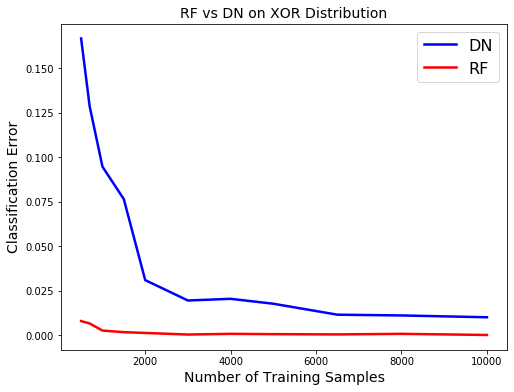

In [48]:
dnn_evolution_mean = np.mean(dnn_evolution_xor, axis = 1)
rf_evolution_mean = np.mean(rf_evolution_xor, axis = 1)

fig = plt.figure(figsize = (8,6))
ax = plt.subplot(111)
ax.plot(sample_sizes, dnn_evolution_mean, 'b', linewidth = 2.5)
ax.plot(sample_sizes, rf_evolution_mean, 'r', linewidth = 2.5)
plt.title('RF vs DN on XOR Distribution', fontsize = 14)
plt.xlabel('Number of Training Samples', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.legend(['DN', 'RF'], prop={'size': 16})

fig.savefig('xor_1_DN_8_8_1_RF_50_trs.png')